# INTRODUCTION

Objective: 

. The objective of this project is to develop a predictive model that can accurately assess credit card applications based on     customer information. 
. This model aims to automate and enhance the credit approval process by providing a data-driven decision-making tool for the     bank's credit card department.
. The primary objective is to leverage data science and machine learning to create an efficient, accurate, and scalable credit   card approval system that contributes to risk management and business growth in the banking sector.

In [1]:
import numpy as np  # NumPy, a library for numerical computing in Python
import pandas as pd  # Pandas, a library for data manipulation and analysis
import missingno as msno  # Missingno, a library for visualizing missing data
import matplotlib  # Matplotlib, a data visualization library
import matplotlib.pyplot as plt  # Matplotlib's pyplot module for plotting
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter
import seaborn as sns  # Seaborn, a data visualization library built on Matplotlib
import warnings  # Python's warnings module for managing warnings
from pandas.core.common import SettingWithCopyWarning  # A specific Pandas warning
from ydata_profiling import ProfileReport  # A library for generating data profile reports
from pathlib import Path  # Pathlib, for working with file paths
from scipy.stats import probplot, chi2_contingency, chi2  # SciPy's statistics functions
from sklearn.model_selection import (  # Scikit-learn's model selection tools
    train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
)
from sklearn.base import BaseEstimator, TransformerMixin  # Scikit-learn's base classes
from sklearn.pipeline import Pipeline  # Scikit-learn's pipeline for data processing
from sklearn.calibration import CalibratedClassifierCV  # Calibrated classifier for probability calibration
from sklearn.compose import ColumnTransformer  # Scikit-learn's ColumnTransformer for feature transformations
from sklearn.preprocessing import (  # Scikit-learn's preprocessing techniques
    OneHotEncoder, MinMaxScaler, OrdinalEncoder
)
from sklearn.metrics import (  # Scikit-learn's metrics for model evaluation
    ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE  # Imbalanced-learn's SMOTE for oversampling
from sklearn.linear_model import (  # Scikit-learn's linear models
    SGDClassifier, LogisticRegression
)
from sklearn.svm import SVC  # Scikit-learn's Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Scikit-learn's Decision Tree classifier
from sklearn.ensemble import (  # Scikit-learn's ensemble classifiers
    RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB  # Scikit-learn's Gaussian Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier  # Scikit-learn's k-Nearest Neighbors classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Scikit-learn's Linear Discriminant Analysis classifier
from sklearn.neural_network import MLPClassifier  # Scikit-learn's Multi-layer Perceptron classifier
from sklearn.inspection import permutation_importance  # Scikit-learn's permutation importance
import scikitplot as skplt  # Scikit-plot, a library for scikit-learn visualizations
from yellowbrick.model_selection import FeatureImportances  # Yellowbrick, a library for model selection visualizations
import scipy.stats as stats  # SciPy's statistics functions
import joblib  # Joblib, a library for object serialization
import os  # Python's os module for working with the operating system
%matplotlib inline 


In [2]:
dataset_1 = pd.read_csv("C:/Users/Hello/Downloads/Capstone_project_1_data/Credit_card.csv")
df_1=dataset_1.copy()

In [3]:
dataset_2 = pd.read_csv("C:/Users/Hello/Downloads/Capstone_project_1_data/Credit_card_label.csv")
df_2 =dataset_2.copy()
df_2

Ind_ID  label
0     5008827      1
1     5009744      1
2     5009746      1
3     5009749      1
4     5009752      1
...       ...    ...
1543  5028645      0
1544  5023655      0
1545  5115992      0
1546  5118219      0
1547  5053790      0

[1548 rows x 2 columns]

In [4]:
df = pd.merge(df_1, df_2, on='Ind_ID', how='inner')


In [5]:
#  split the data into train and test
# def data_split(df, test_size):
#     train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
#     return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [6]:
# cc_train_original, cc_test_original = data_split(df_merge, 0.2)

In [7]:
# cc_train_original.shape

In [8]:
# cc_test_original.shape

In [9]:
# df=cc_train_original.copy()
# cc_test_copy=cc_test_original.copy()

In [10]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [11]:
df.shape

(1548, 19)

In [12]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [13]:
df.tail()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

In [14]:
#df.drop(['Ind_ID','Mobile_phone'])

In [15]:
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [16]:
df.drop_duplicates()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [17]:
df.describe(include='all')

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1541      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    973       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.525000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.132530e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.665000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members        label  
count      1548.000000  1548.000000  
unique             NaN          NaN  
top                NaN          NaN  
freq               NaN          NaN  
mean          2.161499     0.113049  
std           0.947772     0.316755  
min           1.000000     0.000000  
25%           2.000000     0.000000  
50%           2.000000     0.000000  
75%           3.000000     0.000000  
max          15.000000     1.000000

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [19]:
df_missing=df.isnull()
df_missing.sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [20]:
df_missing.mean()*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

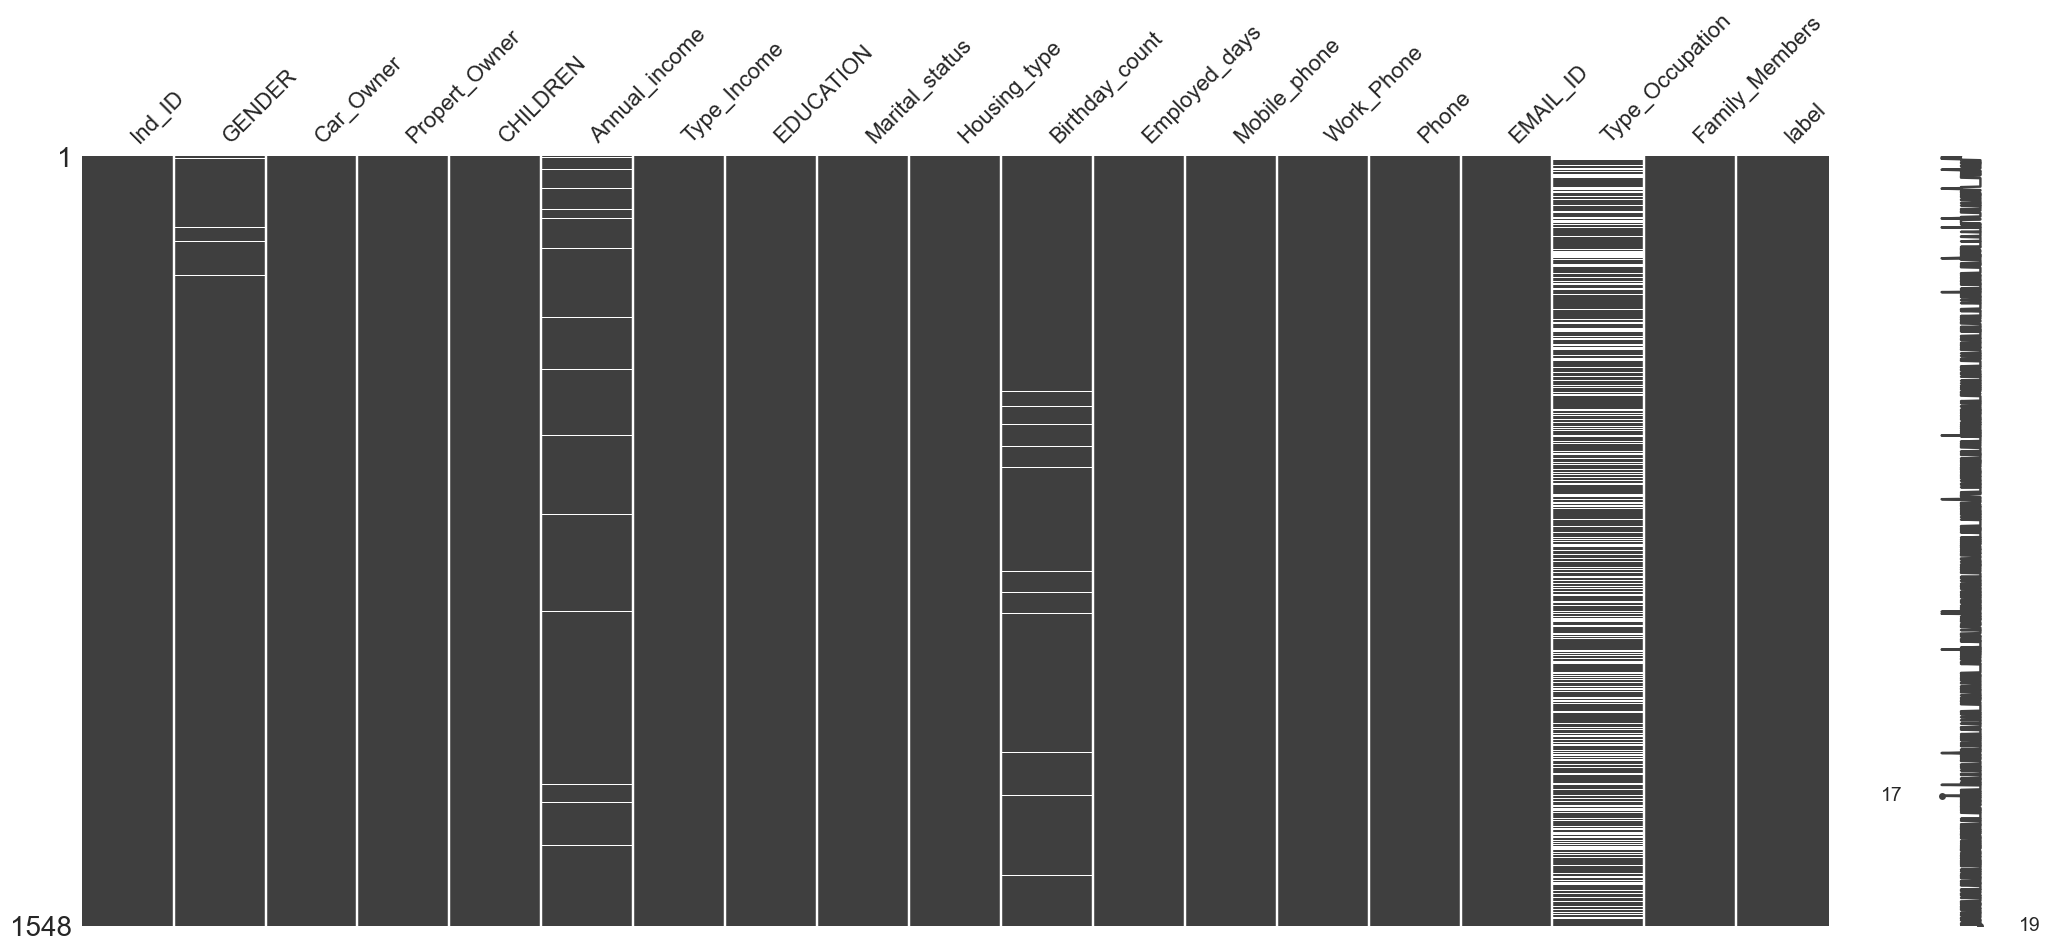

In [21]:
msno.matrix(df)
plt.show()

In [22]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [23]:
df['Annual_income'].shape

(1548,)

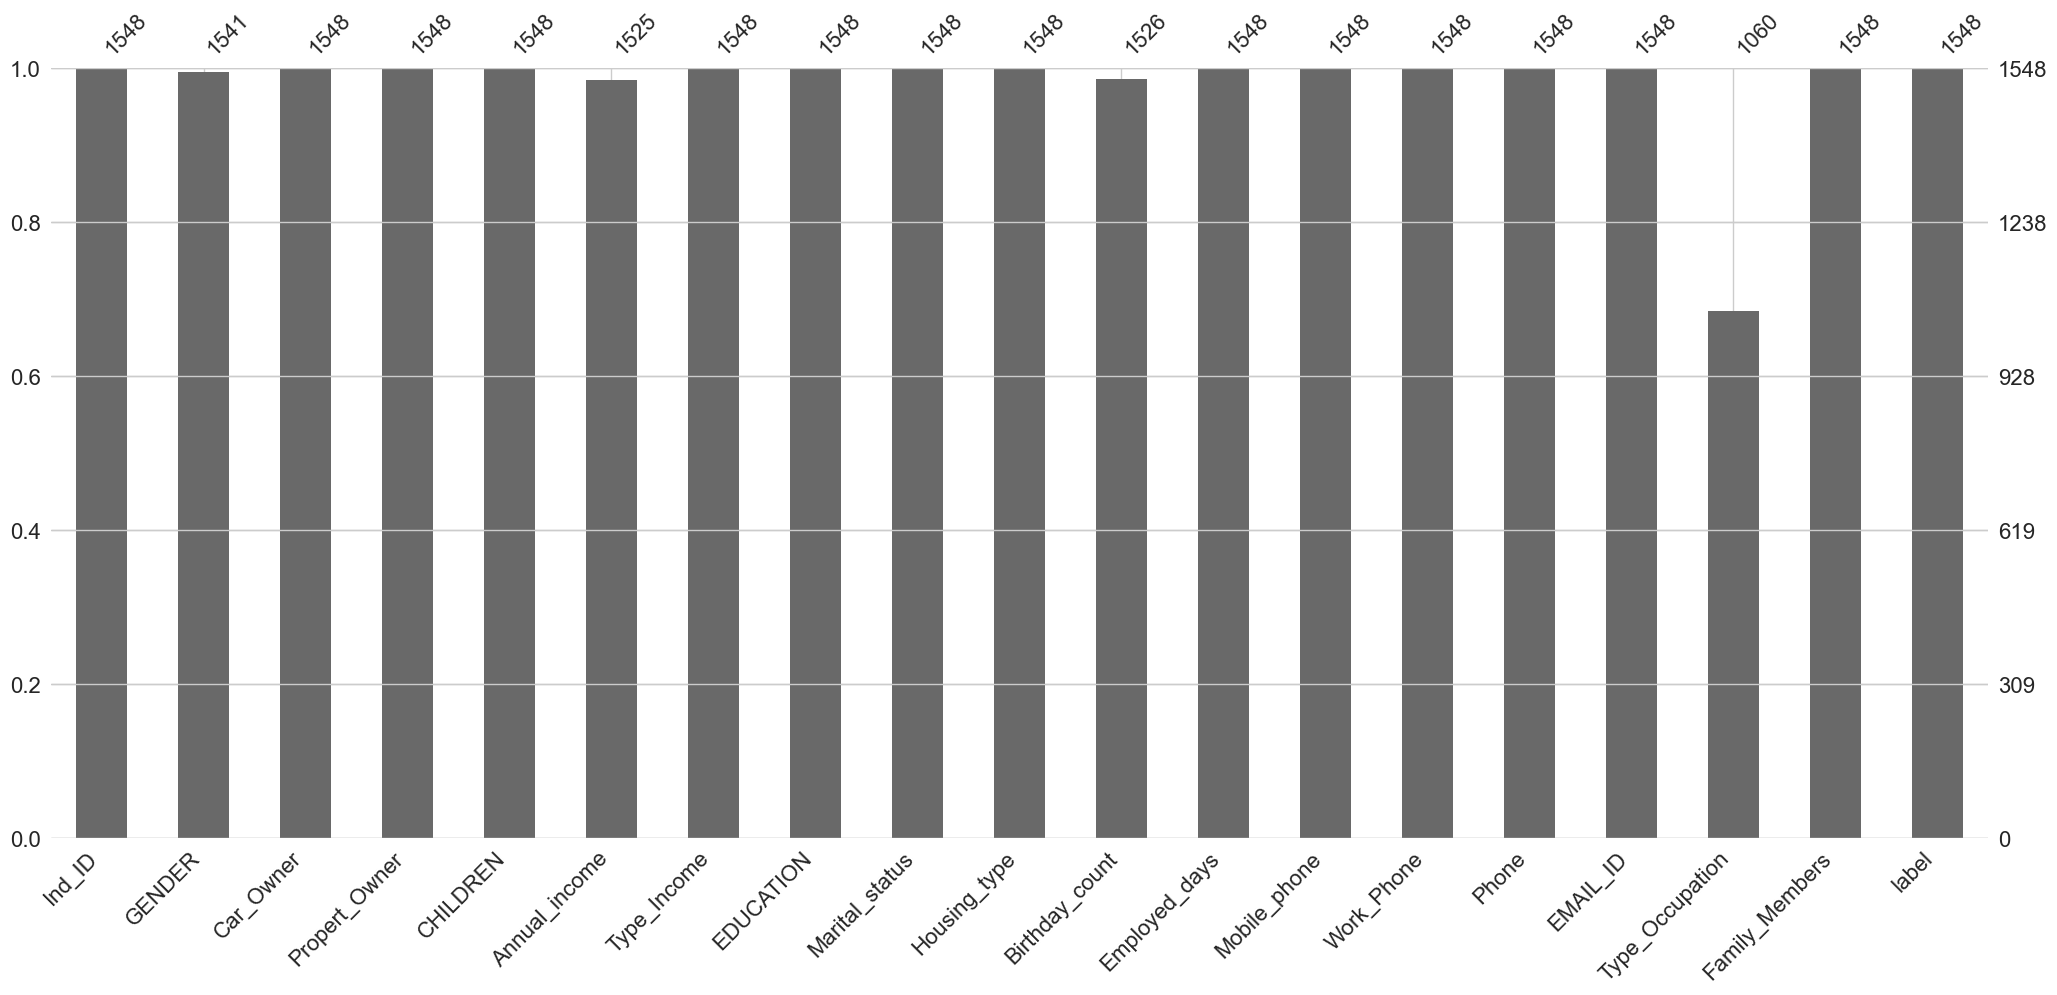

In [24]:
msno.bar(df)
plt.show()

In [25]:
#Function that will return the value count and frequency of each observation within a feature
def valuecnt_freq(df,feature):
    value_cnt = df[feature].value_counts()
    value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    value_cnt_concat = pd.concat([value_cnt, value_cnt_norm], axis=1)
    value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return value_cnt_concat

In [26]:
valuecnt_freq(df,'CHILDREN')

Count  Frequency (%)
0    1091      70.478036
1     305      19.702842
2     134       8.656331
3      16       1.033592
4       1       0.064599
14      1       0.064599

In [27]:
valuecnt_freq(df,'EDUCATION') 

Count  Frequency (%)
Secondary / secondary special   1031      66.602067
Higher education                 426      27.519380
Incomplete higher                 68       4.392765
Lower secondary                   21       1.356589
Academic degree                    2       0.129199

In [28]:
df['Birthday_count'].mean()

-16040.342070773264

In [29]:
df['Birthday_count'].describe()

count     1526.000000
mean    -16040.342071
std       4229.503202
min     -24946.000000
25%     -19553.000000
50%     -15661.500000
75%     -12417.000000
max      -7705.000000
Name: Birthday_count, dtype: float64

In [30]:
# function to create display general information about the feature
def gen_info(df,feature):
    if feature == 'Birthday_count':
        # change the feature to be express in positive numbers days
            print('Description:\n{}'.format((np.abs(df[feature])/365.25).describe()))
            print('='*50)
            print('Object type:{}'.format(df[feature].dtype))
    elif feature =='Employed_days':
        # select only the rows where the rows are negative to ignore whose who have retired or unemployed
            employe_ret = df['Employed_days'][df['Employed_days'] < 0]
            employe_ret_yrs = np.abs(employe_ret)/365.25
            print('Description:\n{}'.format((employe_ret_yrs).describe()))
            print('='*50)
            print('Object type:{}'.format(employe_ret_yrs.dtype))
    else:
            print('Description:\n{}'.format(df[feature].describe()))
            print('='*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('='*50)
            value_cnt = valuecnt_freq(df,feature)
            print('Value count:\n{}'.format(value_cnt))


In [31]:
# function to create a pie chart plot
def pie_plot(df,feature):
    if feature == 'Housing_type' or 'EDUCATION':
        size = valuecnt_freq(df, feature)
        size_len = len(size.index)
        freq_list = []
        for i in range(size_len):
            freq_list.append(size.iloc[i]['Frequency (%)'])
        fig, ax = plt.subplots(figsize=(5,5))
        # %1.2f%% display decimals in the pie chart with 2 decimal places
        plt.pie(freq_list, startangle=90, wedgeprops={'edgecolor' :'black'},autopct='%1.1f%%',textprops={'fontsize': 8})
        plt.title('Pie chart of {}'.format(feature))
        plt.legend(loc='best',labels=size.index,fontsize=8)
        plt.axis('equal')
        return plt.show()
    else :
        size = value_cnt_norm_cal(df, feature)
        size_len = len(size.index)
        freq_list = []
        for i in range(size_len):
            freq_list.append(size.iloc[i]['Frequency (%)'])
        fig, ax = plt.subplots(figsize=(5,5))
        # %1.2f%% display decimals in the pie chart with 2 decimal places
        plt.pie(freq_list, labels=size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
        plt.title('Pie chart of {}'.format(feature))
        plt.legend(loc='best',fontsize=8)
        plt.axis('equal')
        return plt.show()


In [32]:
# function to create a bar chart plot
def bar_plot(df,feature):
        if feature == 'Marital_status' or 'Housing_type' or 'Type_Occupation' or 'Type_Income' or 'EDUCATION':
            fig, ax = plt.subplots(figsize=(4,6))
            sns.barplot(x=valuecnt_freq(df,feature).index,y=valuecnt_freq(df,feature).values[:,0])
            ax.set_xticklabels(labels=valuecnt_freq(df,feature).index,rotation=60,ha='right')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            ax.tick_params(axis='both', labelsize=8)  # Set tick label font size

           # Decrease font size of x-axis labels (features)
           # for tick in ax.get_xticklabels():
               # tick.set_fontsize(9) 
            plt.title('{} count'.format(feature))
            return plt.show()
        else :
            fig, ax = plt.subplots(figsize=(4,6))
            sns.barplot(x=valuecnt_freq(df,feature).index,y=valuecnt_freq(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            ax.tick_params(axis='both', labelsize=8)  # Set tick label font size

           # Decrease font size of x-axis labels (features)
           # for tick in ax.get_xticklabels():
               # tick.set_fontsize(9) 
            plt.title('{} count'.format(feature))
            return plt.show()

In [33]:
# function to create a box plot
def box_plot(df,feature):
        if feature == 'Birthday_count':
            fig, ax = plt.subplots(figsize=(2,8))
            # change the feature to be express in positive numbers days
            sns.boxplot(y=np.abs(df[feature])/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        if feature == 'CHILDREN':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,df[feature].max(),1))
            sns.set_style("ticks")
            return plt.show()
        if feature == 'Employed_days':
            fig, ax = plt.subplots(figsize=(2,8))
            employe_ret = df['Employed_days'][df['Employed_days'] < 0]
            # employement length in days is a negative number so we need to change it to positive and change it to days
            employe_ret_yrs = np.abs(employe_ret)/365.25
            sns.boxplot(y=employe_ret_yrs)
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,employe_ret_yrs.max(),2))
            sns.set_style("whitegrid")
            return plt.show()
        if feature == 'Annual_income':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            # suppress scientific notation
            plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
            return plt.show()
        else :
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        

In [34]:
# function to create a histogram plot
def hist_plot(df,feature, the_bins=40): 
        if feature == 'Birthday_count':
            fig, ax = plt.subplots(figsize=(18,10))
            # change the feature to be express in positive numbers days
            sns.histplot(np.abs(df[feature])/365.25,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        if feature ==  'Employed_days':
            employe_ret = df['Employed_days'][df['Employed_days'] < 0]
            # change the feature to be express in positive numbers days
            employe_ret_yrs = np.abs(employe_ret)/365.25
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(employe_ret_yrs,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        if feature ==  'Annual_income':        
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            # Format x-axis tick labels to display values without scientific notation
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
            return plt.show()
        else :
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()


In [35]:
# Define a function to create box plots comparing high-risk and low-risk applicants based on a feature
def low_high_risk_box_plot(df, feature):
    # Check which feature is being analyzed
    if feature == 'Birthday_count':
        # Calculate the mean age for each risk group ('yes' and 'no') and convert it to years
        mean_ages = np.abs(df.groupby('label')[feature].mean() / 365.25)
        
        # Print the mean ages for informational purposes
        print(mean_ages)
        
        # Create a figure and axis for the box plot with a specified size
        fig, ax = plt.subplots(figsize=(5, 8))
        
        # Create a box plot comparing the ages of high-risk and low-risk individuals
        sns.boxplot(y=np.abs(df[feature]) / 365.25, x=df['label'])
        
        # Set the x-axis tick labels as 'no' and 'yes'
        plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
        
        # Set the title for the plot
        plt.title('High risk individuals grouped by age')
        
        # Display the plot
        return plt.show()
    
    # Check if the feature is 'Annual_income'
    if feature == 'Annual_income':
        # Calculate the mean annual income for each risk group
        mean_incomes = np.abs(df.groupby('label')[feature].mean())
        
        # Print the mean incomes for informational purposes
        print(mean_incomes)
        
        # Create a figure and axis for the box plot with a specified size
        fig, ax = plt.subplots(figsize=(5, 8))
        
        # Create a box plot comparing the annual incomes of high-risk and low-risk individuals
        sns.boxplot(y=np.abs(df[feature]), x=df['label'])
        
        # Set the x-axis tick labels as 'no' and 'yes'
        plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
        
        # Format y-axis tick labels to display values without scientific notation
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
        
        # Set the title for the plot
        plt.title(f'High risk individuals grouped by {feature}')
        
        # Display the plot
        return plt.show()
    
    # Check if the feature is 'Employed_days'
    if feature == 'Employed_days':
        # Filter applicants with negative employment length (employed ones)
        employed_ret = df['Employed_days'][df['Employed_days'] < 0]
        
        # Calculate employment lengths in years for these applicants
        employe_ret_yrs = np.abs(employed_ret) / 365.25
        
        # Calculate the mean employment length (in years) for high-risk and low-risk individuals among employed ones
        employment_ret_df = df.iloc[employed_ret.index][['Employed_days', 'label']]
        employment_no_ret_is_high_risk = employment_ret_df.groupby('label')['Employed_days'].mean()
        
        # Print the mean employment lengths for informational purposes
        print(employe_ret_yrs)
        
        # Create a figure and axis for the box plot with a specified size
        fig, ax = plt.subplots(figsize=(5, 8))
        
        # Create a box plot comparing employment lengths of high-risk and low-risk individuals who are employed
        sns.boxplot(y=employe_ret_yrs, x=df['label'])
        
        # Set the x-axis tick labels as 'no' and 'yes'
        plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
        
        # Set the title for the plot
        plt.title(f'High vs low risk individuals grouped by {feature}')
        
        # Display the plot
        return plt.show()
    
    # Handle any other feature
    else:
        # Calculate the mean of the specified feature for each risk group
        mean_feature = np.abs(df.groupby('label')[feature].mean())
        
        # Print the mean feature values for informational purposes
        print(mean_feature)
        
        # Create a figure and axis for the box plot with a specified size
        fig, ax = plt.subplots(figsize=(5, 8))
        
        # Create a box plot comparing the specified feature for high-risk and low-risk individuals
        sns.boxplot(y=np.abs(df[feature]), x=df['label'])
        
        # Set the x-axis tick labels as 'no' and 'yes'
        plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
        
        # Set the title for the plot
        plt.title(f'High risk individuals grouped by {feature}')
        
        # Display the plot
        return plt.show()


In [36]:
# Define a function to create a bar plot comparing high-risk and low-risk applicants based on a categorical feature
def low_high_risk_bar_plot(df, feature):
    # Group the DataFrame by the specified feature and calculate the sum of 'label' for each group
    is_high_risk_grp = df.groupby(feature)['label'].sum()
    
    # Sort the counts in descending order to highlight categories with the highest number of high-risk applicants
    is_high_risk_grp_srt = is_high_risk_grp.sort_values(ascending=False)
    
    # Print the sorted counts as a dictionary for informational purposes
    print(dict(is_high_risk_grp_srt))
    
    # Create a figure and axis for the bar plot with a specified size
    fig, ax = plt.subplots(figsize=(6, 10))
    
    # Create a bar plot with x-axis representing categories and y-axis representing high-risk applicant counts
    sns.barplot(x=is_high_risk_grp_srt.index, y=is_high_risk_grp_srt.values)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(labels=is_high_risk_grp_srt.index, rotation=45, ha='right')
    
    # Set y-axis label
    plt.ylabel('Count')
    
    # Set the title for the plot
    plt.title(f'High risk applicants count grouped by {feature}')
    
    # Display the bar plot
    return plt.show()

## Univariate analysis

### GENDER

In [37]:
gen_info(df,'GENDER')

Description:
count     1541
unique       2
top          F
freq       973
Name: GENDER, dtype: object
Object type:
object
Value count:
   Count  Frequency (%)
F    973      63.140818
M    568      36.859182


In [38]:
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)


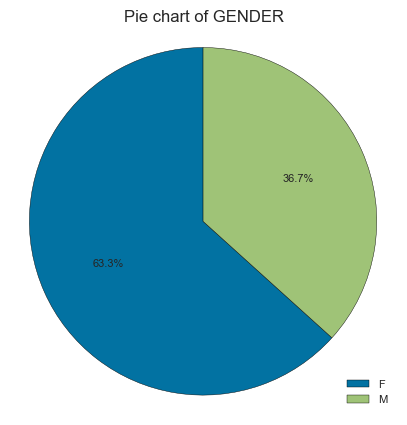

In [39]:
pie_plot(df,'GENDER')

We have more female applicants than male (63.3% vs 36.7%)

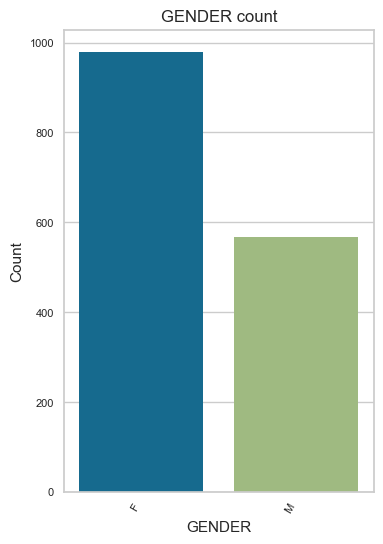

In [40]:
bar_plot(df,'GENDER')

{'F': 100, 'M': 75}


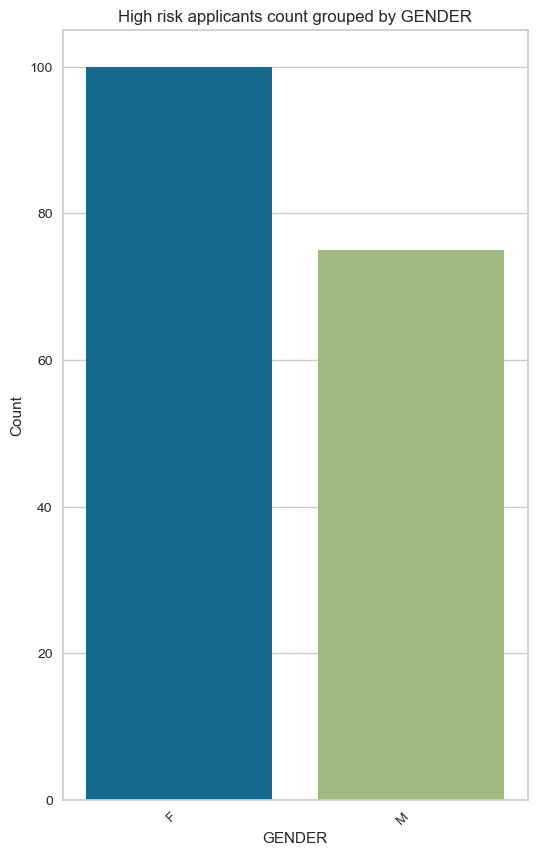

In [41]:
low_high_risk_bar_plot(df,'GENDER')

In [42]:
gen_info(df,'Car_Owner')

Description:
count     1548
unique       2
top          N
freq       924
Name: Car_Owner, dtype: object
Object type:
object
Value count:
   Count  Frequency (%)
N    924      59.689922
Y    624      40.310078


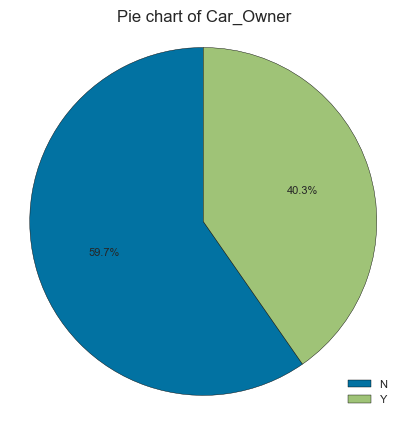

In [43]:
pie_plot(df,'Car_Owner')

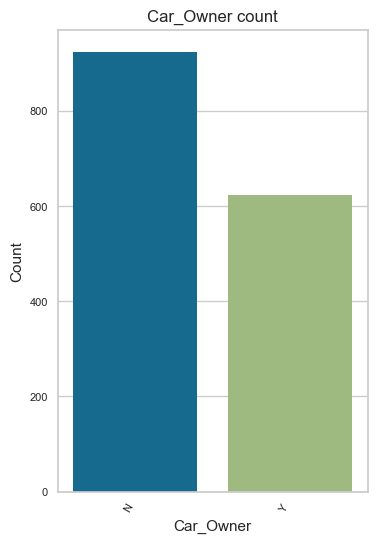

In [44]:
bar_plot(df,'Car_Owner')

{'N': 108, 'Y': 67}


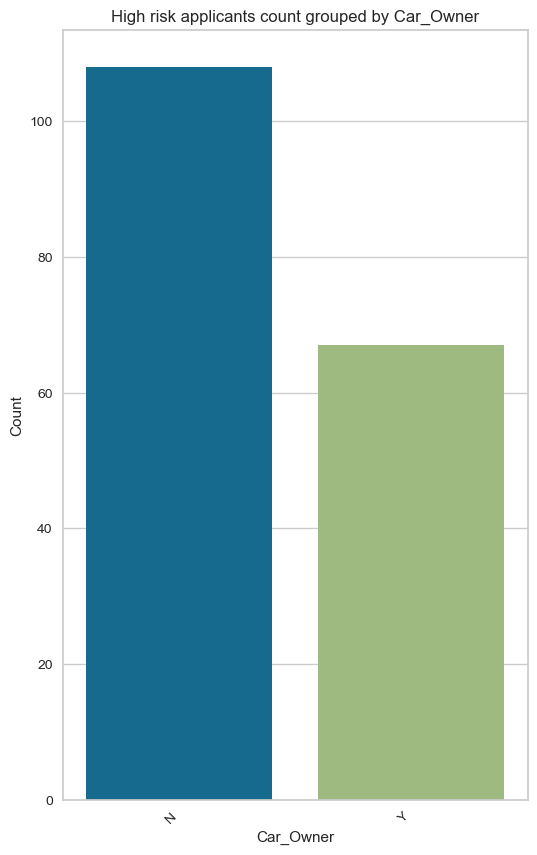

In [45]:
low_high_risk_bar_plot(df,'Car_Owner')

In [46]:
gen_info(df,'Propert_Owner')

Description:
count     1548
unique       2
top          Y
freq      1010
Name: Propert_Owner, dtype: object
Object type:
object
Value count:
   Count  Frequency (%)
Y   1010      65.245478
N    538      34.754522


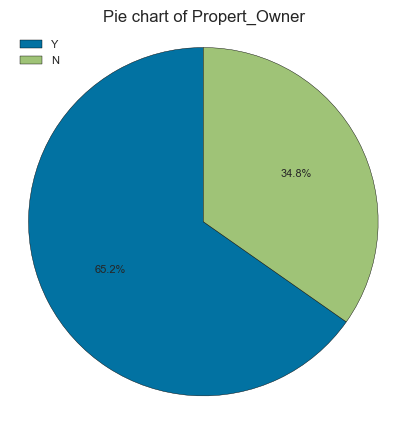

In [47]:
pie_plot(df,'Propert_Owner')

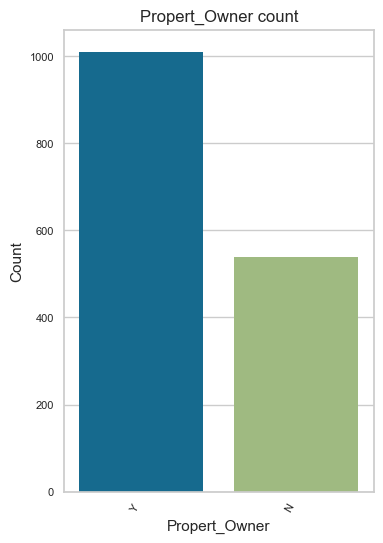

In [48]:
bar_plot(df,'Propert_Owner')

In [49]:
gen_info(df,'CHILDREN')

Description:
count    1548.000000
mean        0.412791
std         0.776691
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: CHILDREN, dtype: float64
Object type:
int64
Value count:
    Count  Frequency (%)
0    1091      70.478036
1     305      19.702842
2     134       8.656331
3      16       1.033592
4       1       0.064599
14      1       0.064599


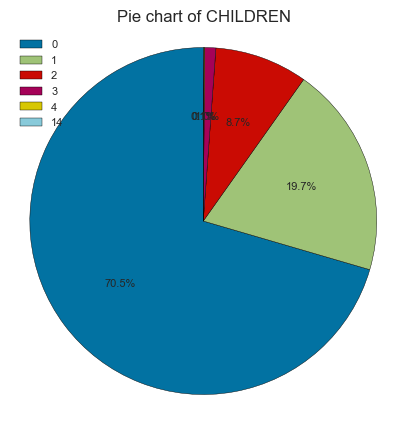

In [50]:
pie_plot(df,'CHILDREN')

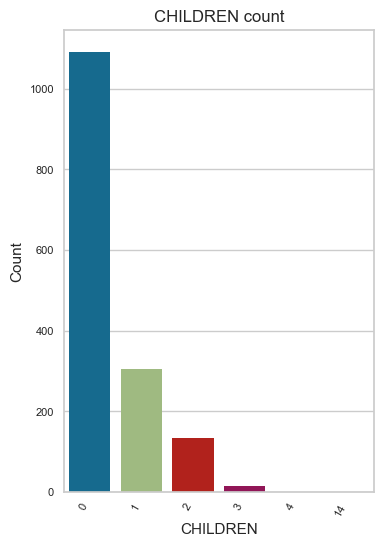

In [51]:
bar_plot(df,'CHILDREN')

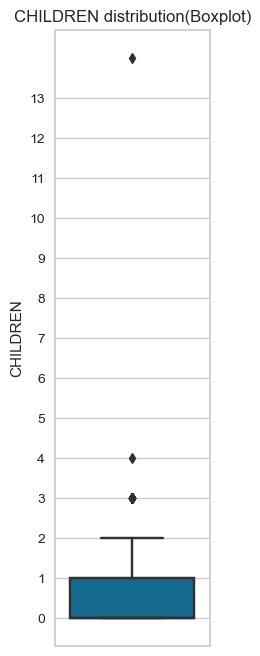

In [52]:
box_plot(df,'CHILDREN')

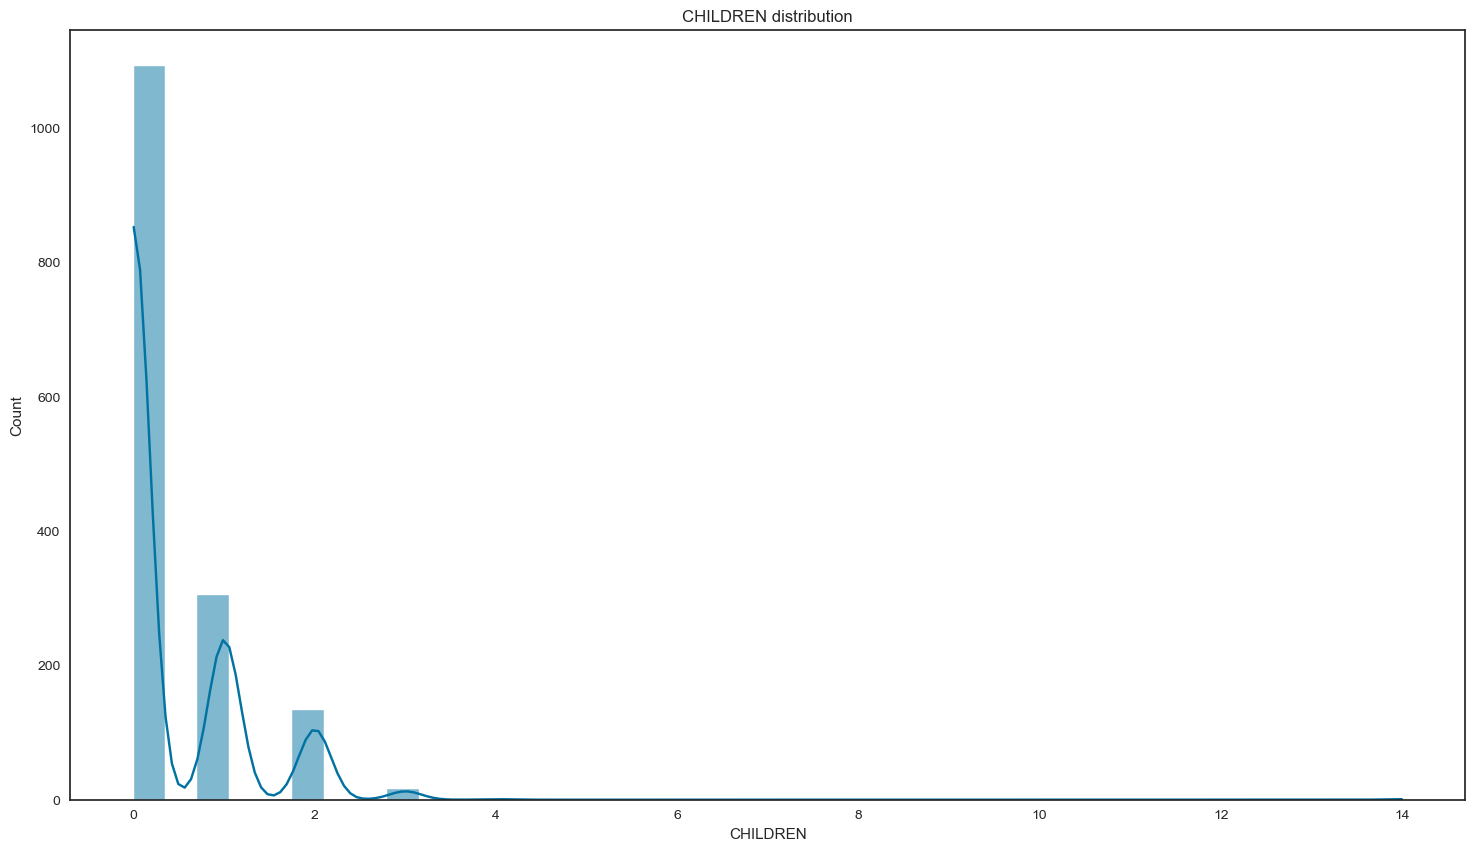

In [53]:
hist_plot(df,'CHILDREN')

{0: 126, 1: 36, 2: 12, 4: 1, 3: 0, 14: 0}


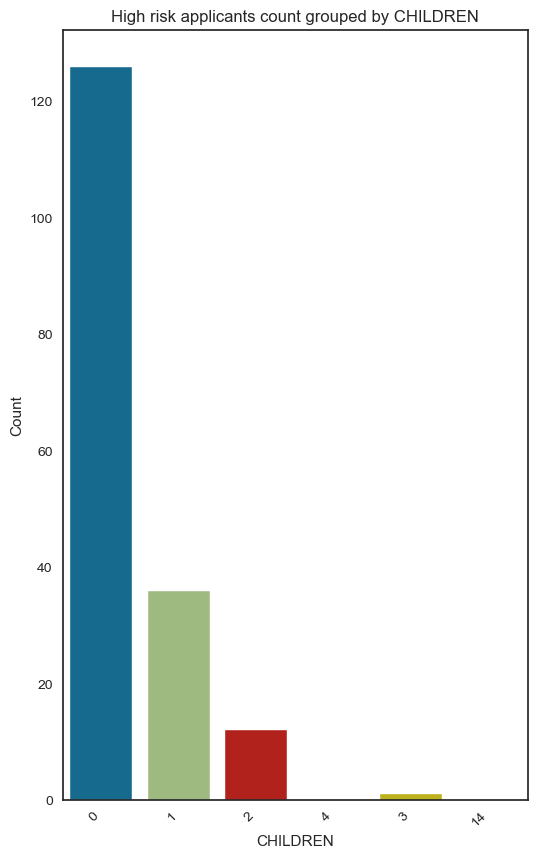

In [54]:
low_high_risk_bar_plot(df,'CHILDREN')

In [55]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
gen_info(df,'Annual_income')

Description:
count      1525.00
mean     191399.33
std      113253.00
min       33750.00
25%      121500.00
50%      166500.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64
Object type:
float64
Value count:
           Count  Frequency (%)
135000.00    170          11.15
112500.00    144           9.44
180000.00    137           8.98
157500.00    125           8.20
225000.00    119           7.80
...          ...            ...
119700.00      1           0.07
69372.00       1           0.07
37800.00       1           0.07
333000.00      1           0.07
69750.00       1           0.07

[115 rows x 2 columns]


In [56]:
df['Annual_income'].fillna(df['Annual_income'].median(), inplace=True)


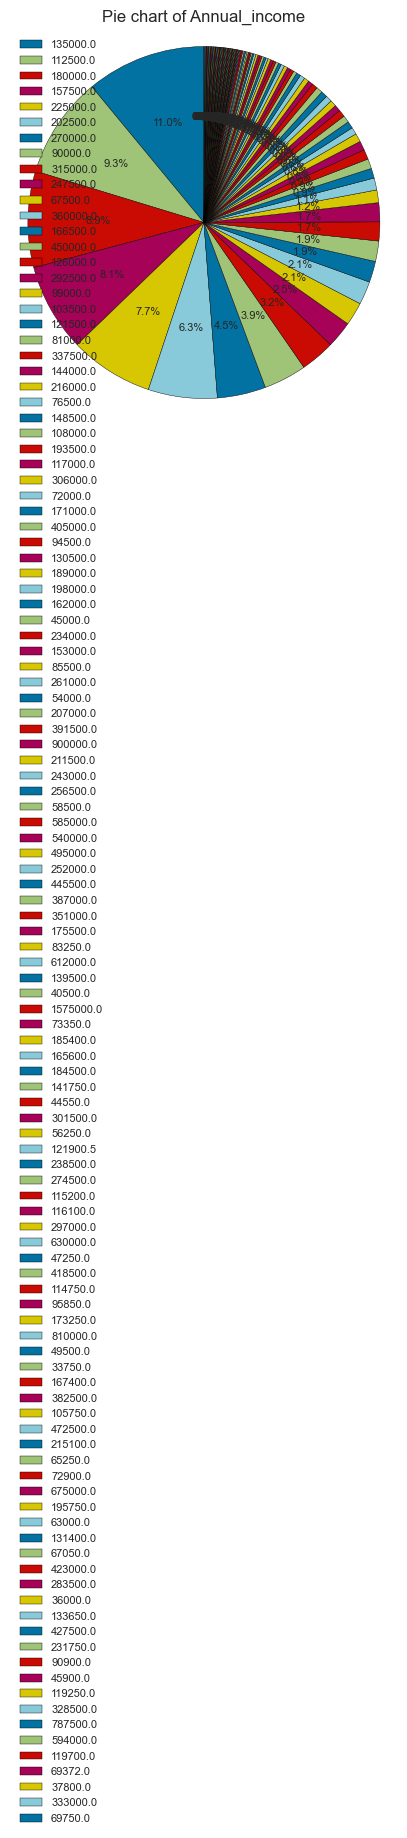

In [57]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pie_plot(df,'Annual_income')

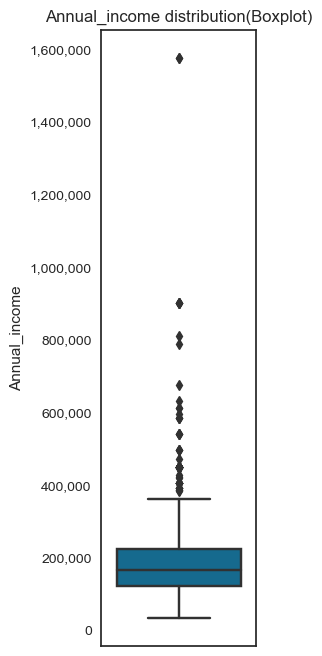

In [58]:
box_plot(df,'Annual_income')

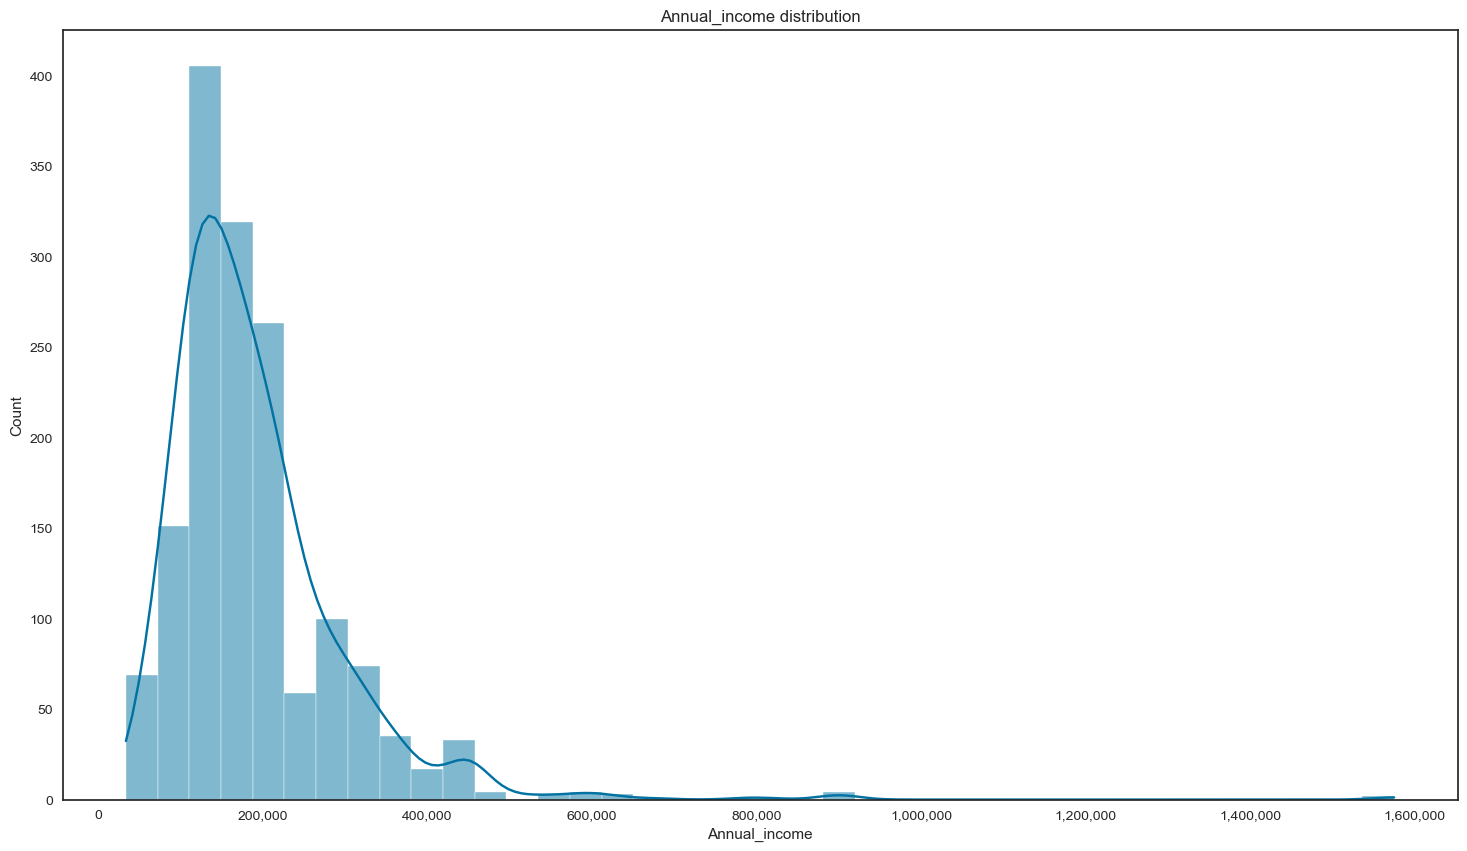

In [59]:
hist_plot(df,'Annual_income')

label
0   190049.14
1   198720.00
Name: Annual_income, dtype: float64


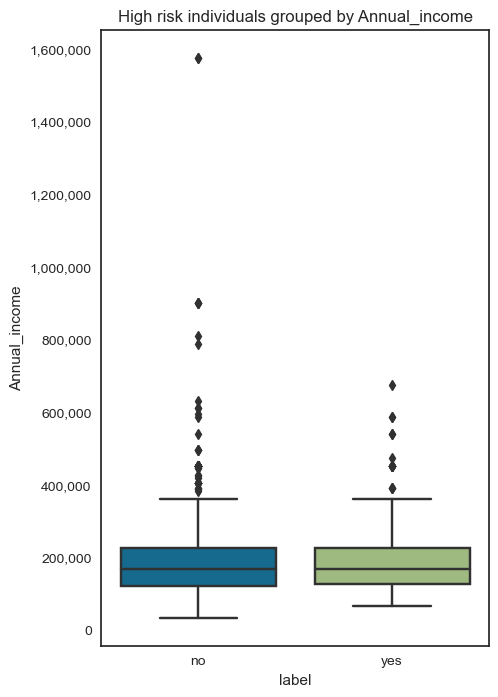

In [60]:
low_high_risk_box_plot(df,'Annual_income')

The average income is 191399.33 but this amount accounts for outliers. If we ignore the outlier most people make 157500
We have 1 applicants who makes more than 1000000
This feature is positively skewed
High risk and low risk applicants have roughly similar income

In [61]:
gen_info(df,'Type_Income')

Description:
count        1548
unique          4
top       Working
freq          798
Name: Type_Income, dtype: object
Object type:
object
Value count:
                      Count  Frequency (%)
Working                 798          51.55
Commercial associate    365          23.58
Pensioner               269          17.38
State servant           116           7.49


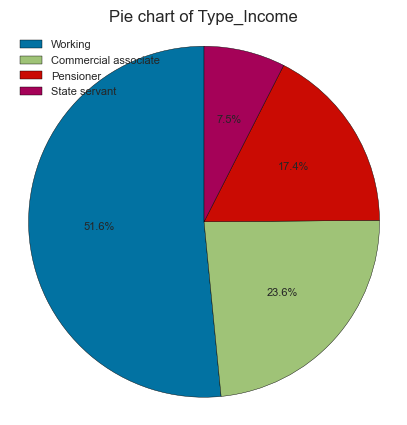

In [62]:
pie_plot(df,'Type_Income')

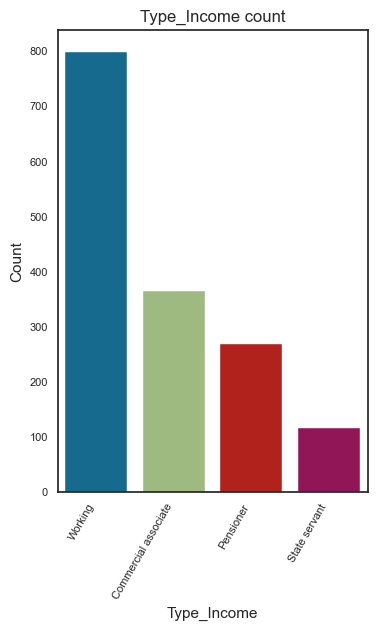

In [63]:
bar_plot(df,'Type_Income')

{'Working': 77, 'Commercial associate': 50, 'Pensioner': 42, 'State servant': 6}


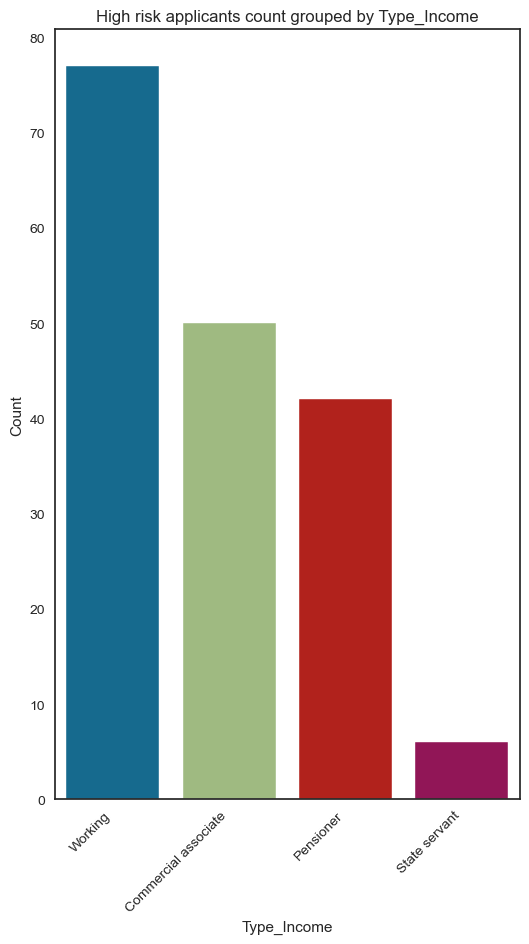

In [64]:
low_high_risk_bar_plot(df,'Type_Income')

In [65]:
gen_info(df,'EDUCATION')

Description:
count                              1548
unique                                5
top       Secondary / secondary special
freq                               1031
Name: EDUCATION, dtype: object
Object type:
object
Value count:
                               Count  Frequency (%)
Secondary / secondary special   1031          66.60
Higher education                 426          27.52
Incomplete higher                 68           4.39
Lower secondary                   21           1.36
Academic degree                    2           0.13


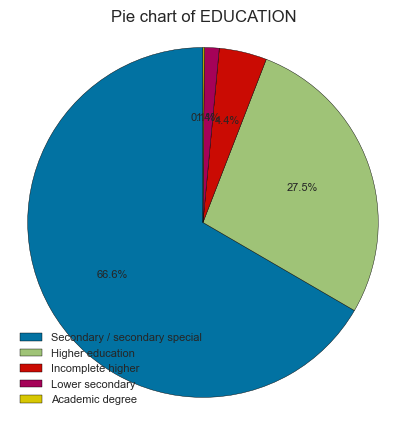

In [66]:
pie_plot(df,'EDUCATION')

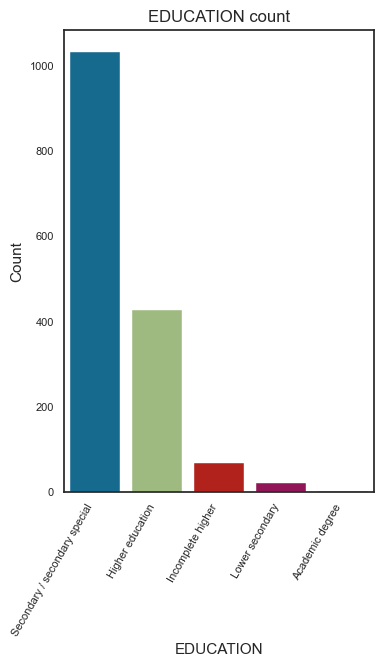

In [67]:
bar_plot(df,'EDUCATION')

{'Secondary / secondary special': 109, 'Higher education': 55, 'Lower secondary': 6, 'Incomplete higher': 5, 'Academic degree': 0}


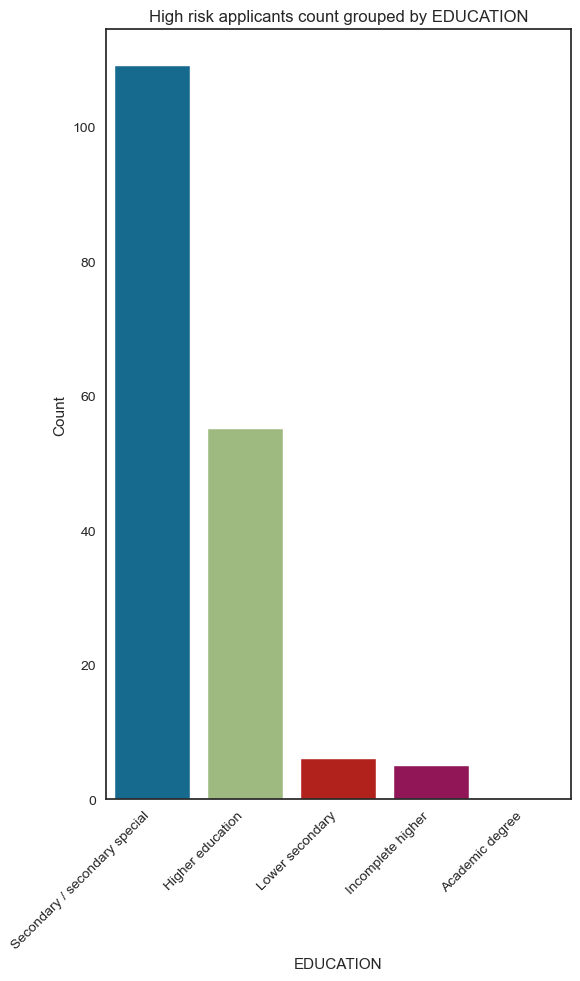

In [68]:
low_high_risk_bar_plot(df,'EDUCATION')

In [69]:
gen_info(df,'Marital_status')

Description:
count        1548
unique          5
top       Married
freq         1049
Name: Marital_status, dtype: object
Object type:
object
Value count:
                      Count  Frequency (%)
Married                1049          67.76
Single / not married    227          14.66
Civil marriage          101           6.52
Separated                96           6.20
Widow                    75           4.84


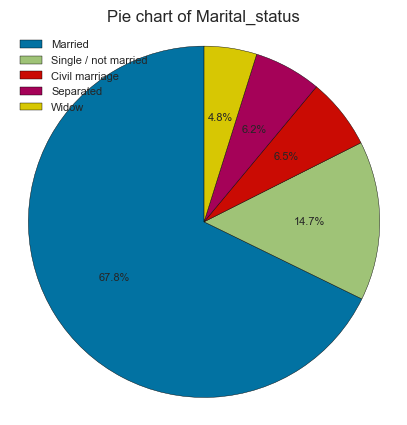

In [70]:
pie_plot(df,'Marital_status')

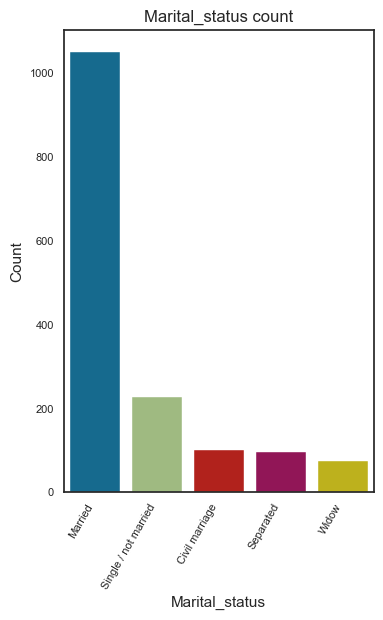

In [71]:
bar_plot(df,'Marital_status')

{'Married': 114, 'Single / not married': 35, 'Separated': 14, 'Widow': 8, 'Civil marriage': 4}


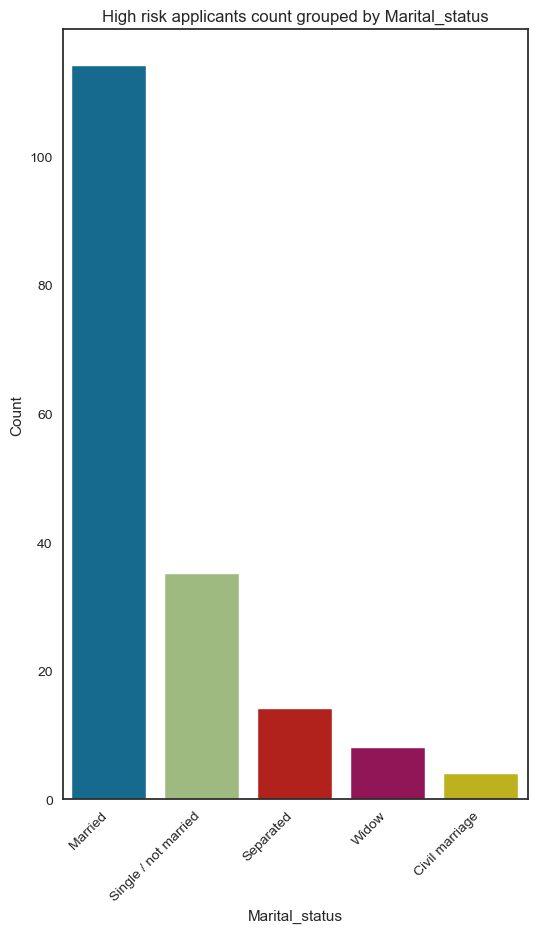

In [72]:
low_high_risk_bar_plot(df,'Marital_status')

Most applicants are married


In [73]:
gen_info(df,'Housing_type')

Description:
count                  1548
unique                    6
top       House / apartment
freq                   1380
Name: Housing_type, dtype: object
Object type:
object
Value count:
                     Count  Frequency (%)
House / apartment     1380          89.15
With parents            80           5.17
Municipal apartment     53           3.42
Rented apartment        21           1.36
Office apartment         9           0.58
Co-op apartment          5           0.32


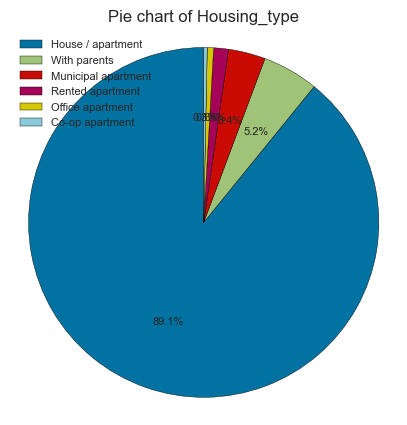

In [74]:
pie_plot(df,'Housing_type')

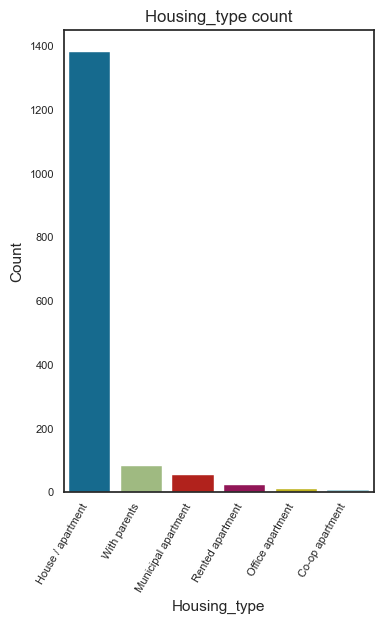

In [75]:
bar_plot(df,'Housing_type')

{'House / apartment': 146, 'Municipal apartment': 16, 'With parents': 5, 'Rented apartment': 4, 'Co-op apartment': 2, 'Office apartment': 2}


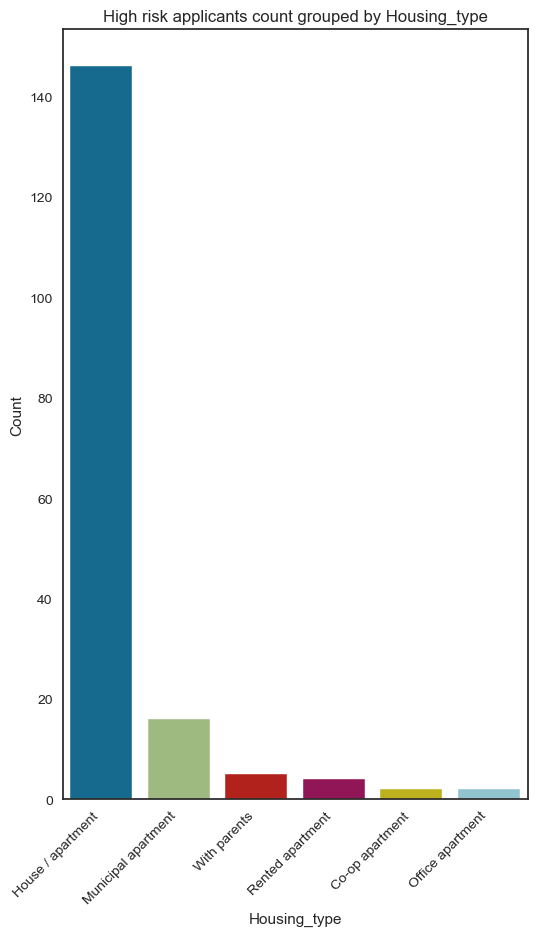

In [76]:
low_high_risk_bar_plot(df,'Housing_type')

In [77]:
gen_info(df,'Birthday_count')

Description:
count   1526.00
mean      43.92
std       11.58
min       21.10
25%       34.00
50%       42.88
75%       53.53
max       68.30
Name: Birthday_count, dtype: float64
Object type:float64


In [78]:
df['Birthday_count'].fillna(df['Birthday_count'].median(), inplace=True)


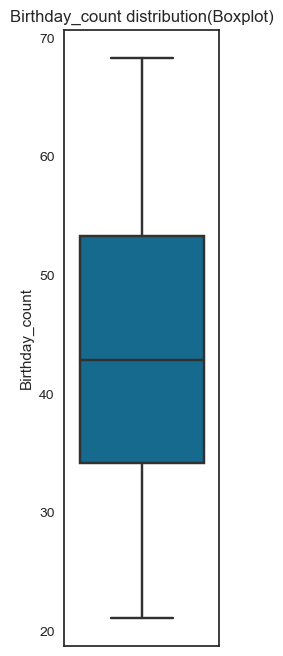

In [79]:
box_plot(df,'Birthday_count')

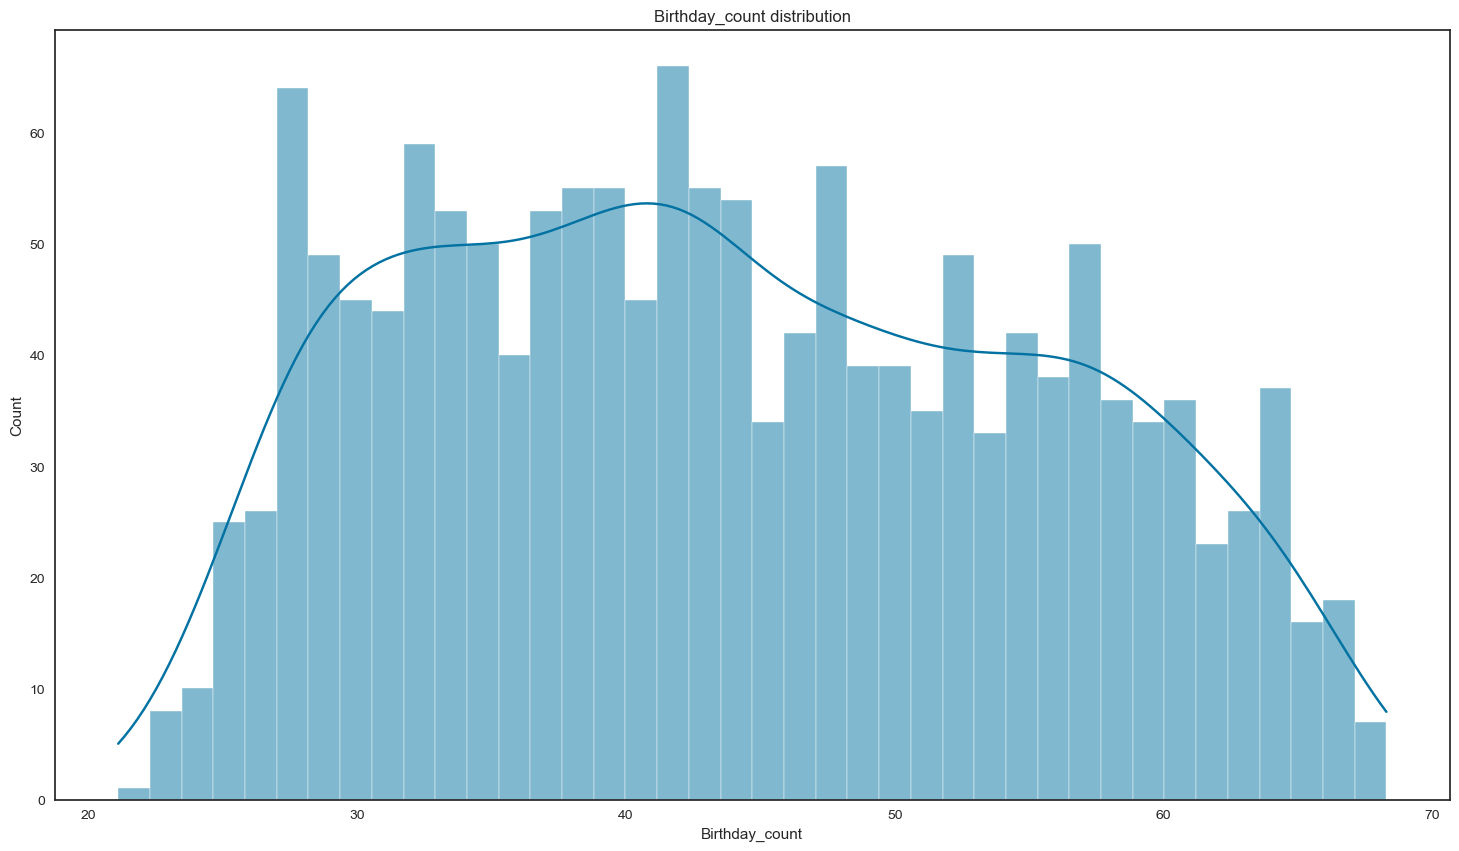

In [80]:
hist_plot(df,'Birthday_count')

label
0   43.72
1   45.35
Name: Birthday_count, dtype: float64


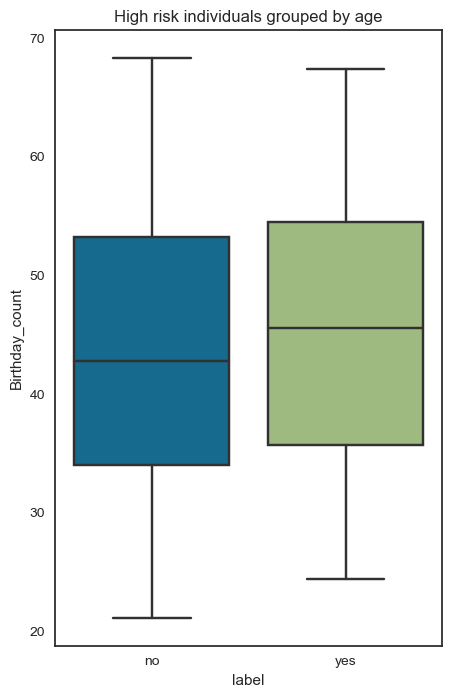

In [81]:
low_high_risk_box_plot(df,'Birthday_count')

The youngest applicant is 21 years old while the oldest is 68 years old. with the average of 43.7 and median of 42.6(outliers insensitive)
Age feature is not normally distributed, it is slightly positively skew
There is slight difference between the average age of high and low risk applicants

In [82]:
gen_info(df,'Employed_days')

Description:
count   1287.00
mean       7.30
std        6.56
min        0.20
25%        2.55
50%        5.35
75%        9.60
max       40.76
Name: Employed_days, dtype: float64
Object type:float64


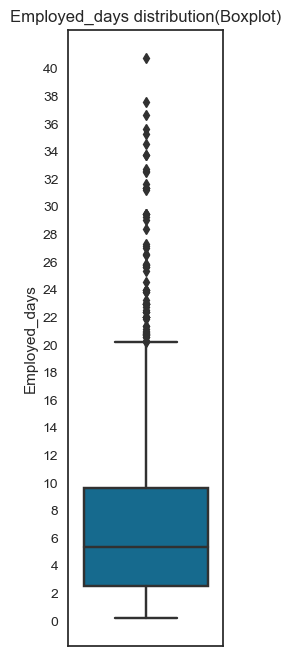

In [83]:
box_plot(df,'Employed_days')

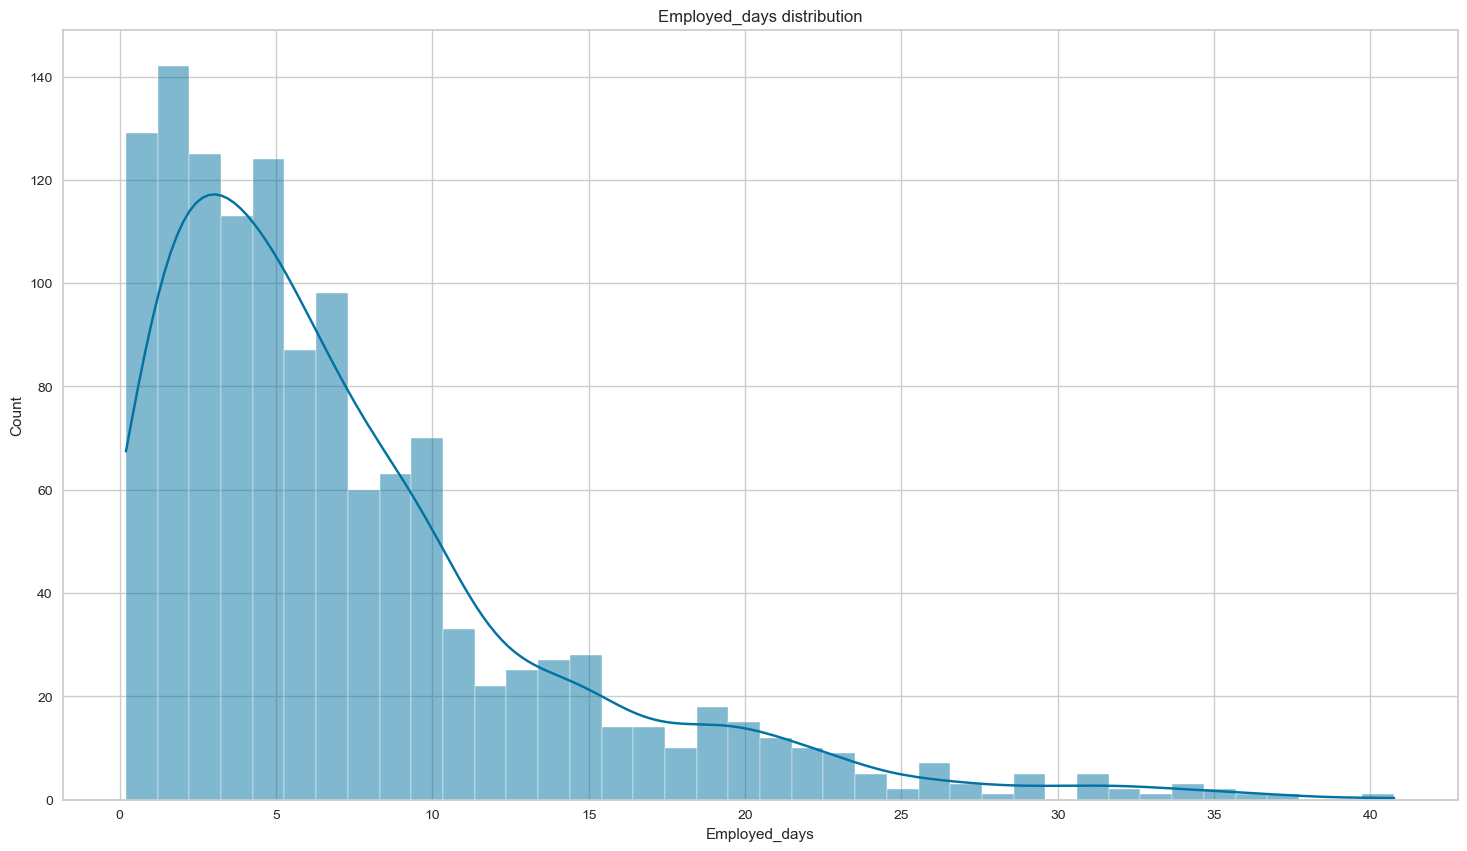

In [84]:
hist_plot(df,'Employed_days')

1      1.60
2      1.60
3      1.60
4      1.60
5      1.60
       ... 
1543   5.97
1544   3.31
1545   6.78
1546   1.77
1547   7.83
Name: Employed_days, Length: 1287, dtype: float64


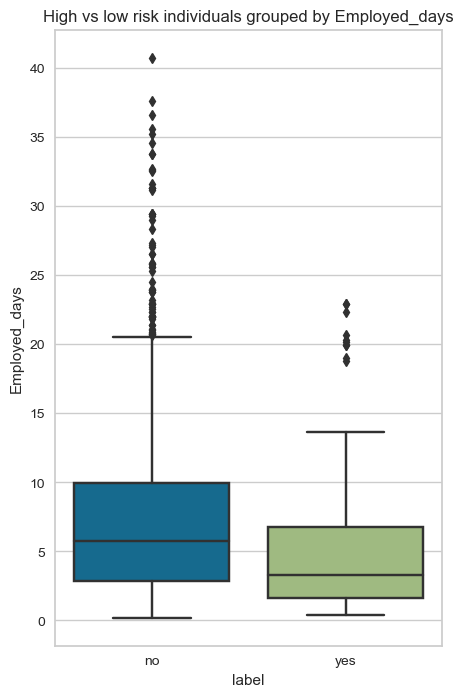

In [85]:
low_high_risk_box_plot(df,'Employed_days')

In [86]:
gen_info(df,'Work_Phone')

Description:
count   1548.00
mean       0.21
std        0.41
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Work_Phone, dtype: float64
Object type:
int64
Value count:
   Count  Frequency (%)
0   1226          79.20
1    322          20.80


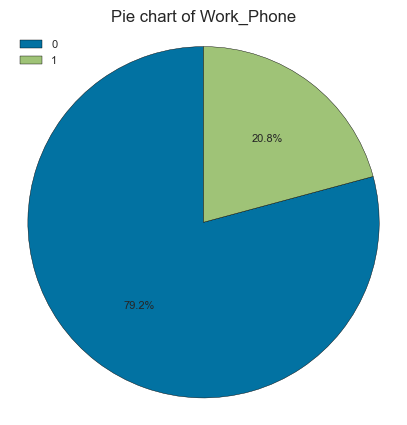

In [87]:
pie_plot(df,'Work_Phone')

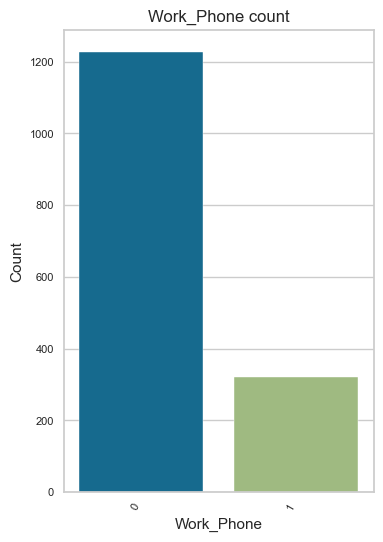

In [88]:
bar_plot(df,'Work_Phone')

In [89]:
gen_info(df,'Phone')

Description:
count   1548.00
mean       0.31
std        0.46
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: Phone, dtype: float64
Object type:
int64
Value count:
   Count  Frequency (%)
0   1069          69.06
1    479          30.94


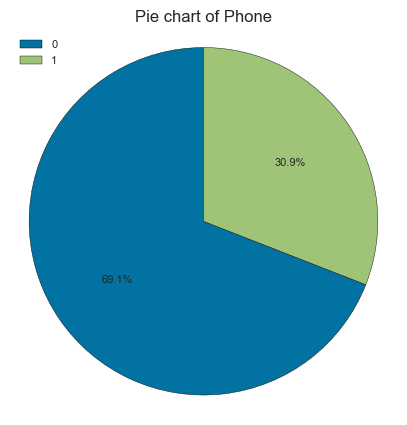

In [90]:
pie_plot(df,'Phone')

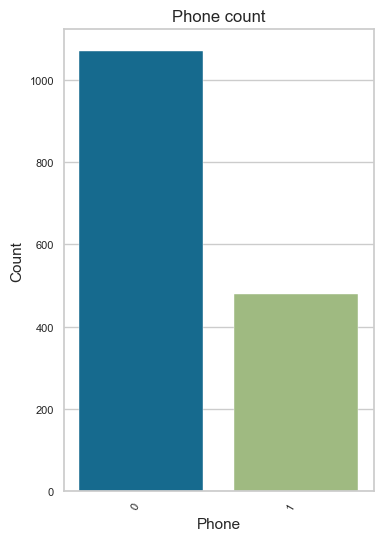

In [91]:
bar_plot(df,'Phone')

In [92]:
gen_info(df,'EMAIL_ID')

Description:
count   1548.00
mean       0.09
std        0.29
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: EMAIL_ID, dtype: float64
Object type:
int64
Value count:
   Count  Frequency (%)
0   1405          90.76
1    143           9.24


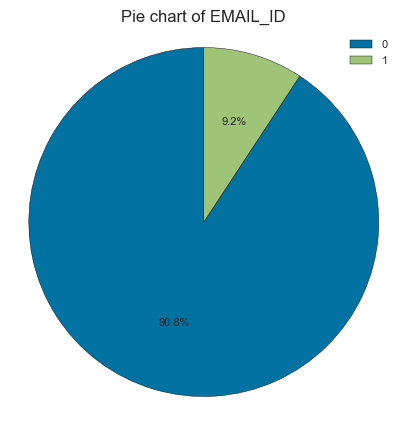

In [93]:
pie_plot(df,'EMAIL_ID')

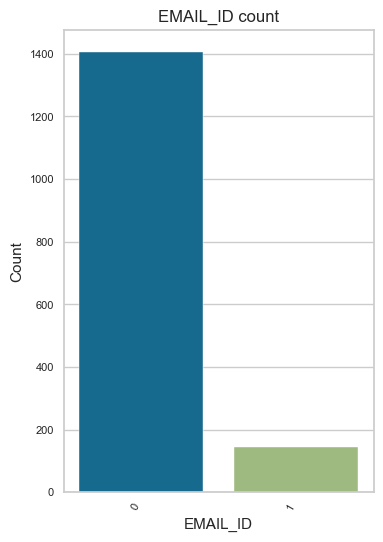

In [94]:
bar_plot(df,'EMAIL_ID')

In [95]:
gen_info(df,'Type_Occupation')

Description:
count         1060
unique          18
top       Laborers
freq           268
Name: Type_Occupation, dtype: object
Object type:
object
Value count:
                       Count  Frequency (%)
Laborers                 268          25.28
Core staff               174          16.42
Managers                 136          12.83
Sales staff              122          11.51
Drivers                   86           8.11
High skill tech staff     65           6.13
Medicine staff            50           4.72
Accountants               44           4.15
Security staff            25           2.36
Cleaning staff            22           2.08
Cooking staff             21           1.98
Private service staff     17           1.60
Secretaries                9           0.85
Low-skill Laborers         9           0.85
Waiters/barmen staff       5           0.47
HR staff                   3           0.28
IT staff                   2           0.19
Realty agents              2           0.19


In [96]:
k=df['Type_Occupation'].isnull().sum()
l=df['Type_Occupation'].shape[0]
print('The percentage of missing rows is {:.2f} %'.format(k*100/l))

The percentage of missing rows is 31.52 %


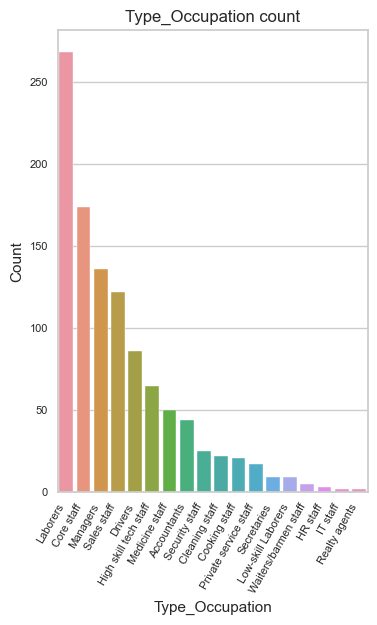

In [97]:
bar_plot(df,'Type_Occupation')

In [98]:
gen_info(df,'Family_Members')

Description:
count   1548.00
mean       2.16
std        0.95
min        1.00
25%        2.00
50%        2.00
75%        3.00
max       15.00
Name: Family_Members, dtype: float64
Object type:
int64
Value count:
    Count  Frequency (%)
2     802          51.81
1     334          21.58
3     268          17.31
4     127           8.20
5      15           0.97
6       1           0.06
15      1           0.06


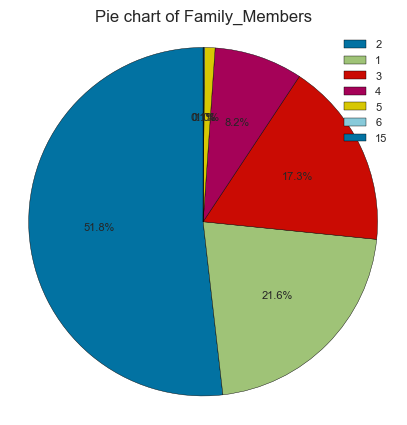

In [99]:
pie_plot(df,'Family_Members')

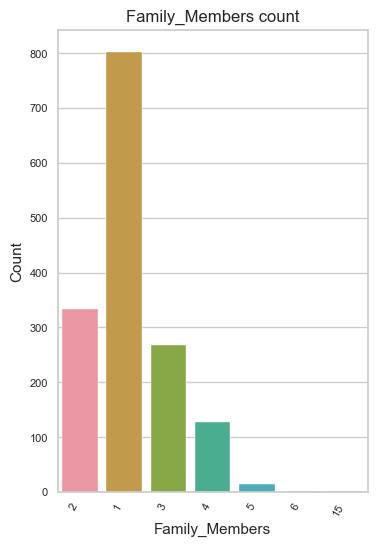

In [100]:
bar_plot(df,'Family_Members')

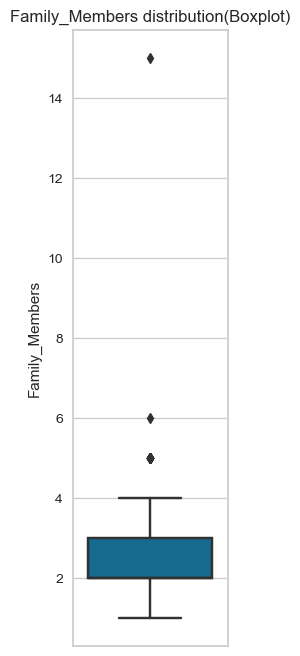

In [101]:
box_plot(df,'Family_Members')

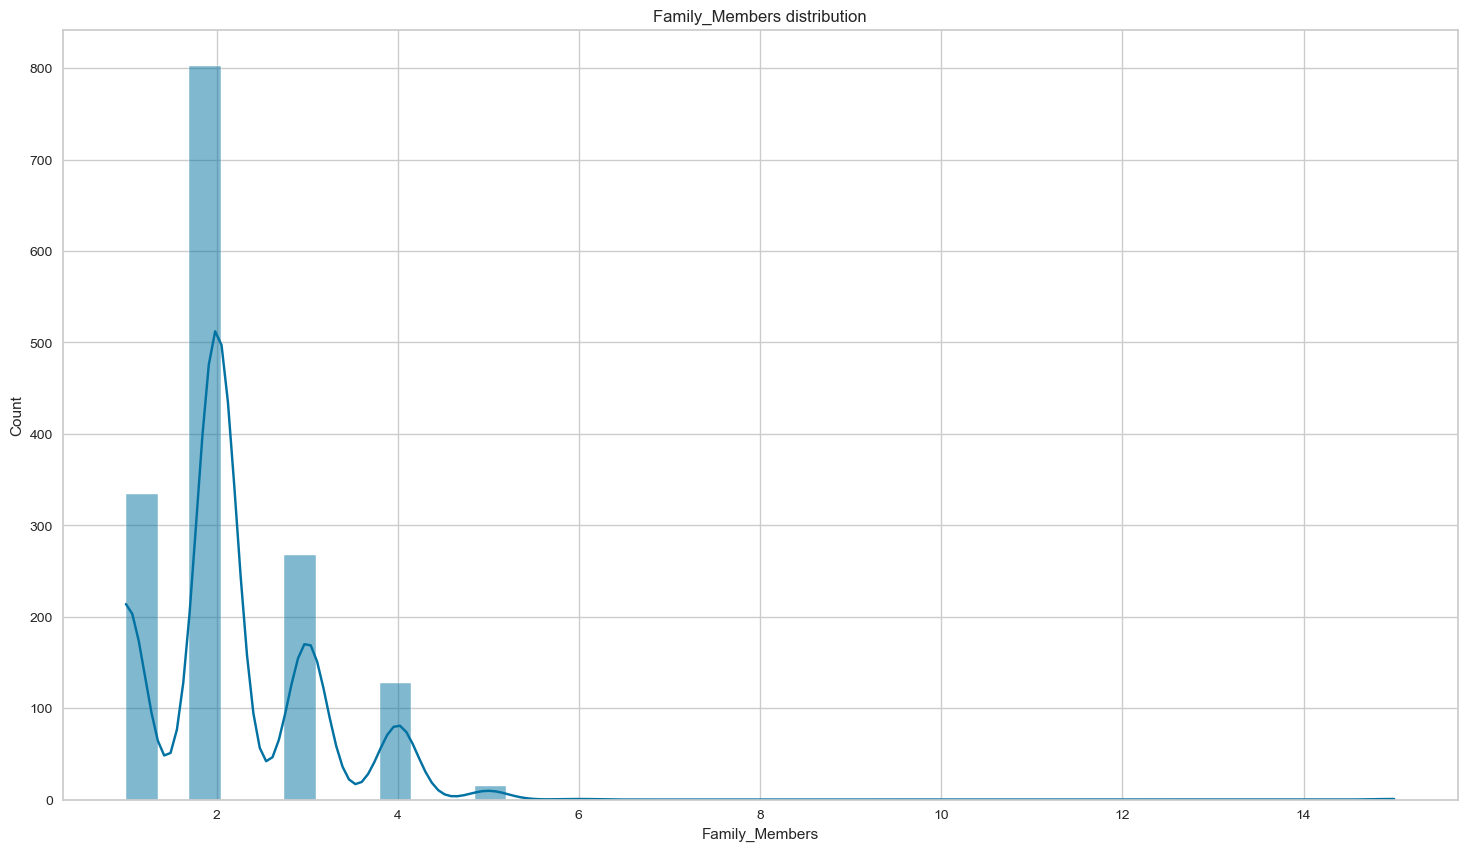

In [102]:
hist_plot(df,'Family_Members')

{2: 96, 1: 39, 3: 29, 4: 10, 6: 1, 5: 0, 15: 0}


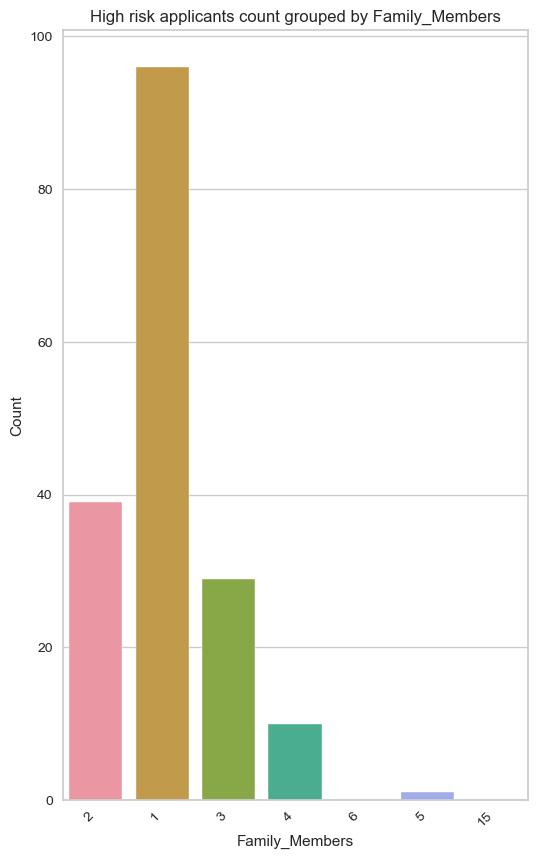

In [103]:
low_high_risk_bar_plot(df,'Family_Members')

## Bivariate analysis

### Numerical vs numerical features (Correlation & scatter plots)

#### Scatter plots

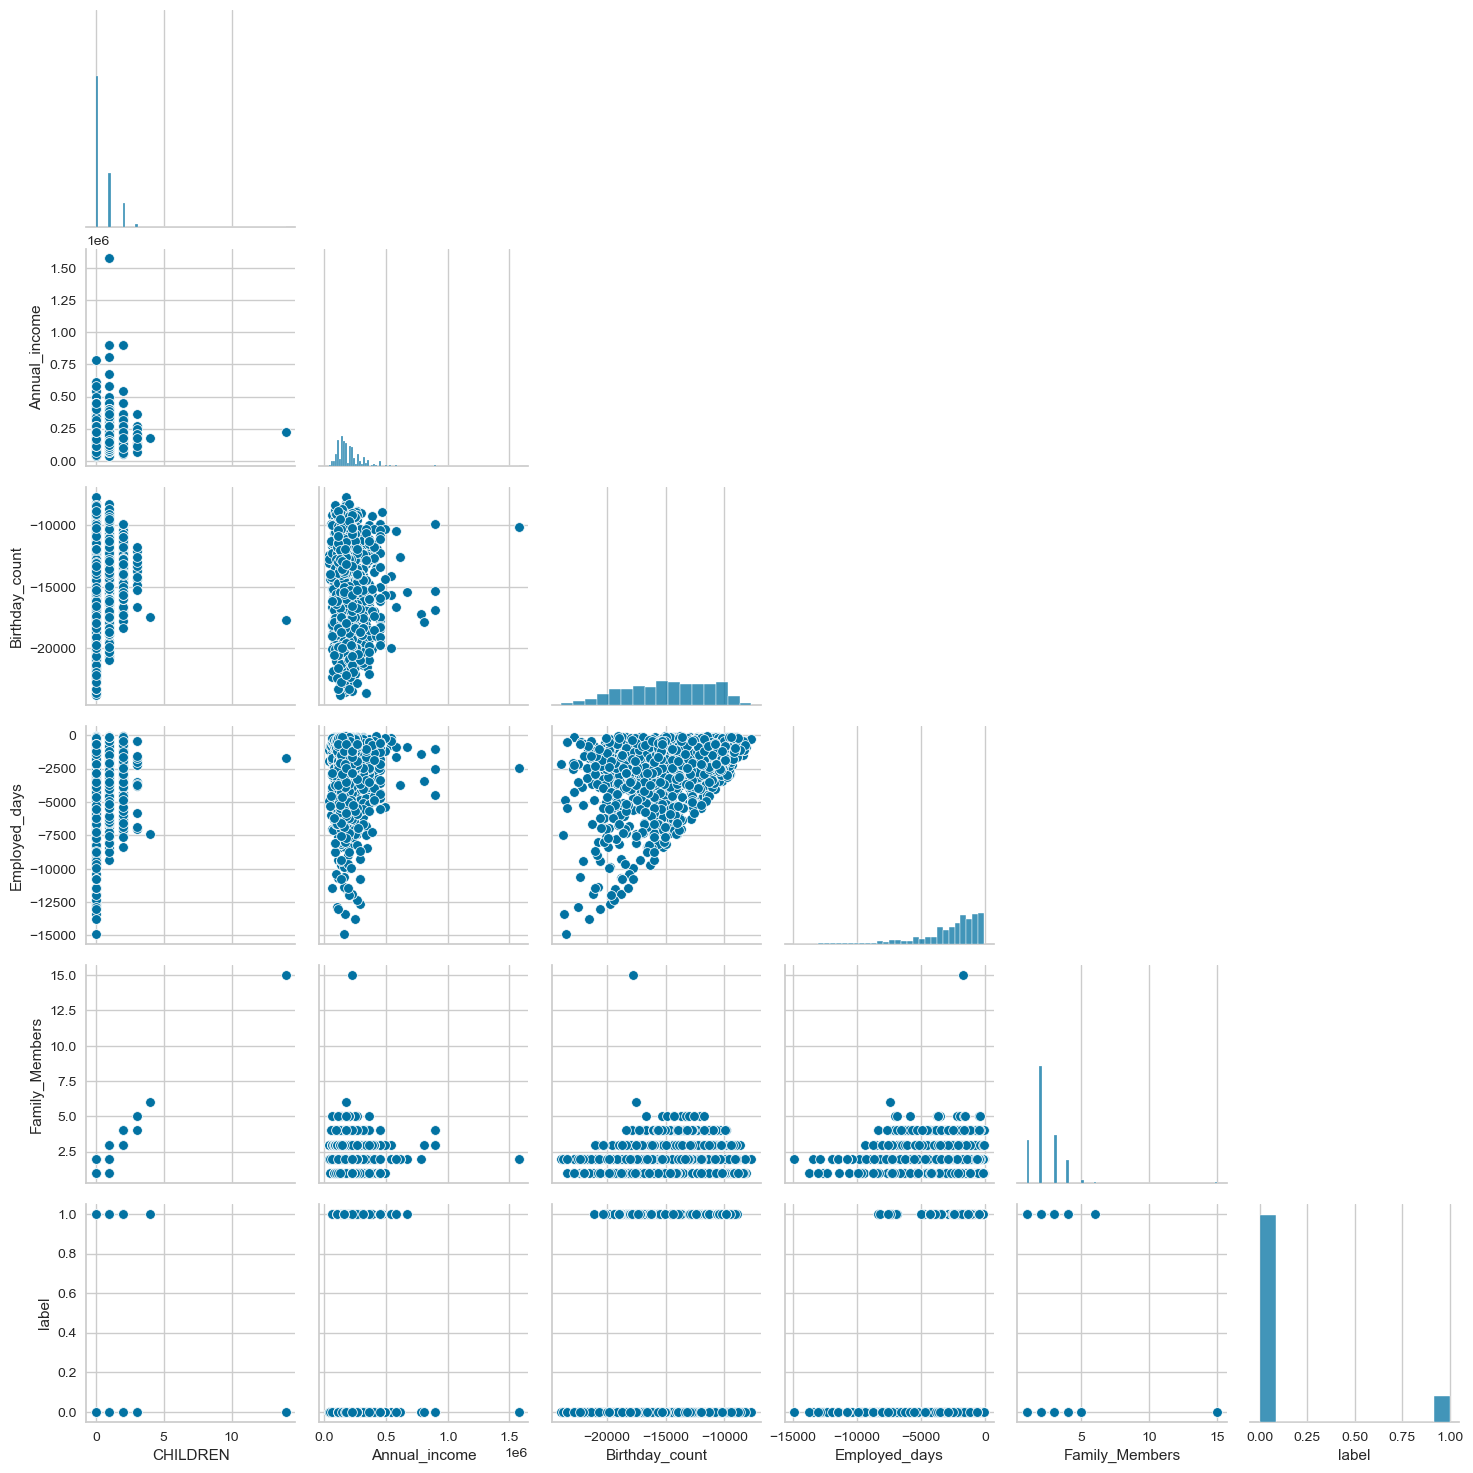

In [104]:
sns.pairplot(df[df['Employed_days'] < 0].drop(['Ind_ID','Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',],axis=1),corner=True)
plt.show()

Interpretation:

>> We can see a positive linear correlation between the family_member and the children. 
>> This makes sense, the more the children someone have, the larger the family member count. 
>> This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.
>> Another interesting trend is the Employed_days and Birthday_count. This also makes sense, the longer the employee has been     working, the older they are.

### Employed_days vs Birthday_count (numerical vs numerical feature comparison)

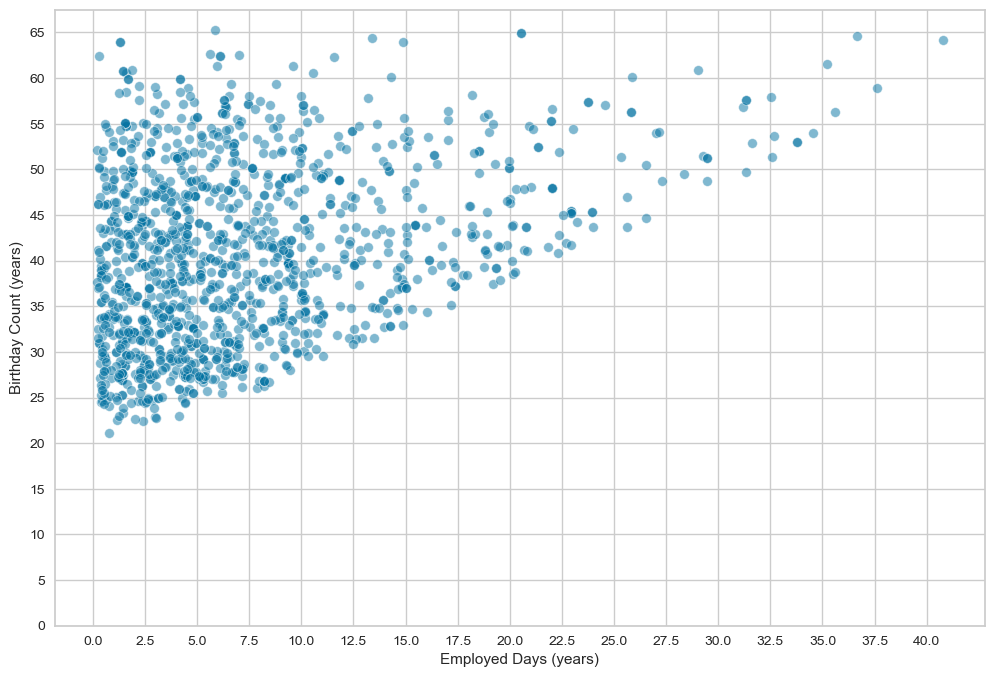

In [105]:
# Calculate 'Employed_days' and 'Birthday_count' as you did
Employed_days = np.abs(df['Employed_days'][df['Employed_days'] < 0]) / 365.25
Birthday_count = np.abs(df['Birthday_count']) / 365.25

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=Employed_days, y=Birthday_count, alpha=0.5)

# Customize the x-axis and y-axis labels and ticks
plt.xticks(np.arange(0, Employed_days.max(), 2.5))
plt.yticks(np.arange(0, Birthday_count.max(), 5))  # Adjust the max value for y-axis ticks

# Set axis labels
plt.xlabel('Employed Days (years)')
plt.ylabel('Birthday Count (years)')

# Show the plot
plt.show()


Interpretation:

>> This scatterplot shows that the age of the applicants is correlated with the length of the employment. 
>> The reason why it is shaped like a reversed triangle, it is because the age of the applicants increase with the length of      the employment. 
>> You can't have an employment length > than the age.

In [106]:
# change the datatype of target feature to int
label_int = df['label'].astype('int32')

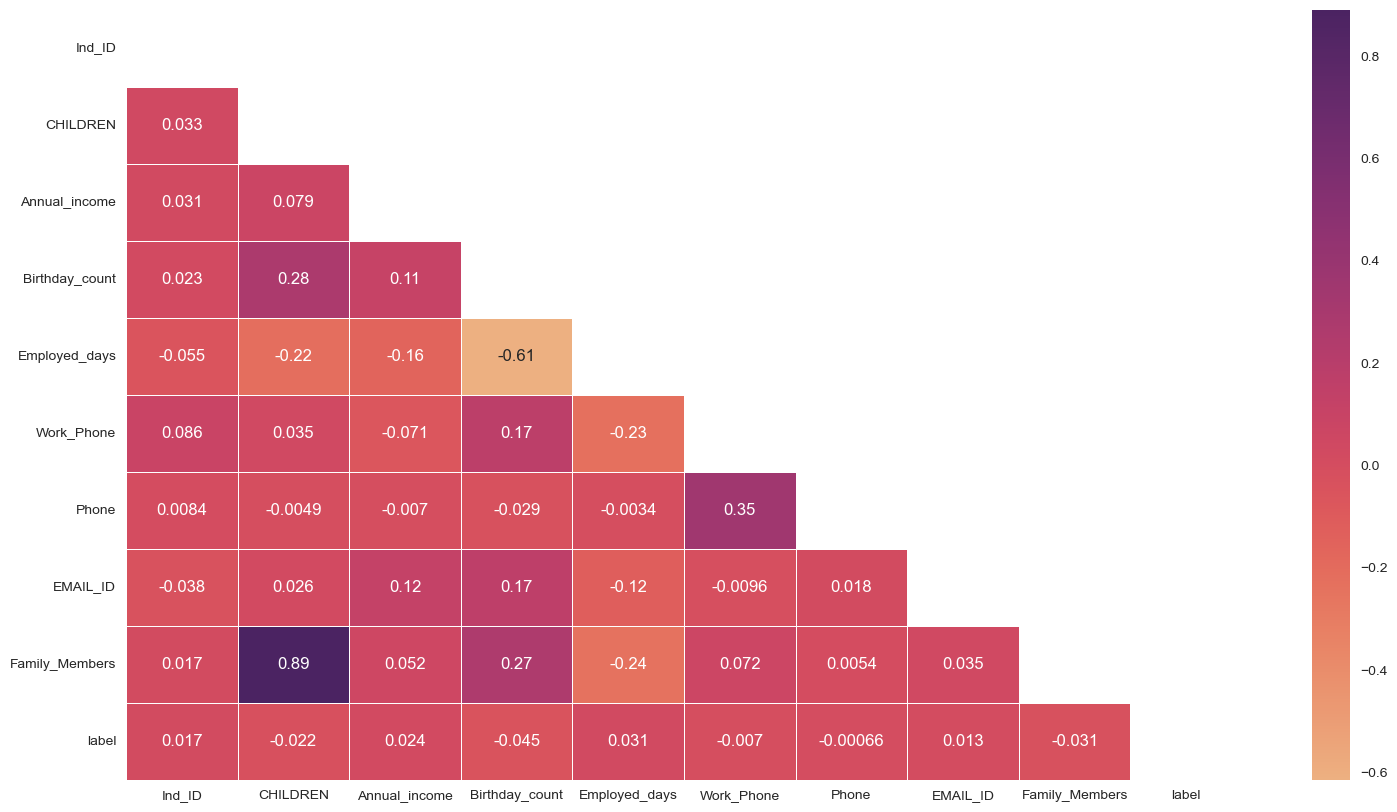

In [107]:
# correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
df_corr_no_mobile = pd.concat([df.drop(['Mobile_phone','label'], axis=1),label_int],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr_no_mobile, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(df_corr_no_mobile, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

Interpretation:

>> There is no feature that is correlated with the target feature
>> Family member count is highly correlated with children count as previously discussed
>> Age has some positive correlation with the family member count and children count. The older a person is, the most likely      he/she will have a larger family.
>> Another positive correlation is having a phone and having a work phone.
>> The final positive correlation is between the age and work phone. The younger someone is the less likely he/she will have a    work phone.
>> We also have a negative correlation between the employed_days and the Birthday_count as previously seen.

### Family member count vs children count (numerical vs numerical feature comparison)

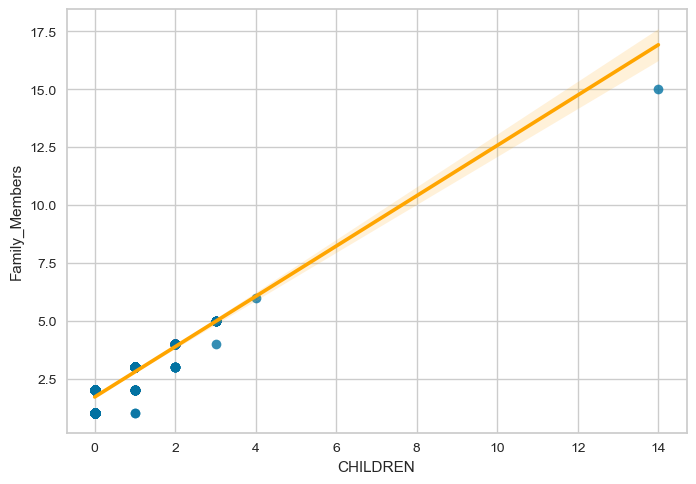

In [108]:
# Create a scatter plot with a regression line (orange)
sns.regplot(x='CHILDREN', y='Family_Members', data=df, line_kws={'color': 'orange'})

# Show the plot
plt.show()

### Numerical vs categorical features (ANOVA)

#### Birthday_count vs the rest of categorical features

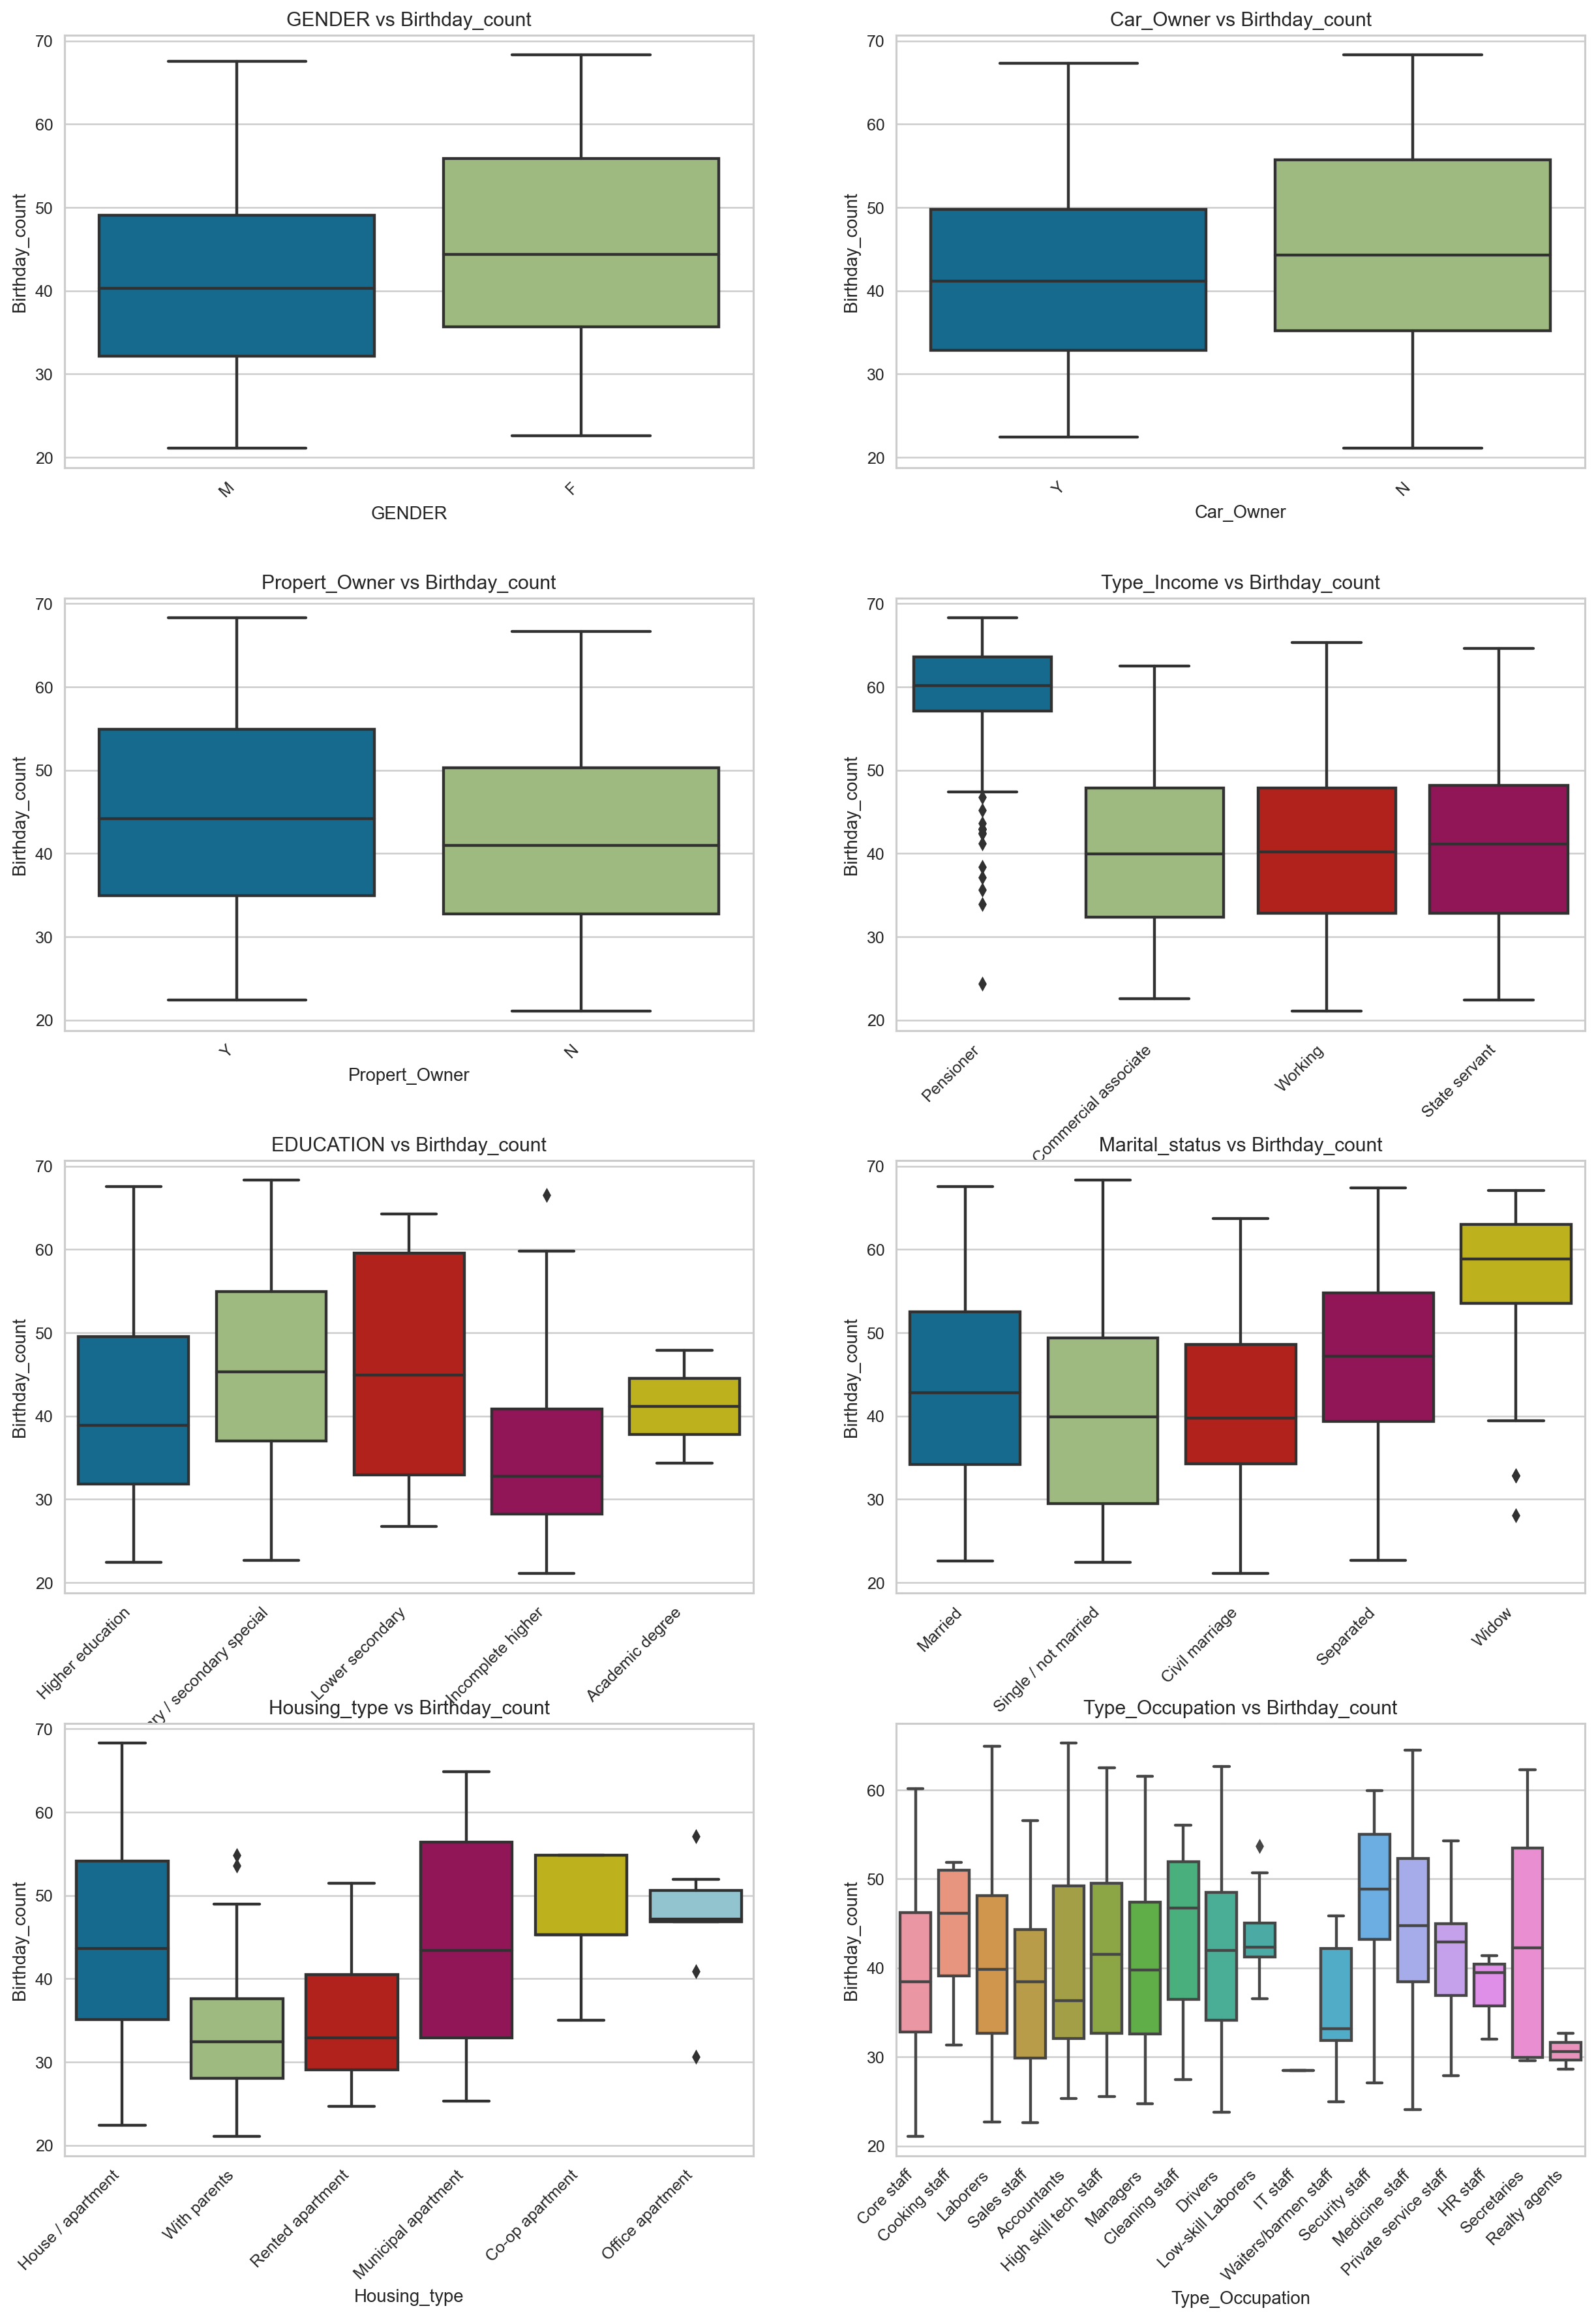

In [109]:
# Create the 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=180)
fig.tight_layout(pad=5.0)

# List of features
features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

# Initialize a counter for features
ft_counter = 0

# Loop through the subplots
for i in range(4):
    for j in range(2):
        if ft_counter < len(features):
            # Create a box plot for the current feature
            sns.boxplot(ax=axes[i, j], x=df[features[ft_counter]], y=np.abs(df['Birthday_count']) / 365.25)
            axes[i, j].set_title(features[ft_counter] + " vs Birthday_count")
            axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
            axes[i, j].set_xlabel(features[ft_counter])  # Set x-axis label
            axes[i, j].set_ylabel('Birthday_count')
            
            # Increment the feature counter
            ft_counter += 1

# Show the plot
plt.show()


Interpretation:

>> Female applicants are older than their male counterpart.
>> Those who don't own a car tend to be older.
>> Those who own a property tend to be older than those who don't.
   Of course, the pensioners are older that those who are working (We also see that some have pensioned at a young age, those      are outliers).
>> It is also interesting to see that those who hold an academic degree are younger in general than the other groups.
>> With no surprise, those who live with parent tend to be younger. We also see some outlier as well.
>> Lastly, who work as cleaning staff tend to be older while those who work in IT tend to be younger.

### Employed_days vs the rest of categorical features

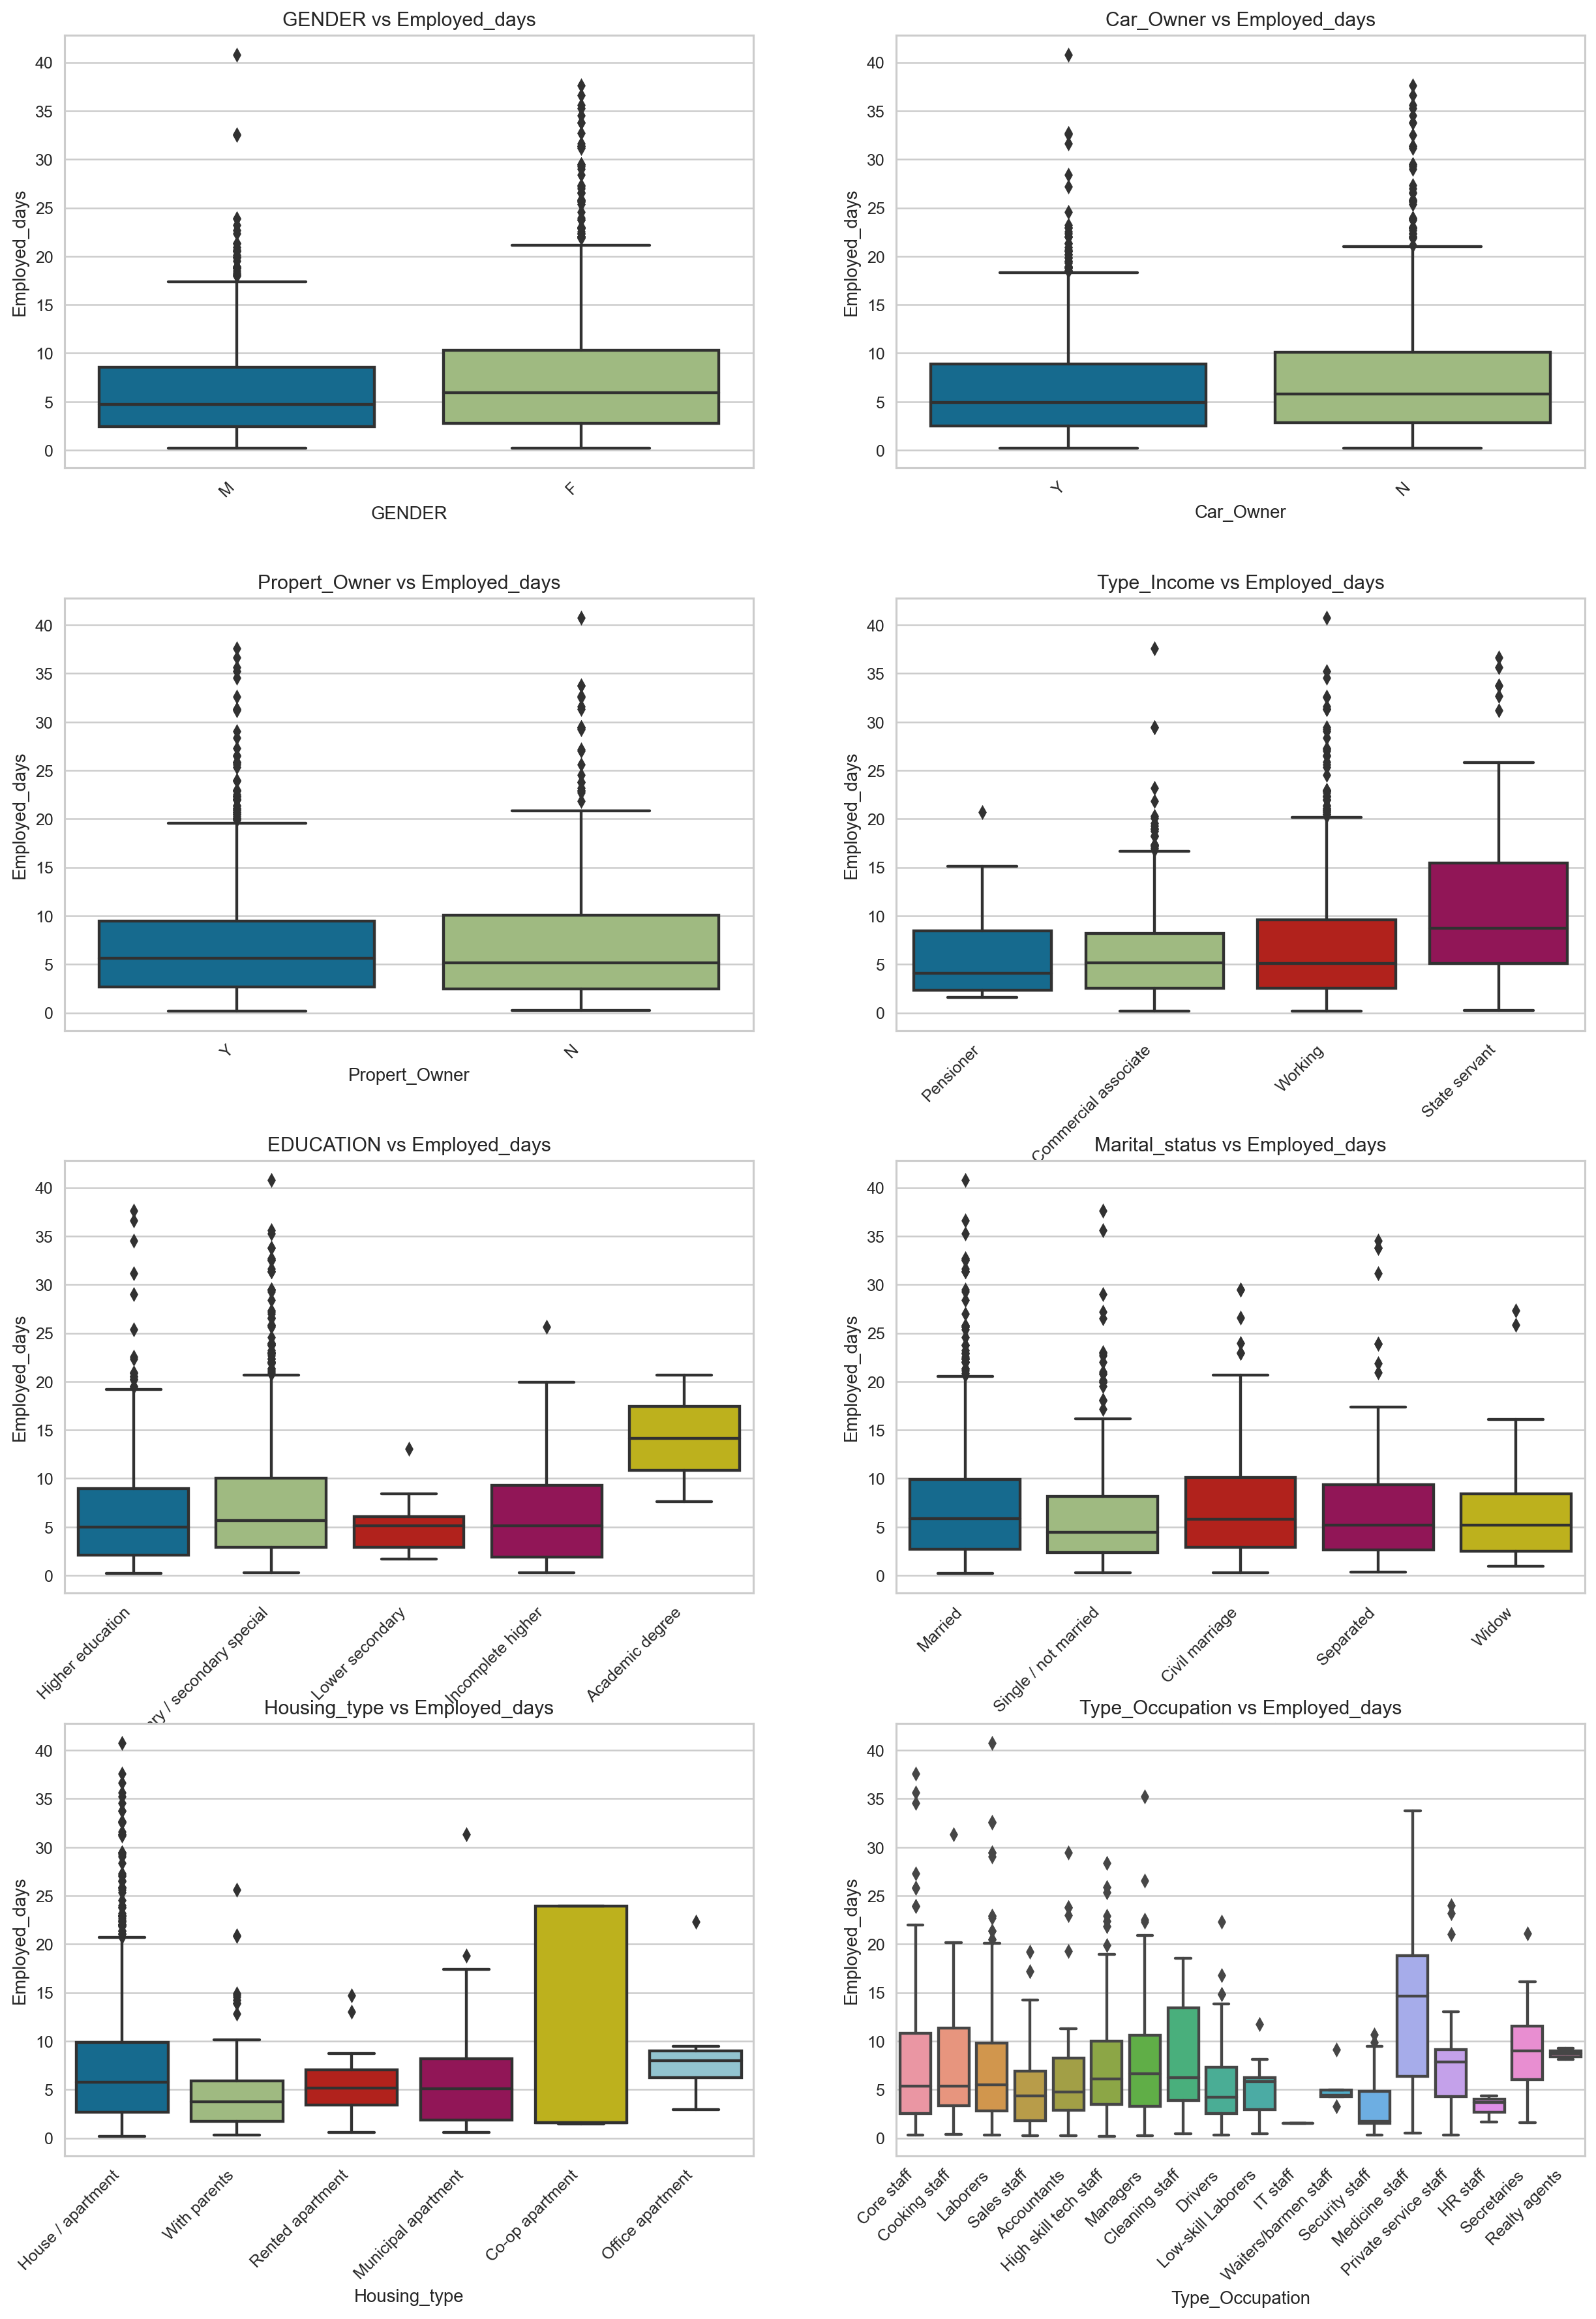

In [110]:
# Create the 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=180)
fig.tight_layout(pad=5.0)

# List of features
features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

# Initialize a counter for features
ft_counter = 0

# Loop through the subplots
for i in range(4):
    for j in range(2):
        if ft_counter < len(features):
            # Create a box plot for the current feature
            sns.boxplot(ax=axes[i, j], x=df[features[ft_counter]], y=np.abs(df['Employed_days'][df['Employed_days'] < 0]) / 365.25)
            axes[i, j].set_title(features[ft_counter] + " vs Employed_days")
            axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
            axes[i, j].set_xlabel(features[ft_counter])  # Set x-axis label
            axes[i, j].set_ylabel('Employed_days')
            
            # Increment the feature counter
            ft_counter += 1

# Show the plot
plt.show()


Interpretation:

>> State employed applicant tend to have been employed longer than the rest.
>> Those who work in the medical field, have been employed longer than the rest.

### Annual_income vs the rest of categorical features

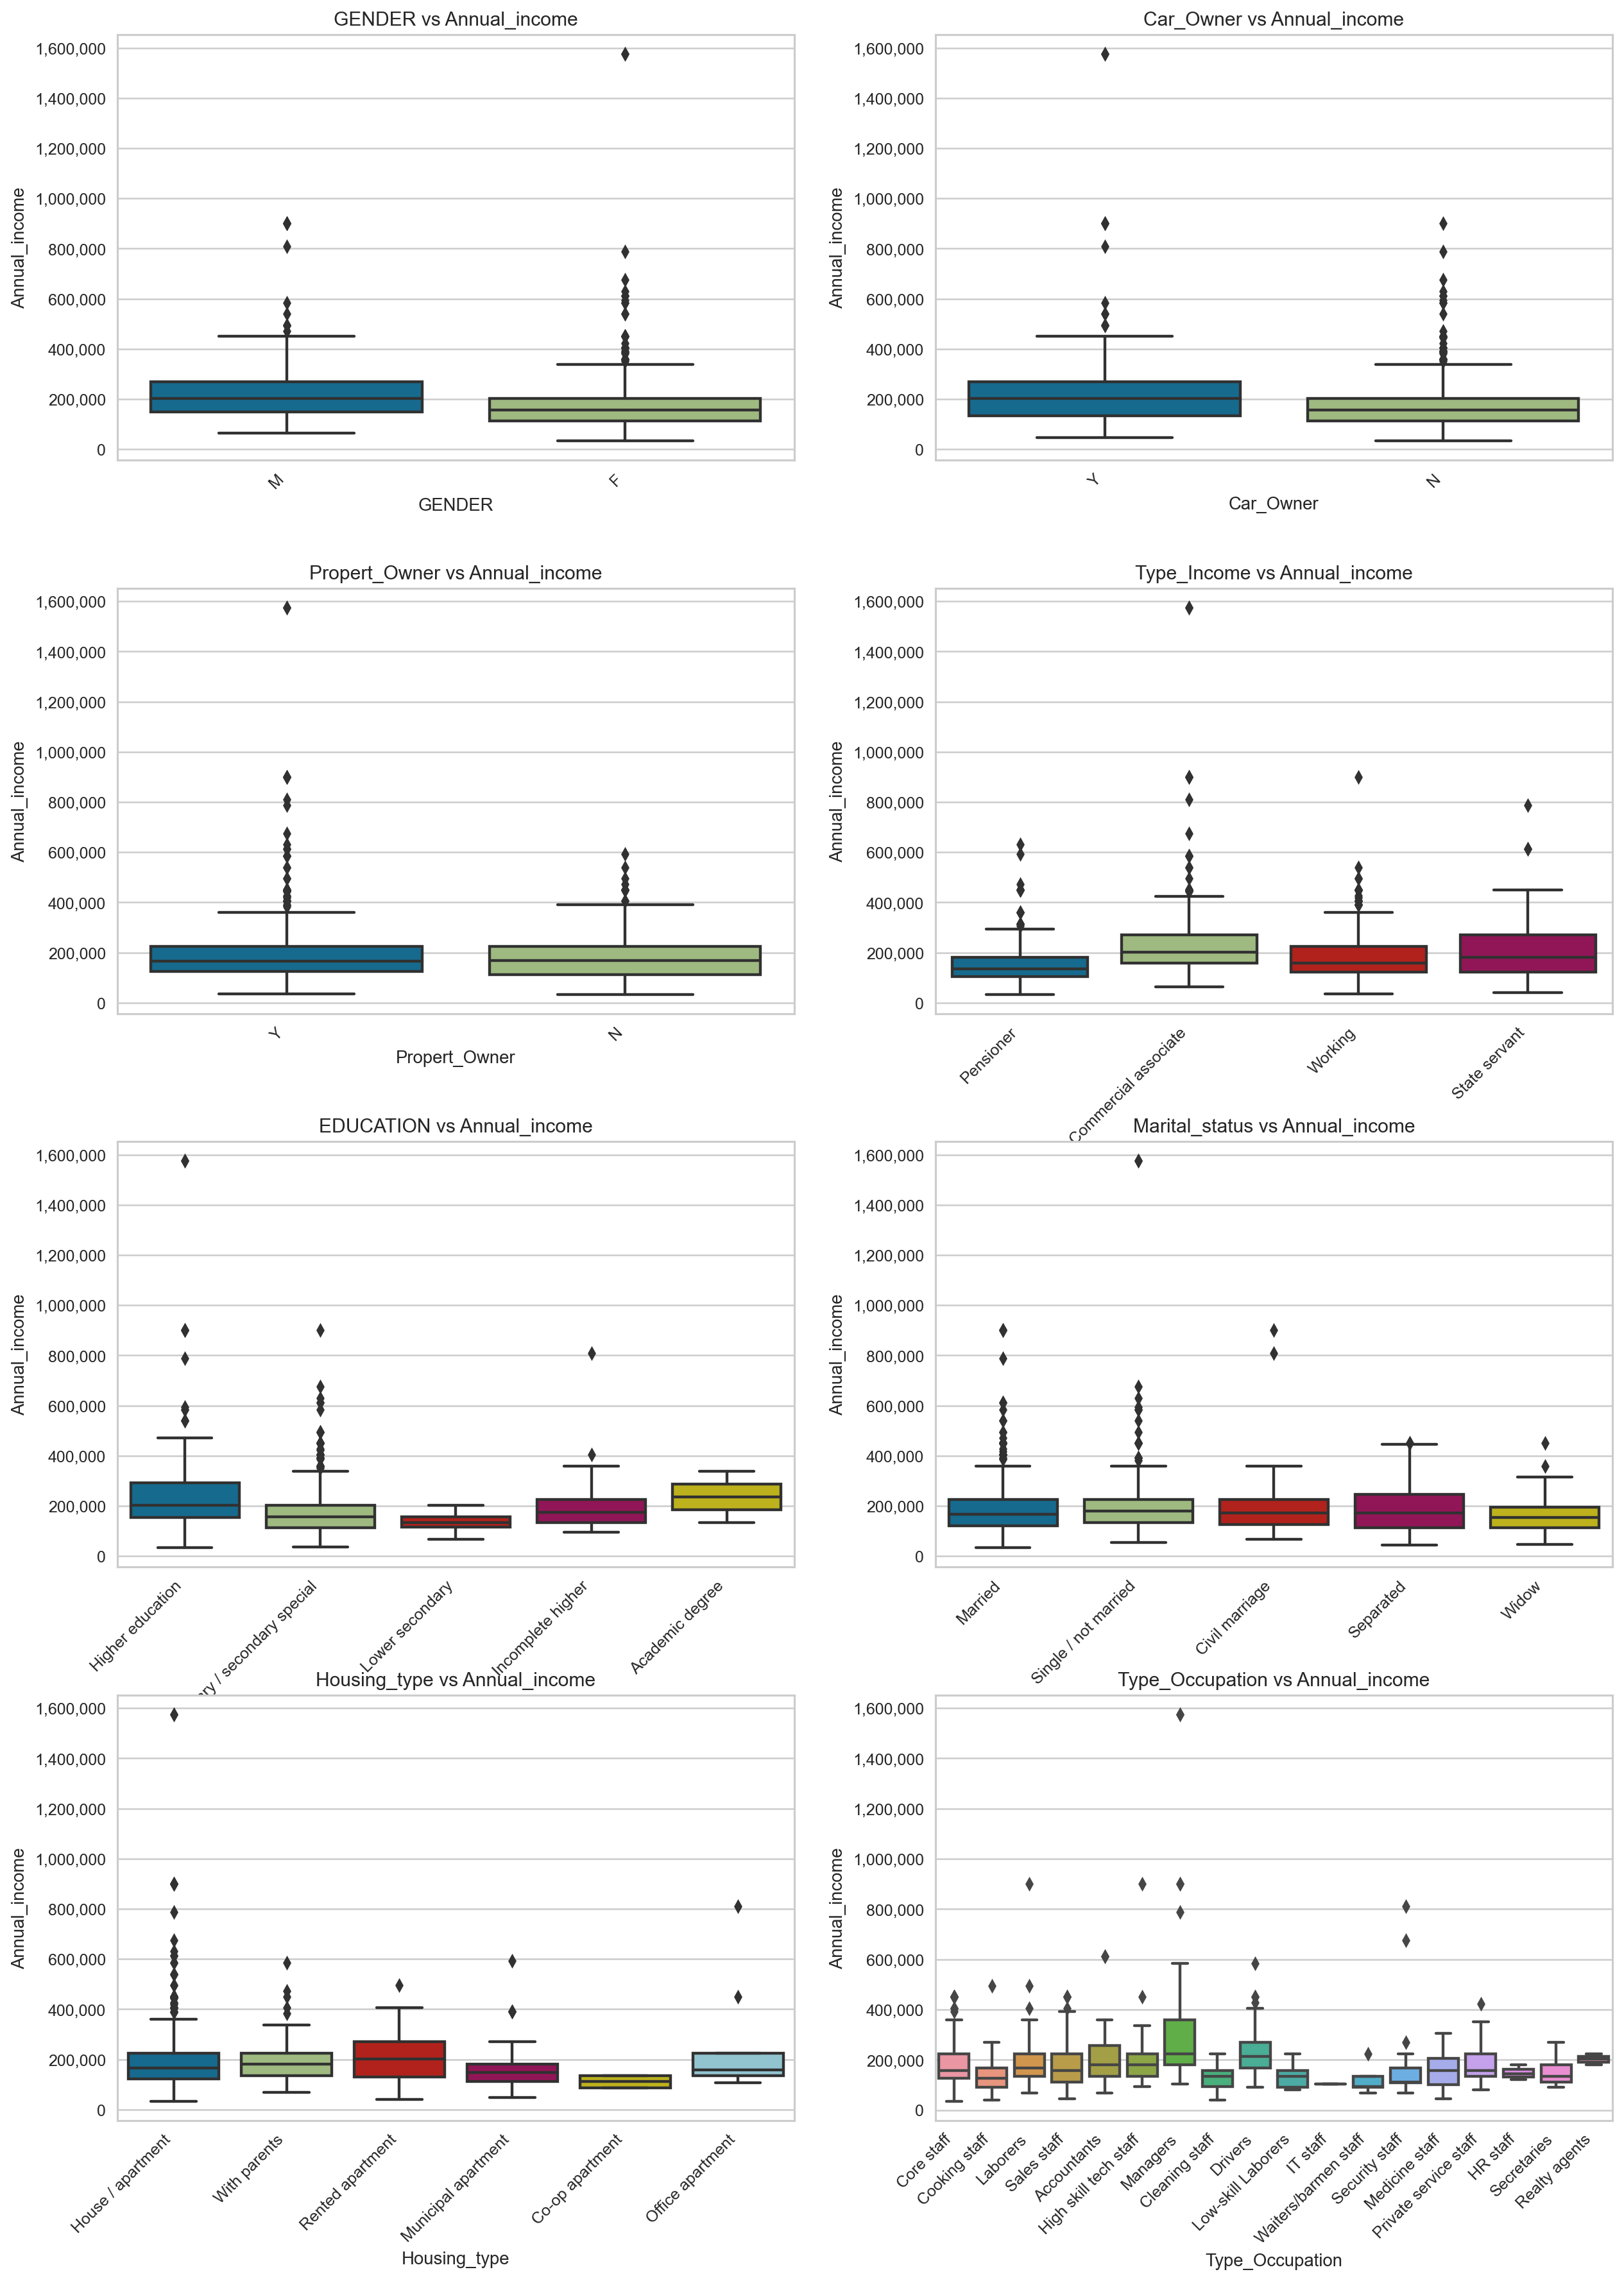

In [111]:
# Create the 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=180)
fig.tight_layout(pad=5.0)

# List of features
features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

# Initialize a counter for features
ft_counter = 0

# Loop through the subplots
for i in range(4):
    for j in range(2):
        if ft_counter < len(features):
            # Create a box plot for the current feature
            sns.boxplot(ax=axes[i, j], x=df[features[ft_counter]], y=df['Annual_income'])
            
            # Apply custom formatting to y-axis tick labels for the current subplot
            axes[i, j].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
            
            axes[i, j].set_title(features[ft_counter] + " vs Annual_income")
            axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
            axes[i, j].set_xlabel(features[ft_counter])  # Set x-axis label
            axes[i, j].set_ylabel('Annual_income')
            
            # Increment the feature counter
            ft_counter += 1

# Show the plot
plt.show()


### Categorical vs categorical features (Chi-square test)

In [112]:
def chi_func(feature, df):
    # Select rows with label == 1
    high_risk_ft = df[df['label'] == 1][feature]
    
    # Create a contingency table
    contingency_table = pd.crosstab(index=high_risk_ft, columns=['Count']).rename_axis(None, axis=1)
    
    # Calculate observed values
    obs = contingency_table
    print('Observed values:\n')
    print(obs)
    print('\n')
    
    # Calculate expected values
    expected_value = obs['Count'].sum() / len(obs)
    exp = pd.DataFrame([expected_value] * len(obs), columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    
    # Chi-square test
    chi_squared_stat = (((obs - exp) ** 2) / exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    
    # Calculate critical value
    df_chi = len(obs) - 1
    crit = stats.chi2.ppf(q=0.95, df=df_chi) # The stats.chi2.ppf function is used to calculate the percent-point function for the chi-square distribution
    # also known as the inverse cumulative distribution function
    print('Critical value:\n')
    print(crit)
    print('\n')
    
    # Calculate p-value
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=df_chi) # The p-value, or probability value
    # calculate the cumulative distribution function (CDF) for the chi-square distribution
    print('P-value:\n')
    print(p_value)
    print('\n')
    
    # Hypothesis testing
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
        
    # Hypothesis testing 2
    if p_value <= 0.05:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')



In [113]:
features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for ft in features:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft,df)



**** GENDER ****

Observed values:

        Count
GENDER       
F         100
M          75


Expected values:

        Count
GENDER       
F       87.50
M       87.50


Chi-square:

3.5714285714285716


Critical value:

3.841458820694124


P-value:

[0.05878172]


Fail to reject the null hypothesis
Fail to reject the null hypothesis


**** Car_Owner ****

Observed values:

           Count
Car_Owner       
N            108
Y             67


Expected values:

           Count
Car_Owner       
N          87.50
Y          87.50


Chi-square:

9.605714285714285


Critical value:

3.841458820694124


P-value:

[0.00193973]


Reject the null hypothesis
Reject the null hypothesis


**** Propert_Owner ****

Observed values:

               Count
Propert_Owner       
N                 65
Y                110


Expected values:

               Count
Propert_Owner       
N              87.50
Y              87.50


Chi-square:

11.571428571428571


Critical value:

3.841458820694124


P-value:

In [114]:
df.isna().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [115]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

## Business findings from the EDA

>> Typical profile of an applicant is: a Female in her early 40’s, married with a partner and no child. She has been employed      for 5 years with a salary of 157500. She has completed her secondary education. She does not own a car but owns a property      (a house/ apartment). Her account is 26 months old.
>> Age and income do not have any effects on the target variable
>> Those who are flagged as bad client, tend to have a shorter employment length and older accounts. They also constitute less    than 2% of total applicants.
>> Most applicants are 20 to 45 years old .

## Prepare the data

### Transform to be done on each feature

Ind_ID:
* Drop the feature

GENDER:
* One hot encoding

Car_Owner:
* Change it numerical
* One-hot encoding

Propert_Owner:
* Change it numerical
* One-hot encoding

CHILDREN
* Drop feature


Annual_income
* Remove outliers
* Fix skewness
* Min-max scaling


Type_Income:
* One hot encoding


EDUCATION:
* Ordinal encoding


Marital_status:
* One hot encoding


Housing_type
* One hot encoding


Birthday_count:
* Min-max scaling
* Fix skewness
* Abs value and div 365.25


Employed_days:
* Remove outliers
* Min-max scaling
* Abs value and div 365.25
* change days of employments of retirees to 0


Mobile_phone:
* Drop feature


Work_Phone:
* One-hot encoding


Phone:
* One-hot encoding


EMAIL_ID:
* One-hot encoding


Type_Occupation
* Drop Feature
* One hot encoding
* Impute missing values


Family_Members
* Fix outliers


label(Target):
* Change the data type to numerical
* balance the data with SMOTE

## Data Cleaning

### Outliers handling

In [116]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_outliers = ['Family_Members','Annual_income', 'Employed_days']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) |(df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)]
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [117]:
# outliers=OutlierRemover(feat_with_outliers=['Family_Members','Annual_income', 'Employed_days'])
# fitting=outliers.fit(df)
# df=fitting.transform(df)

In [118]:
# df

### Feature selection

### Drop features

In [119]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['Ind_ID','Mobile_phone','CHILDREN','Type_Occupation']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [120]:
# DropFeat = DropFeatures(feature_to_drop = ['Ind_ID','Mobile_phone','CHILDREN','Type_Occupation'])
# df = DropFeat.transform(df)
# df

## Feature engineering

### Time conversion

In [121]:
class TimeConversionHandler(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_days = ['Employed_days', 'Birthday_count']):
        self.feat_with_days = feat_with_days
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if (set(self.feat_with_days).issubset(X.columns)):
            # convert days to absolute value
            X[['Employed_days','Birthday_count']] = np.abs(X[['Employed_days','Birthday_count']])
            return X
        else:
            print("One or more features are not in the dataframe")
            return X

In [122]:
# TimeConversion = TimeConversionHandler(feat_with_days = ['Employed_days','Birthday_count'])
# df = TimeConversion.transform(df)
# df

### Retiree handling (in the Employed_days feature)

In [123]:
class RetireeHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, df):
        return self
    def transform(self, df):
        if 'Employed_days' in df.columns:
            # select rows with employment length is 365243 which corresponds to retirees
            df_ret_idx = df['Employed_days'][df['Employed_days'] == 365243].index
            # change 365243 to 0
            df.loc[df_ret_idx,'Employed_days'] = 0
            return df
        else:
            print("Employed_days is not in the dataframe")
            return df

In [124]:
# Retiree = RetireeHandler()
# df = Retiree.transform(df)
# df

### Skewness handling

In [125]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_skewness=['Annual_income','Birthday_count']):
        self.feat_with_skewness = feat_with_skewness
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_skewness).issubset(df.columns)):
            # Handle skewness with cubic root transformation
            df[self.feat_with_skewness] = np.cbrt(df[self.feat_with_skewness])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [126]:
# Skewness = SkewnessHandler(feat_with_skewness=['Annual_income','EMAIL_ID', 'label', 'Family_Members', 'Employed_days',
#        'Work_Phone', 'Phone'])
# df = Skewness.transform(df)
# df

### Binning

In [127]:
class BinningNumToYN(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_num_enc=['Work_Phone','Phone','EMAIL_ID']):
        self.feat_with_num_enc = feat_with_num_enc
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_num_enc).issubset(df.columns)):
            # Change 0 to N and 1 to Y for all the features in feat_with_num_enc
            for ft in self.feat_with_num_enc:
                df[ft] = df[ft].map({1:'Y',0:'N'})
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [128]:
# Binning = BinningNumToYN(feat_with_num_enc=['Work_Phone','Phone','EMAIL_ID'])
# df = Binning.transform(df)
# df

### One hot encoding (with feature's name)

In [129]:
# df_encoded = pd.get_dummies(df_merge, columns=['Type_Income'])

class OneHotWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,one_hot_enc_ft = ['GENDER', 'Marital_status', 'Housing_type', 'Type_Income', 'Car_Owner', 'Propert_Owner', 'Work_Phone', 'Phone','EMAIL_ID']):
        self.one_hot_enc_ft = one_hot_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.one_hot_enc_ft).issubset(df.columns)):
            # function to one hot encode the features in one_hot_enc_ft
            def one_hot_enc(df,one_hot_enc_ft):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[one_hot_enc_ft])
                # get the result of the one hot encoding columns names
                feat_names_one_hot_enc = one_hot_enc.get_feature_names_out(one_hot_enc_ft)
                # change the array of the one hot encoding to a dataframe with the column names
                df = pd.DataFrame(one_hot_enc.transform(df[self.one_hot_enc_ft]).toarray(),columns=feat_names_one_hot_enc,index=df.index)
                return df
            # function to concatenat the one hot encoded features with the rest of features that were not encoded
            def concat_with_rest(df,one_hot_enc_df,one_hot_enc_ft):
                # get the rest of the features
                rest_of_features = [ft for ft in df.columns if ft not in one_hot_enc_ft]
                # concatenate the rest of the features with the one hot encoded features
                df_concat = pd.concat([one_hot_enc_df, df[rest_of_features]],axis=1)
                return df_concat
            # one hot encoded dataframe
            one_hot_enc_df = one_hot_enc(df,self.one_hot_enc_ft)
            # returns the concatenated dataframe
            full_df_one_hot_enc = concat_with_rest(df,one_hot_enc_df,self.one_hot_enc_ft)
            return full_df_one_hot_enc
        else:
            print("One or more features are not in the dataframe")
            return df

In [130]:
# one_hot_encoder = OneHotWithFeatNames(one_hot_enc_ft=['GENDER', 'Marital_status', 'Housing_type', 'Type_Income', 'Car_Owner', 'Propert_Owner', 'Work_Phone', 'Phone','EMAIL_ID'])
# df = one_hot_encoder.transform(df)
# df

### Ordinal encoding (with feature's names)

In [131]:
class OrdinalFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,ordinal_enc_ft = ['EDUCATION']):
        self.ordinal_enc_ft = ordinal_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if 'EDUCATION' in df.columns:
            ordinal_enc = OrdinalEncoder()
            df[self.ordinal_enc_ft] = ordinal_enc.fit_transform(df[self.ordinal_enc_ft])
            return df
        else:
            print("EDUCATION is not in the dataframe")
            return df

In [132]:
# Ordinal = OrdinalFeatNames(ordinal_enc_ft = ['EDUCATION'])
# df = Ordinal.transform(df)
# df

### Min-Max scaling (with feature's names)

In [133]:
class MinMaxWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler_ft = ['Annual_income','Birthday_count','Employed_days']):
        self.min_max_scaler_ft = min_max_scaler_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler_ft).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [134]:
# MinMax = MinMaxWithFeatNames(min_max_scaler_ft = ['Employed_days'])
# df = MinMax.transform(df)
# df

### Change the data types of the target feature

In [135]:
class ChangeToNumTarget(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'label' in df.columns:
            df['label'] = pd.to_numeric(df['label'])
            return df
        else:
            print("label is not in the dataframe")
            return df

In [136]:
# ChangeToNum = ChangeToNumTarget()
# df = ChangeToNum.transform(df)
# df

### Oversampling

In [137]:
class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'label' in df.columns:
            # smote function to oversample the minority class to fix the imbalance data
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'label'],df['label'])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("label is not in the dataframe")
            return df

In [138]:
# Oversamp = Oversample()
# df = Oversamp.transform(df)
# df

We are oversampling with SMOTE because the minority class (Is high risk = 1) is very rare in the data.

## Data Preprocessing

In [139]:
def full_pipeline(df):
    # Create the pipeline that will call all the class from OutlierRemoval to OversampleSMOTE in one go
    pipeline = Pipeline([
        ('outlier_remover', OutlierRemover()),
        ('feature_dropper', DropFeatures()),
        ('time_conversion_handler', TimeConversionHandler()),
        ('retiree_handler', RetireeHandler()),
#         ('skewness_handler', SkewnessHandler()),
        ('binning_num_to_yn', BinningNumToYN()),
        ('one_hot_with_feat_names', OneHotWithFeatNames()),
        ('ordinal_feat_names', OrdinalFeatNames()),
        ('min_max_with_feat_names', MinMaxWithFeatNames()),
        ('change_to_num_target', ChangeToNumTarget()),
        ('oversample', Oversample())
    ])
    df_pipe_prep = pipeline.fit_transform(df)
    return df_pipe_prep

In [140]:
pd.options.mode.chained_assignment = None  # Hide the copy warning
dataset = full_pipeline(df)

In [141]:
df.isna().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [142]:
#  split the data into train and test
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [143]:
cc_train_original, cc_test_original = data_split(dataset, 0.2)

In [144]:
cc_train_original.shape

(1790, 33)

In [145]:
cc_test_original.shape

(448, 33)

In [146]:
data=cc_train_original.copy()
cc_test_copy=cc_test_original.copy()

In [147]:
pd.set_option('display.max_columns', None)
data.head()

GENDER_F  GENDER_M  Marital_status_Civil marriage  Marital_status_Married  \
0      0.70      0.30                           0.00                    1.00   
1      1.00      0.00                           0.00                    1.00   
2      0.00      1.00                           0.00                    0.00   
3      1.00      0.00                           0.00                    0.00   
4      1.00      0.00                           0.00                    0.00   

   Marital_status_Separated  Marital_status_Single / not married  \
0                      0.00                                 0.00   
1                      0.00                                 0.00   
2                      1.00                                 0.00   
3                      1.00                                 0.00   
4                      0.00                                 0.00   

   Marital_status_Widow  Housing_type_Co-op apartment  \
0                  0.00                          0.00   
1                  0.00                          0.00   
2                  0.00                          0.00   
3                  0.00                          0.00   
4                  1.00                          0.00   

   Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                            1.00                              0.00   
1                            1.00                              0.00   
2                            1.00                              0.00   
3                            1.00                              0.00   
4                            1.00                              0.00   

   Housing_type_Office apartment  Housing_type_Rented apartment  \
0                           0.00                           0.00   
1                           0.00                           0.00   
2                           0.00                           0.00   
3                           0.00                           0.00   
4                           0.00                           0.00   

   Housing_type_With parents  Type_Income_Commercial associate  \
0                       0.00                              0.00   
1                       0.00                              0.00   
2                       0.00                              0.00   
3                       0.00                              0.00   
4                       0.00                              0.00   

   Type_Income_Pensioner  Type_Income_State servant  Type_Income_Working  \
0                   0.00                       0.00                 1.00   
1                   0.00                       0.00                 1.00   
2                   0.00                       0.00                 1.00   
3                   0.00                       0.00                 1.00   
4                   0.00                       0.00                 1.00   

   Car_Owner_N  Car_Owner_Y  Propert_Owner_N  Propert_Owner_Y  Work_Phone_N  \
0         0.00         1.00             0.00             1.00          0.00   
1         1.00         0.00             0.00             1.00          1.00   
2         1.00         0.00             0.00             1.00          1.00   
3         1.00         0.00             0.00             1.00          0.00   
4         1.00         0.00             1.00             0.00          1.00   

   Work_Phone_Y  Phone_N  Phone_Y  EMAIL_ID_N  EMAIL_ID_Y  Annual_income  \
0          1.00     0.00     1.00        1.00        0.00           0.19   
1          0.00     1.00     0.00        1.00        0.00           0.36   
2          0.00     1.00     0.00        1.00        0.00           0.12   
3          1.00     1.00     0.00        1.00        0.00           0.31   
4          0.00     1.00     0.00        1.00        0.00           0.17   

   EDUCATION  Birthday_count  Employed_days  Family_Members  label  
0       4.00            0.69           0.08               2      1  
1       4.00    

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GENDER_F                             1790 non-null   float64
 1   GENDER_M                             1790 non-null   float64
 2   Marital_status_Civil marriage        1790 non-null   float64
 3   Marital_status_Married               1790 non-null   float64
 4   Marital_status_Separated             1790 non-null   float64
 5   Marital_status_Single / not married  1790 non-null   float64
 6   Marital_status_Widow                 1790 non-null   float64
 7   Housing_type_Co-op apartment         1790 non-null   float64
 8   Housing_type_House / apartment       1790 non-null   float64
 9   Housing_type_Municipal apartment     1790 non-null   float64
 10  Housing_type_Office apartment        1790 non-null   float64
 11  Housing_type_Rented apartment 

In [149]:
# split the train data into X and y (target)
X_cc_train_prep, y_cc_train_prep = data.loc[:, data.columns != 'label'], data['label'].astype('int64')

In [150]:
X_cc_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GENDER_F                             1790 non-null   float64
 1   GENDER_M                             1790 non-null   float64
 2   Marital_status_Civil marriage        1790 non-null   float64
 3   Marital_status_Married               1790 non-null   float64
 4   Marital_status_Separated             1790 non-null   float64
 5   Marital_status_Single / not married  1790 non-null   float64
 6   Marital_status_Widow                 1790 non-null   float64
 7   Housing_type_Co-op apartment         1790 non-null   float64
 8   Housing_type_House / apartment       1790 non-null   float64
 9   Housing_type_Municipal apartment     1790 non-null   float64
 10  Housing_type_Office apartment        1790 non-null   float64
 11  Housing_type_Rented apartment 

In [151]:
y_cc_train_prep.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1790 entries, 0 to 1789
Series name: label
Non-Null Count  Dtype
--------------  -----
1790 non-null   int64
dtypes: int64(1)
memory usage: 14.1 KB


# Short-list promising models

## Models training

In [152]:
classifiers = {
    'sgd':SGDClassifier(random_state=42,loss='perceptron'),
    'logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    'support_vector_machine':SVC(random_state=42,probability=True),
    'decision_tree':DecisionTreeClassifier(random_state=42),
    'random_forest':RandomForestClassifier(random_state=42),
    'gaussian_naive_bayes':GaussianNB(),
    'k_nearest_neighbors':KNeighborsClassifier(),
    'gradient_boosting':GradientBoostingClassifier(random_state=42),
    'linear_discriminant_analysis':LinearDiscriminantAnalysis(),
    'bagging':BaggingClassifier(random_state=42),
    'neural_network':MLPClassifier(random_state=42,max_iter=1000),
    'adaboost':AdaBoostClassifier(random_state=42),
    'extra_trees':ExtraTreesClassifier(random_state=42),
    }

In [153]:
# Function to get the feature importance of the classifier, and plot it
def feat_importance_plot(model_trn, model_name):
    if model_name not in ['sgd','support_vector_machine','gaussian_naive_bayes','k_nearest_neighbors','bagging','neural_network']:
        # change xtick font size
        plt.rcParams['xtick.labelsize'] = 12
        plt.rcParams['ytick.labelsize'] = 12
        # top 10 most predictive features
        top_10_feat = FeatureImportances(model_trn, relative=False, topn=10)
        # top 10 least predictive features
        bottom_10_feat = FeatureImportances(model_trn, relative=False, topn=-10)
        #change the figure size
        plt.figure(figsize=(10, 4))
        #change x label font size
        plt.xlabel('xlabel', fontsize=14)
        # Fit to get the feature importances
        top_10_feat.fit(X_cc_train_prep, y_cc_train_prep)
        # show the plot
        top_10_feat.show()
        print('\n')
        plt.figure(figsize=(10, 4))
        plt.xlabel('xlabel', fontsize=14)
        # Fit to get the feature importances
        bottom_10_feat.fit(X_cc_train_prep, y_cc_train_prep)
        # show the plot
        bottom_10_feat.show()
        print('\n')
    else:
        print('No feature importance for {0}'.format(model_name))
        print('\n')

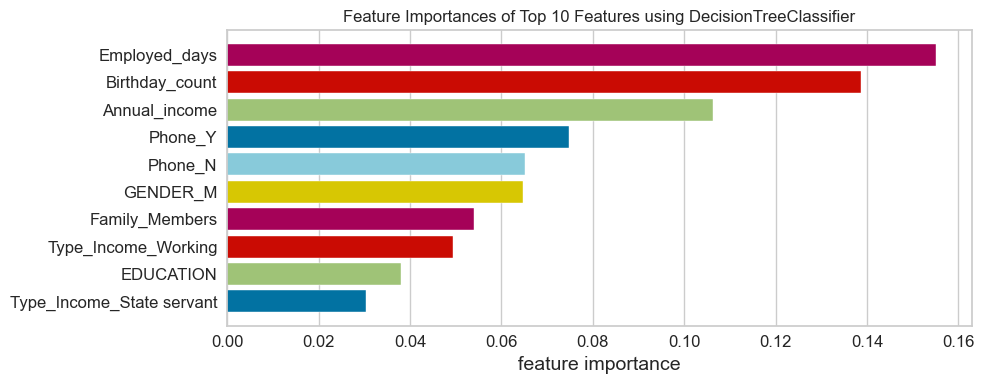

C:\Users\Hello\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


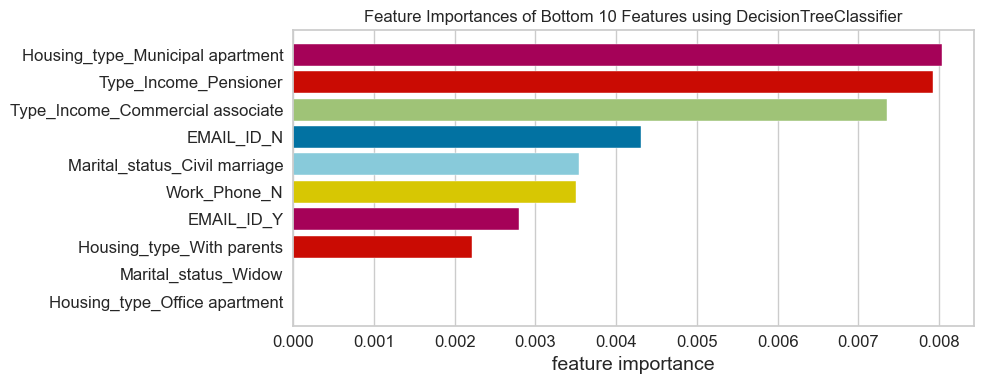

In [154]:
feat_importance_plot(DecisionTreeClassifier(random_state=42),'decision_tree')

In [155]:
def y_prediction_func(model_trn,model_name):
    model_trn.fit(X_cc_train_prep, y_cc_train_prep)
    y_pred =model_trn.predict(X_cc_train_prep)
    return y_pred

In [156]:
y_pred=y_prediction_func(DecisionTreeClassifier(random_state=42), "decision_tree")
len(y_pred)

1790

In [157]:
# Function to plot the confusion matrix
def confusion_matrix_func(model_trn,model_name,final_model=False):
    if final_model == False:
        fig, ax = plt.subplots(figsize=(8,8))
        #plot confusion matrix
        conf_matrix = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep,y_prediction_func(model_trn,model_name),ax=ax, cmap='Blues',values_format='d')
        # remove the grid
        plt.grid(visible=None)
        # increase the font size of the x and y labels
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        #give a title to the plot using the model name
        plt.title('Confusion Matrix', fontsize=14)
        #show the plot
        plt.show()
        print('\n')
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        #plot confusion matrix
        conf_matrix_final = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep,y_prediction_func(model_trn,model_name,final_model=True),ax=ax, cmap='Blues',values_format='d')
        # remove the grid
        plt.grid(visible=None)
        # increase the font size of the x and y labels
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        #give a title to the plot using the model name
        plt.title('Confusion Matrix', fontsize=14)
        #show the plot
        plt.show()
        print('\n')

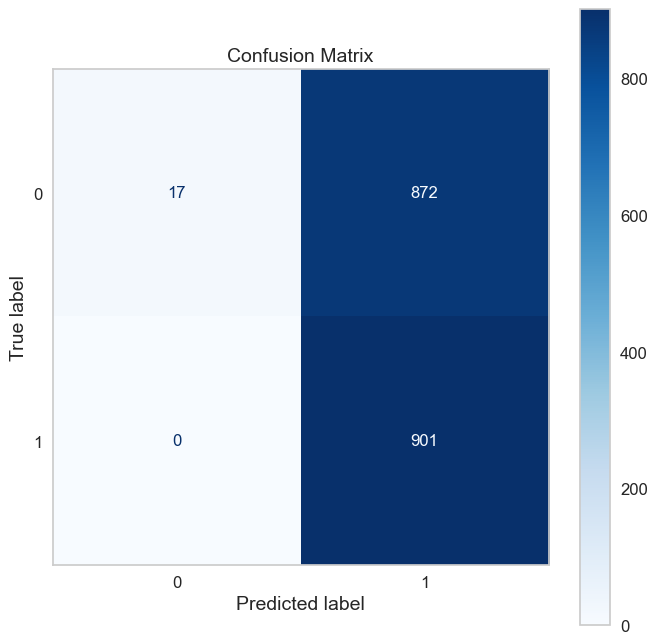

In [158]:
confusion_matrix_func(SGDClassifier(random_state=42,loss='perceptron'), 'sgd')

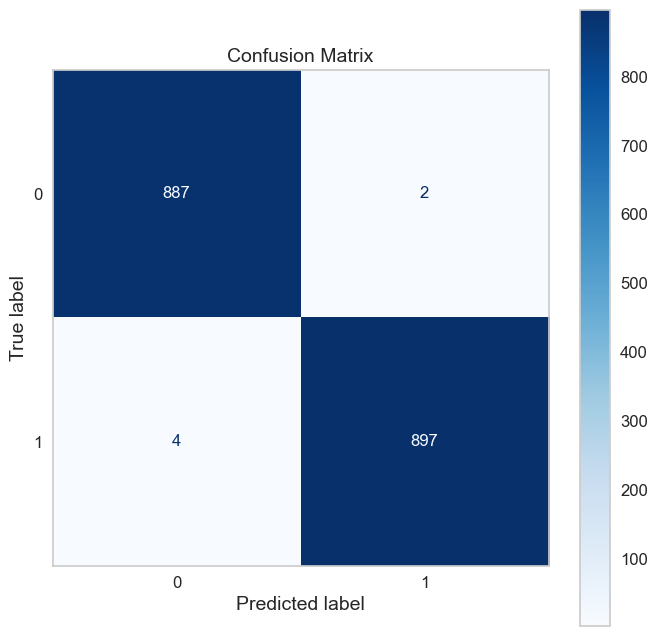

In [159]:
confusion_matrix_func(DecisionTreeClassifier(random_state=42), "decision_tree", final_model=False)

In [160]:
# Function to plot the roc curve
def roc_curve_func(model_trn,model_name):
        model_trn.fit(X_cc_train_prep, y_cc_train_prep)
        y_cc_train_proba =model_trn.predict_proba(X_cc_train_prep)
        skplt.metrics.plot_roc(y_cc_train_prep, y_cc_train_proba, title = 'ROC curve for {0}'.format(model_name), cmap='cool',figsize=(8,6), text_fontsize='large')
        #remove the grid
        plt.grid(visible=None)
        plt.show()
        print('\n')

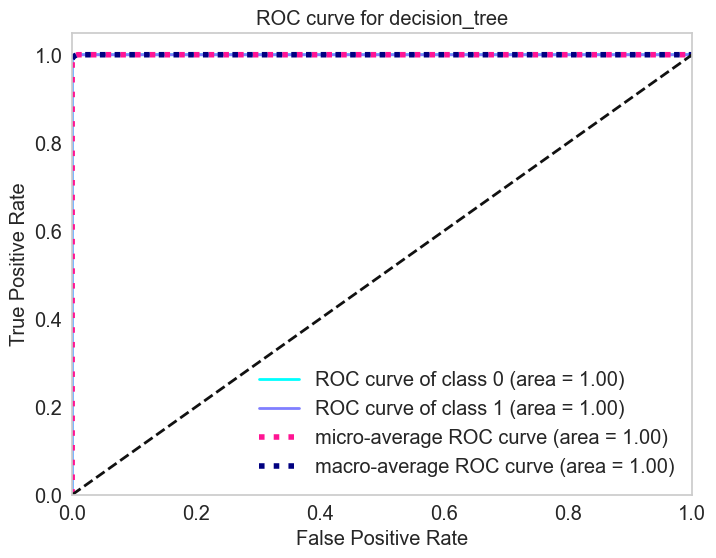

In [161]:
roc_curve_func(DecisionTreeClassifier(random_state=42), "decision_tree")

In [162]:
# Function to display the classification report
def score_func(model_trn, model_name, final_model=False):
    if final_model == False:
        class_report = classification_report(y_cc_train_prep,y_prediction_func(model_trn,model_name))
        print(class_report)
    else:
        class_report_final = classification_report(y_cc_train_prep,y_prediction_func(model_trn,model_name,final_model=True))
        print(class_report_final)

In [163]:
score_func(DecisionTreeClassifier(random_state=42),'decision_tree', final_model=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00       901

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



In [164]:
# Function to train the model
def train_model(model,model_name,final_model=False):
    # if we are not training the final model
    if final_model == False:
        # check if the model file exist and if not create, train and save it
        model_file_path = Path('saved_models/{0}/{0}_model.sav'.format(model_name))
        try:
            model_file_path.resolve(strict=True)
        except FileNotFoundError:
            if model_name == 'sgd':
                # for sgd, loss = 'hinge' does not have a predict_proba method. Therefore, we use a calibrated model
                calibrated_model = CalibratedClassifierCV(model, cv=10, method='sigmoid')
                model_trn = calibrated_model.fit(X_cc_train_prep,y_cc_train_prep)
            else:
                model_trn = model.fit(X_cc_train_prep,y_cc_train_prep)
            joblib.dump(model_trn,model_file_path)
            # plot the most and least predictive features
            return model_trn
        else:
            # if path exist load the model
            model_trn = joblib.load(model_file_path)
            # plot the most and least predictive features
            return model_trn
    else:
        # check if the final model file exist and if not create, train and save it
        final_model_file_path = Path('saved_models_final/{0}/{0}_model.sav'.format(model_name))
        try:
            final_model_file_path.resolve(strict=True)
        except FileNotFoundError:
            model_trn = model.fit(X_cc_train_prep,y_cc_train_prep)
            joblib.dump(model_trn,final_model_file_path)
            # plot the most and least predictive features
            return model_trn
        else:
            # if path exist load the model
            model_trn = joblib.load(final_model_file_path)
            # plot the most and least predictive features
            return model_trn

In [165]:
train_model(DecisionTreeClassifier(random_state=42),'decision_tree', final_model=False)

DecisionTreeClassifier(random_state=42)

In [166]:
def folder_check_model():
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_models/{}'.format(model_name)):
        os.makedirs('saved_models/{}'.format(model_name))





----------------------  sgd  ----------------------


              precision    recall  f1-score   support

           0       0.66      0.62      0.64       889
           1       0.65      0.68      0.66       901

    accuracy                           0.65      1790
   macro avg       0.65      0.65      0.65      1790
weighted avg       0.65      0.65      0.65      1790



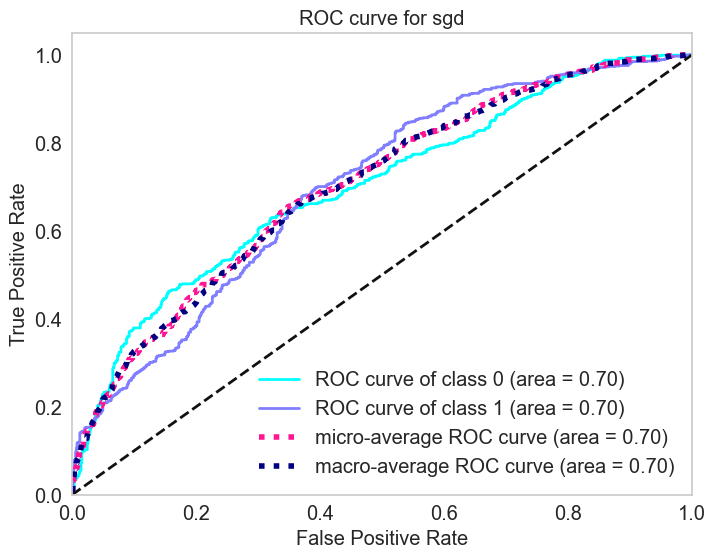

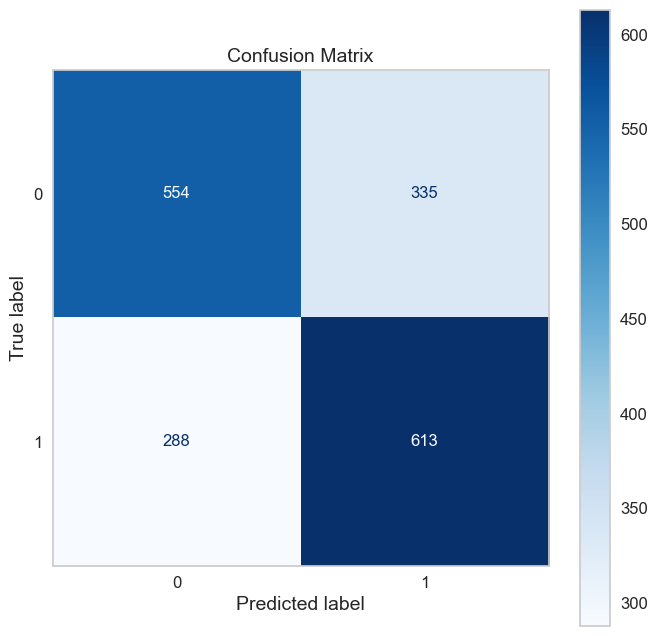



No feature importance for sgd






----------------------  logistic_regression  ----------------------


              precision    recall  f1-score   support

           0       0.68      0.64      0.66       889
           1       0.66      0.70      0.68       901

    accuracy                           0.67      1790
   macro avg       0.67      0.67      0.67      1790
weighted avg       0.67      0.67      0.67      1790



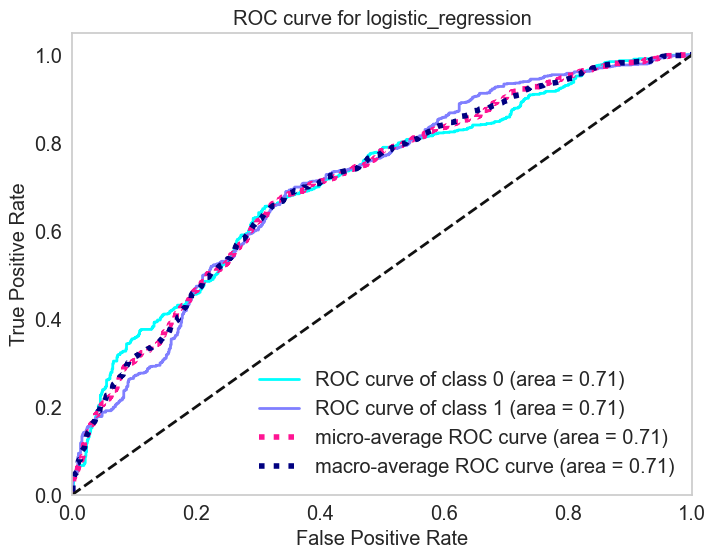

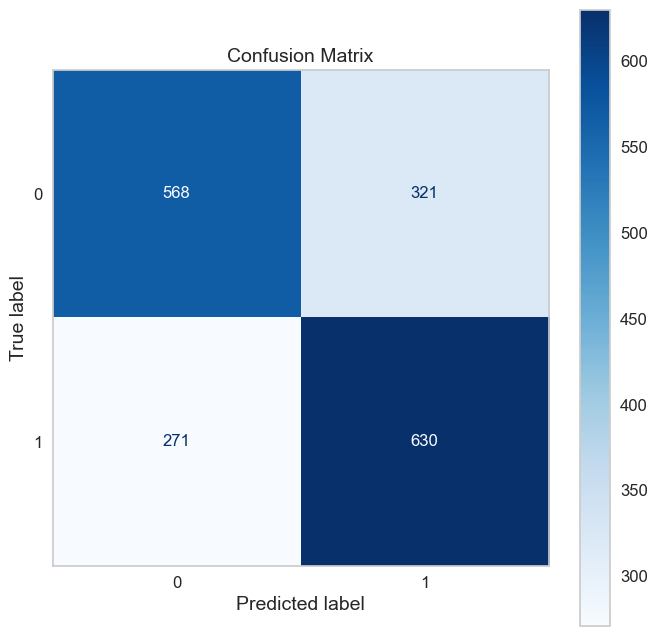

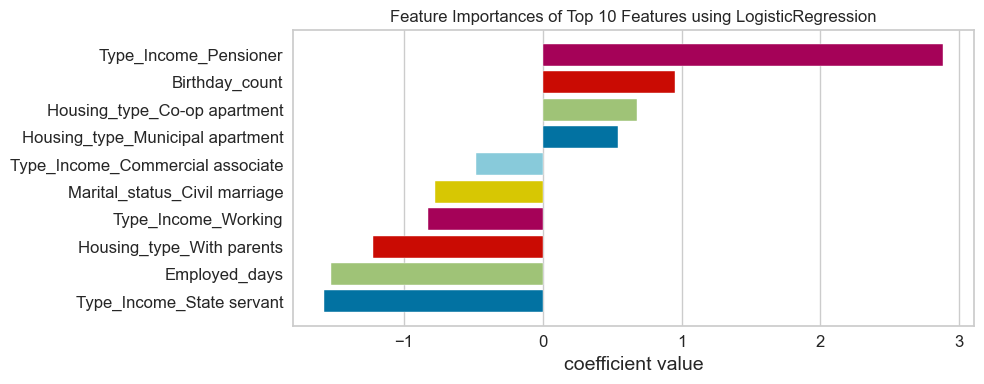

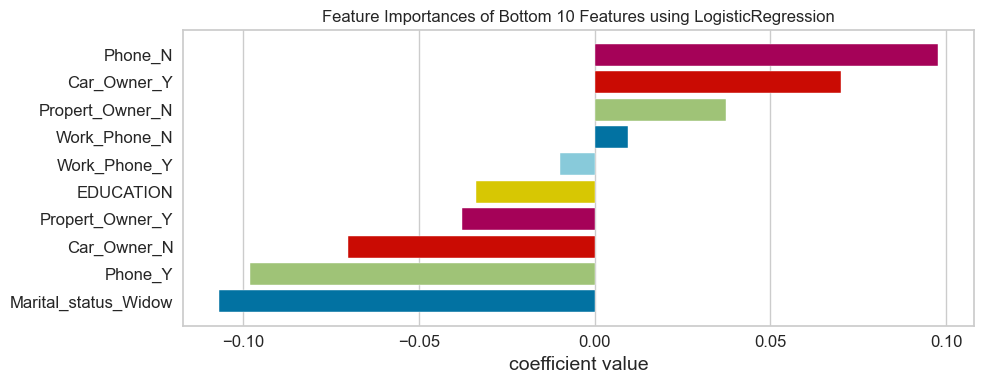







----------------------  support_vector_machine  ----------------------


              precision    recall  f1-score   support

           0       0.86      0.74      0.79       889
           1       0.77      0.88      0.82       901

    accuracy                           0.81      1790
   macro avg       0.82      0.81      0.81      1790
weighted avg       0.82      0.81      0.81      1790



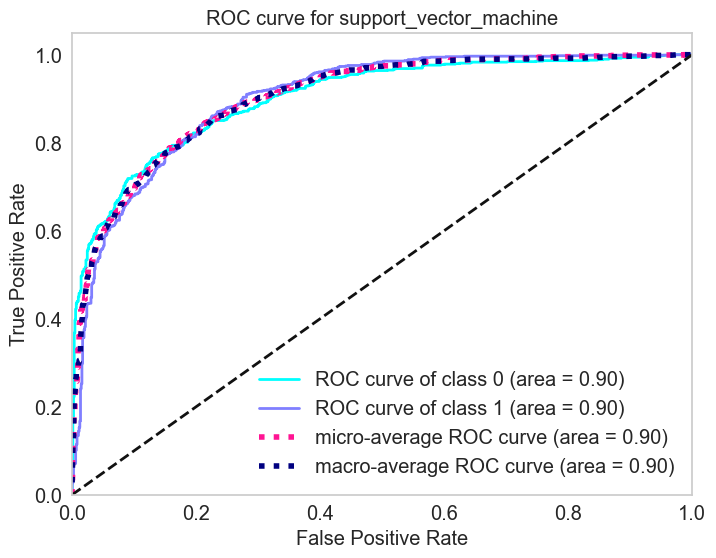

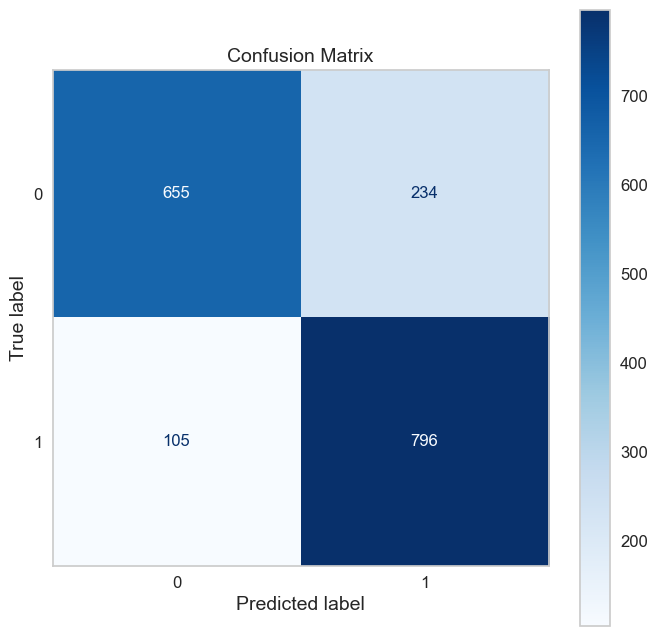



No feature importance for support_vector_machine






----------------------  decision_tree  ----------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00       901

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



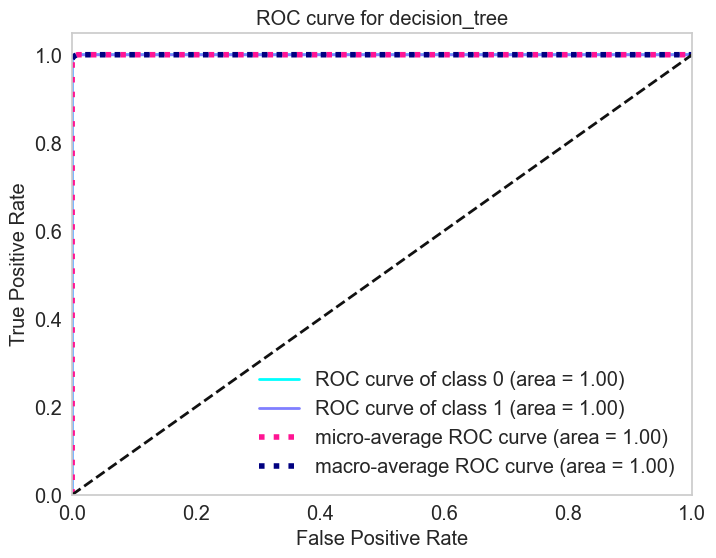

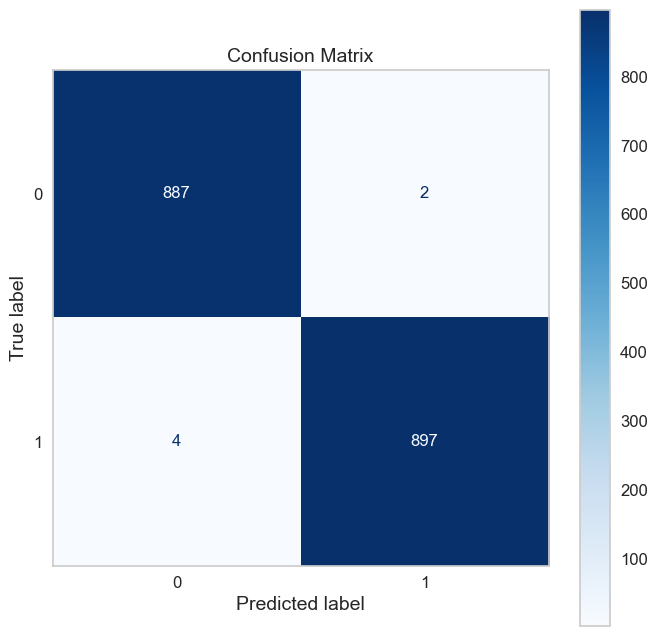

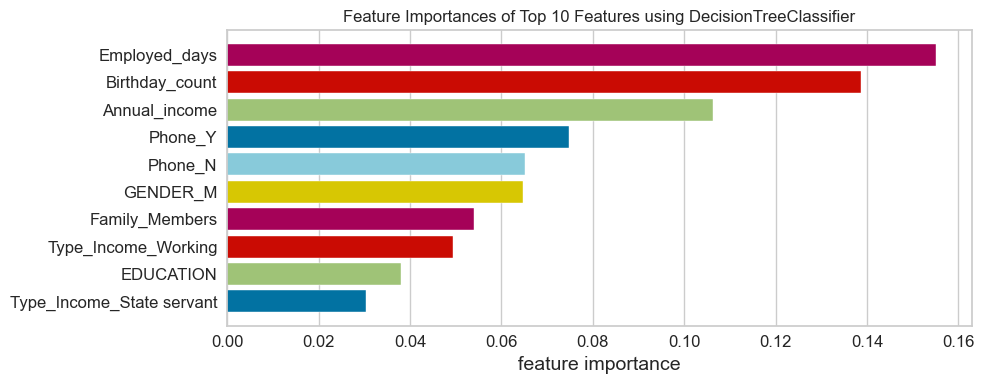

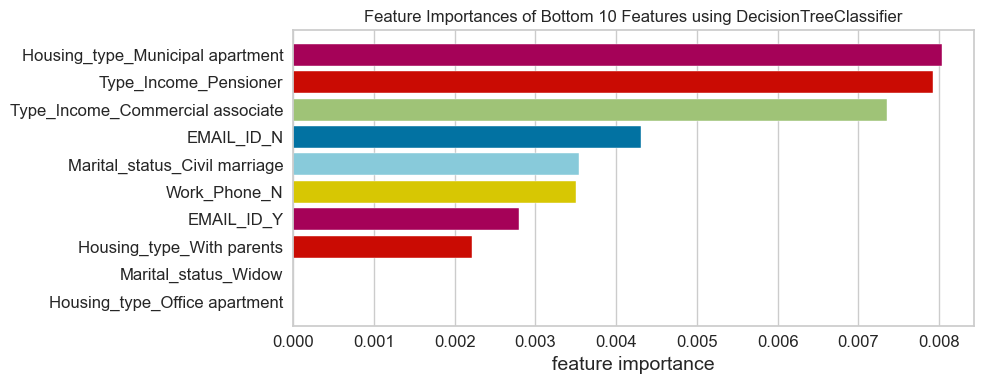







----------------------  random_forest  ----------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00       901

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



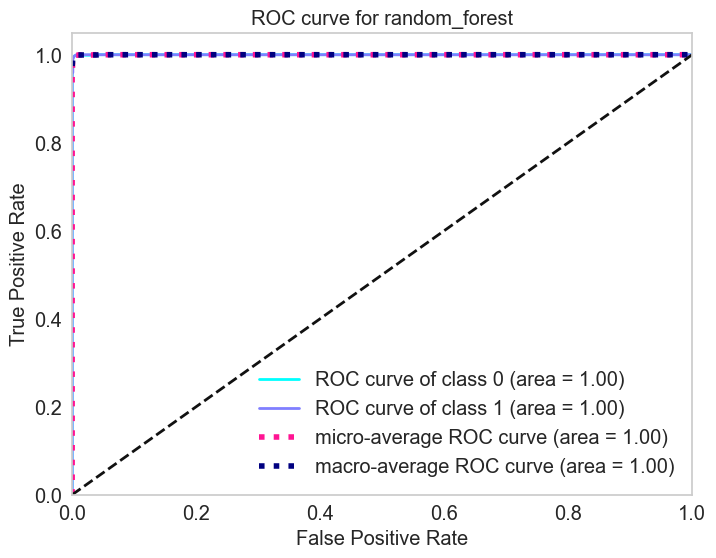

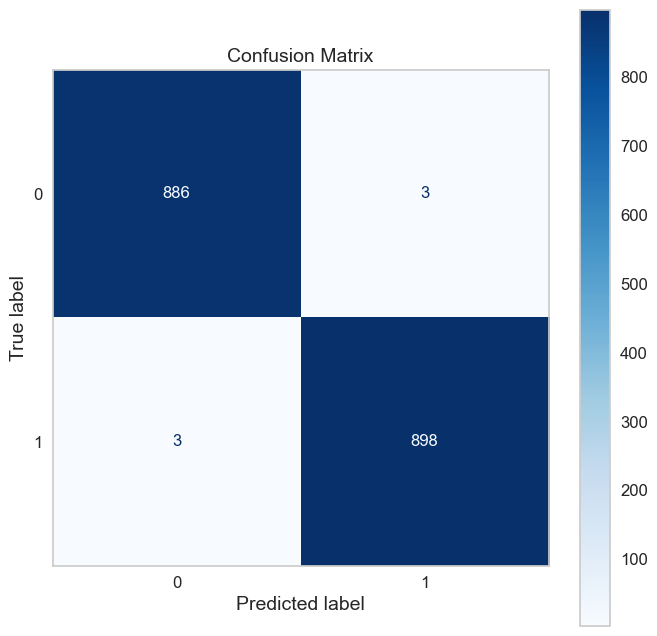

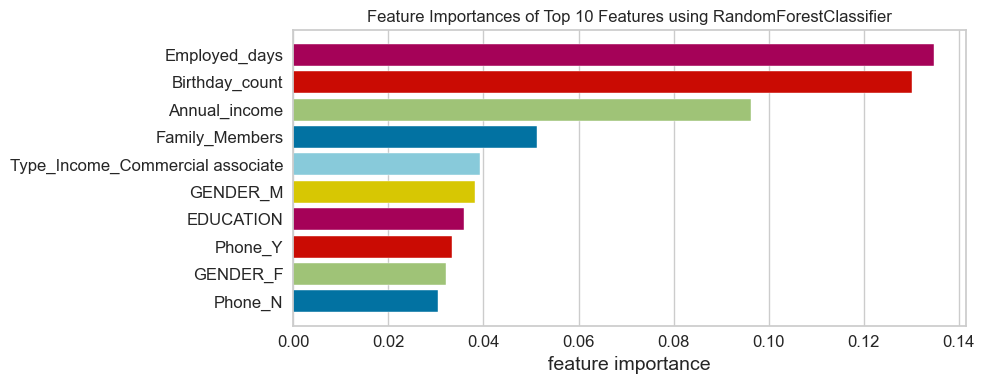

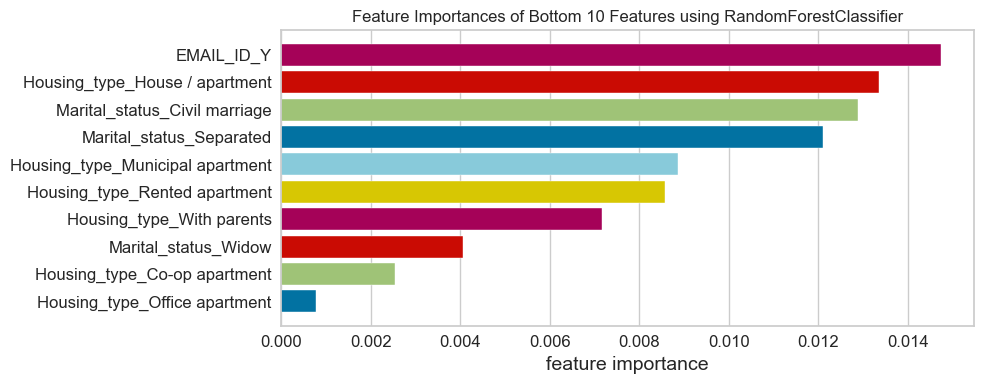







----------------------  gaussian_naive_bayes  ----------------------


              precision    recall  f1-score   support

           0       0.58      0.85      0.69       889
           1       0.73      0.39      0.51       901

    accuracy                           0.62      1790
   macro avg       0.65      0.62      0.60      1790
weighted avg       0.65      0.62      0.60      1790



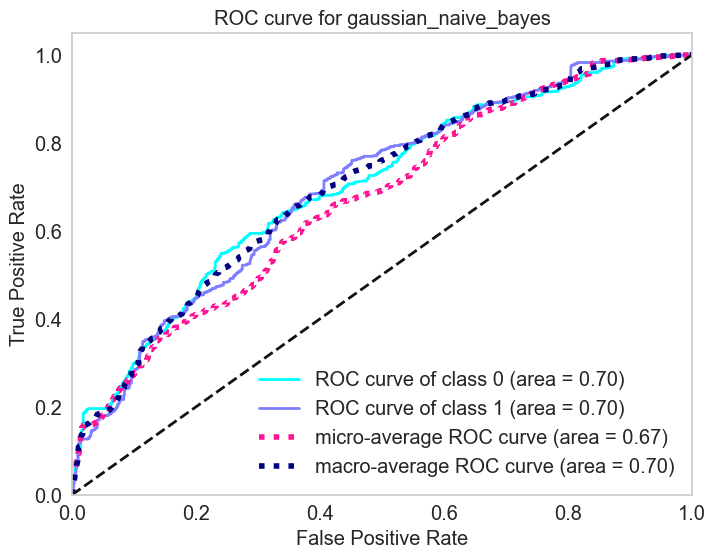

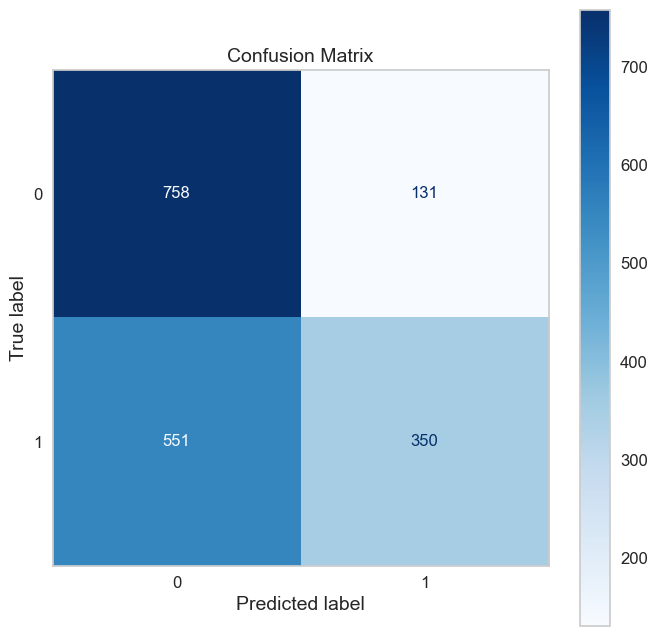



No feature importance for gaussian_naive_bayes






----------------------  k_nearest_neighbors  ----------------------


              precision    recall  f1-score   support

           0       0.98      0.84      0.91       889
           1       0.86      0.98      0.92       901

    accuracy                           0.91      1790
   macro avg       0.92      0.91      0.91      1790
weighted avg       0.92      0.91      0.91      1790



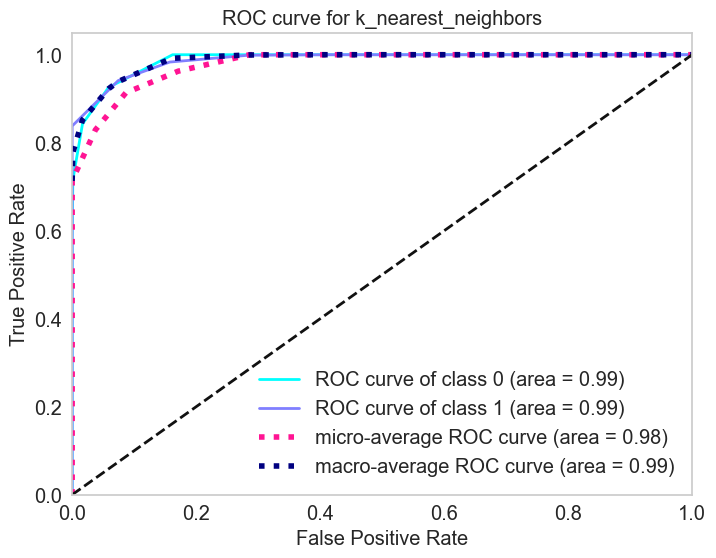

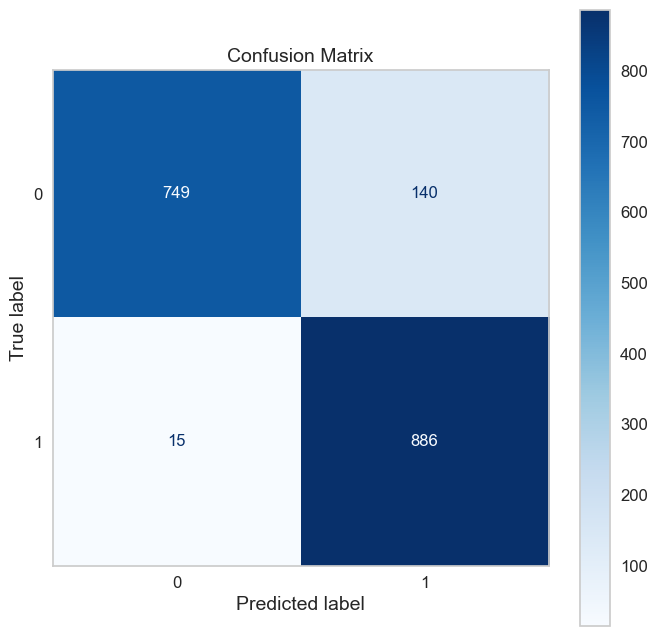



No feature importance for k_nearest_neighbors






----------------------  gradient_boosting  ----------------------


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       889
           1       0.95      0.94      0.94       901

    accuracy                           0.94      1790
   macro avg       0.94      0.94      0.94      1790
weighted avg       0.94      0.94      0.94      1790



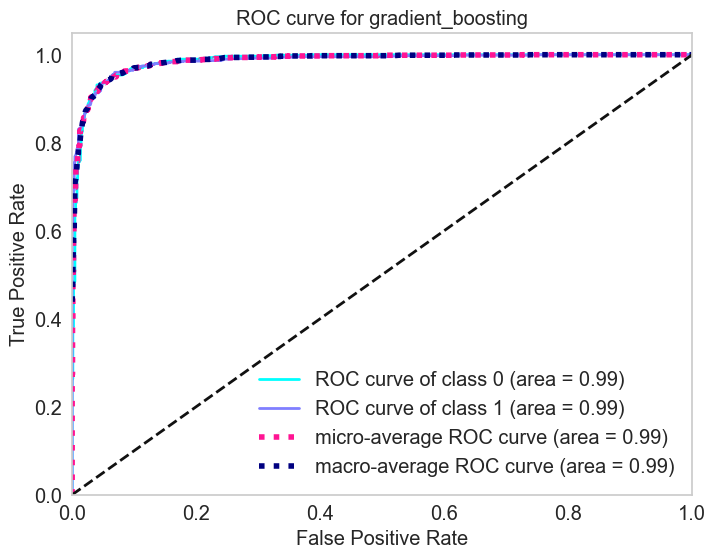

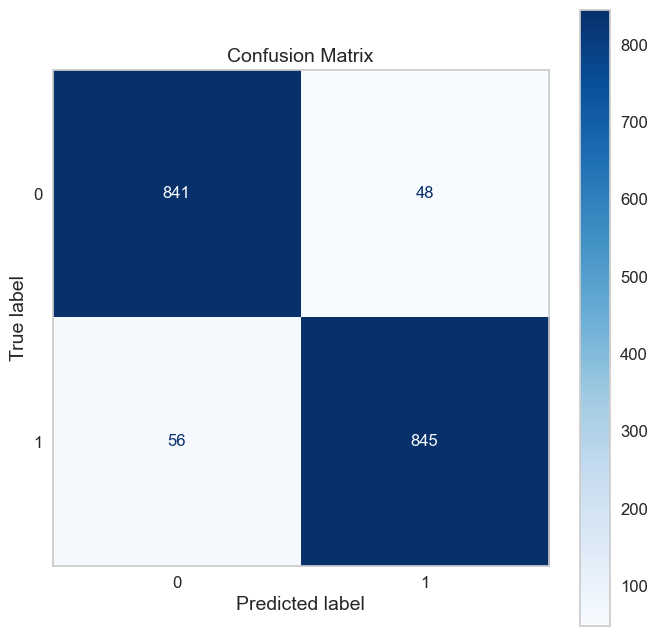

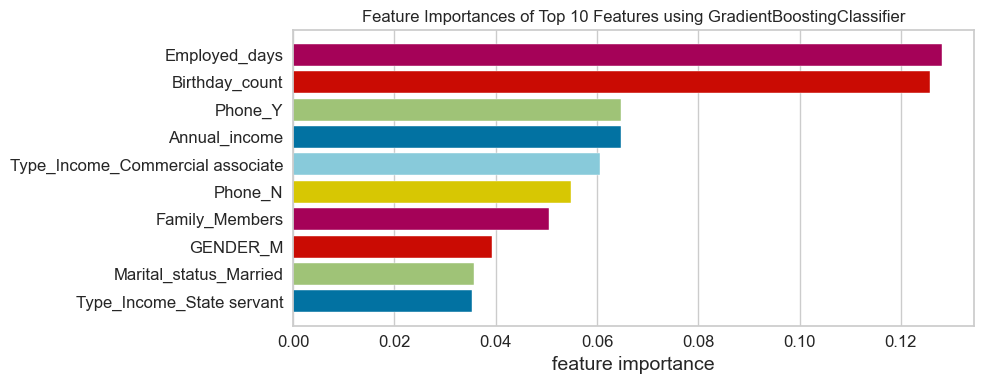

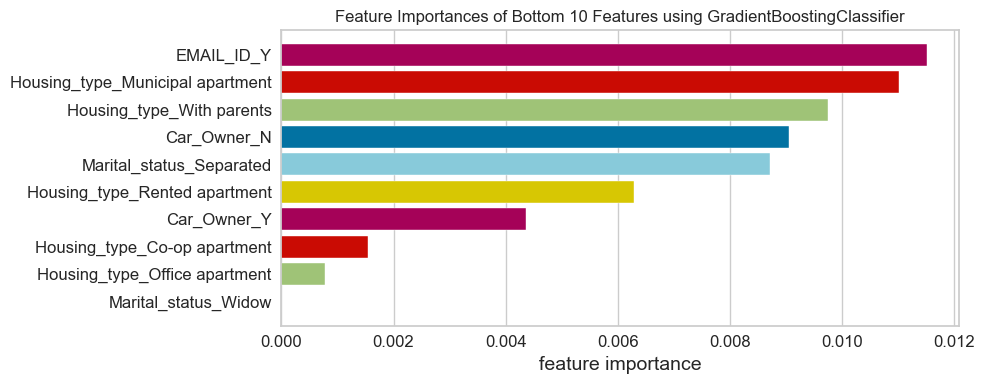







----------------------  linear_discriminant_analysis  ----------------------


              precision    recall  f1-score   support

           0       0.68      0.63      0.65       889
           1       0.66      0.70      0.68       901

    accuracy                           0.67      1790
   macro avg       0.67      0.67      0.67      1790
weighted avg       0.67      0.67      0.67      1790



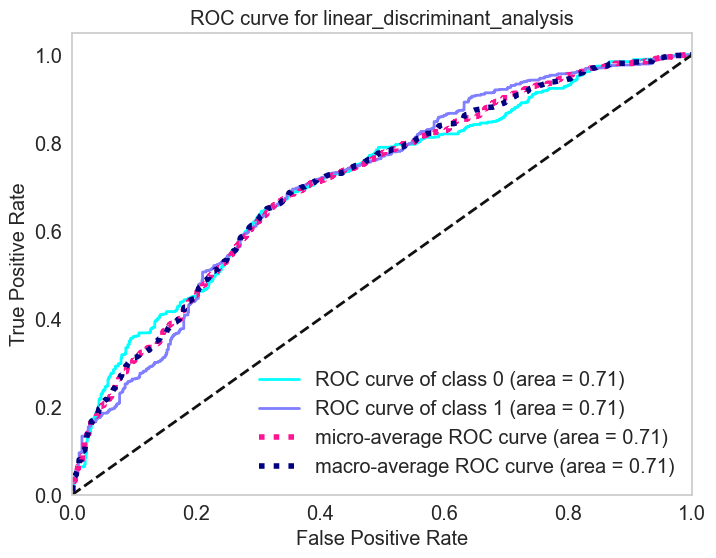

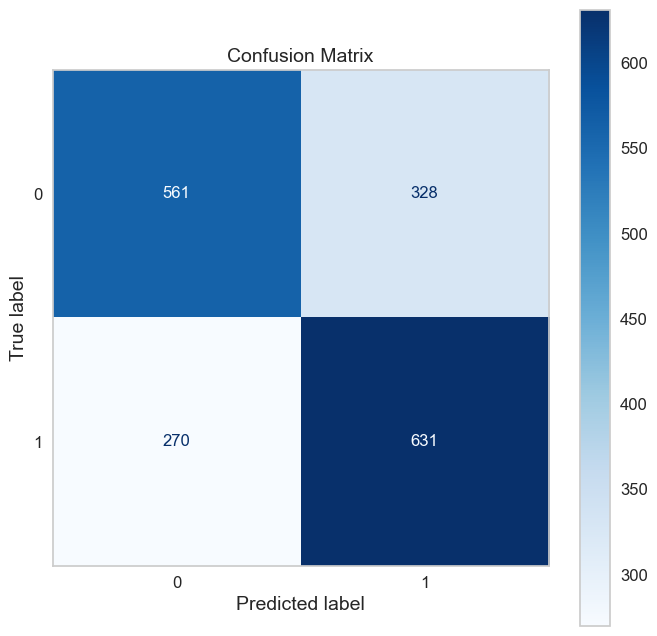

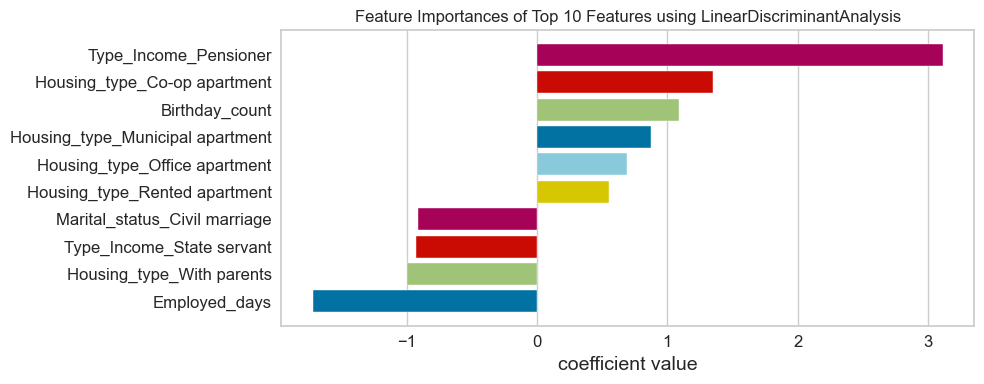

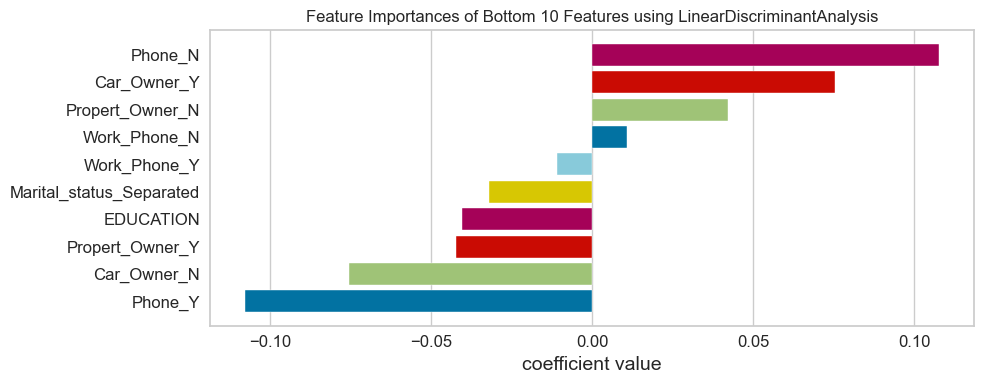







----------------------  bagging  ----------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00       901

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



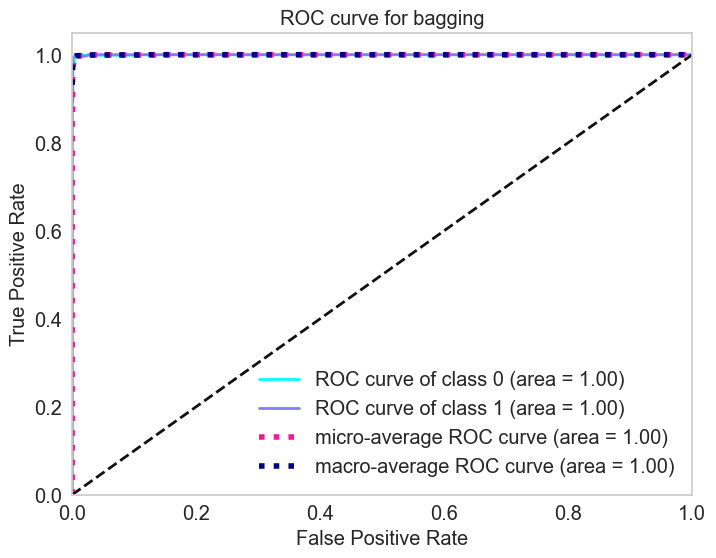

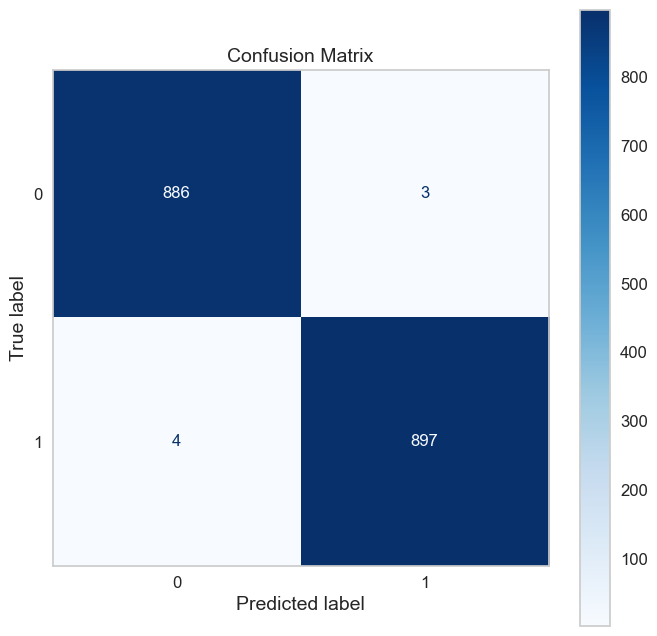



No feature importance for bagging






----------------------  neural_network  ----------------------


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       889
           1       0.97      0.99      0.98       901

    accuracy                           0.98      1790
   macro avg       0.98      0.98      0.98      1790
weighted avg       0.98      0.98      0.98      1790



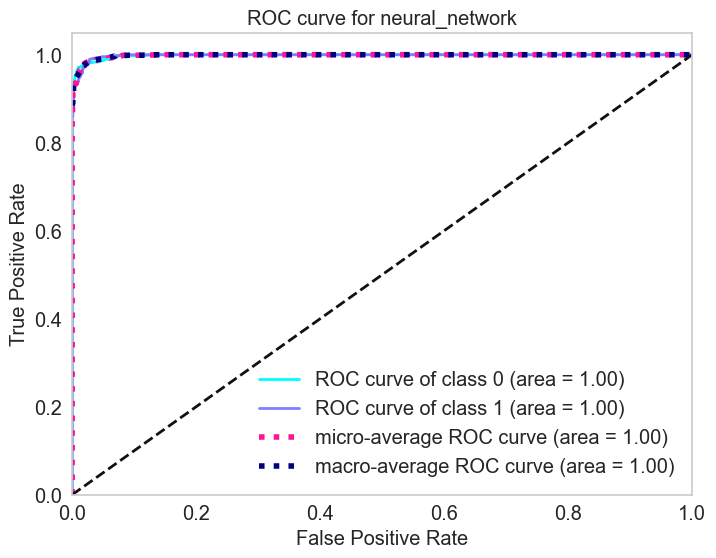

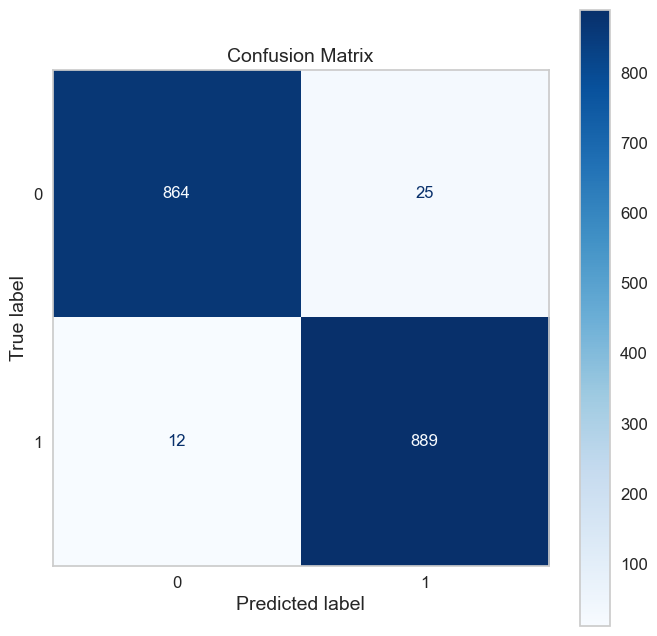



No feature importance for neural_network






----------------------  adaboost  ----------------------


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       889
           1       0.83      0.83      0.83       901

    accuracy                           0.83      1790
   macro avg       0.83      0.83      0.83      1790
weighted avg       0.83      0.83      0.83      1790



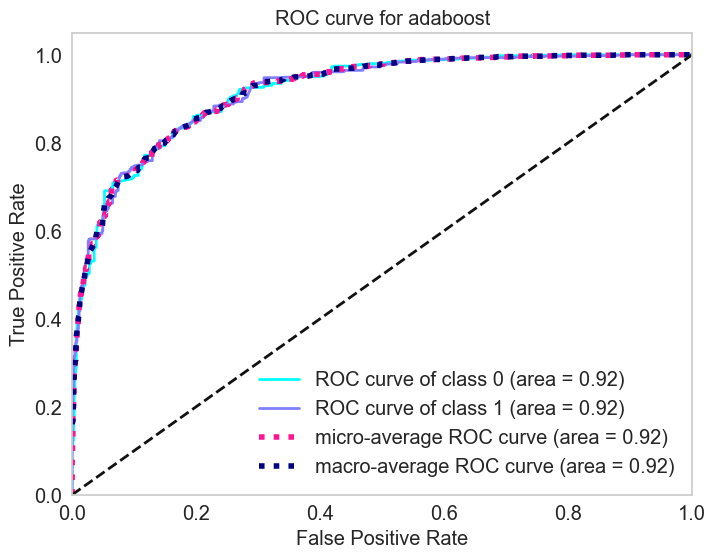

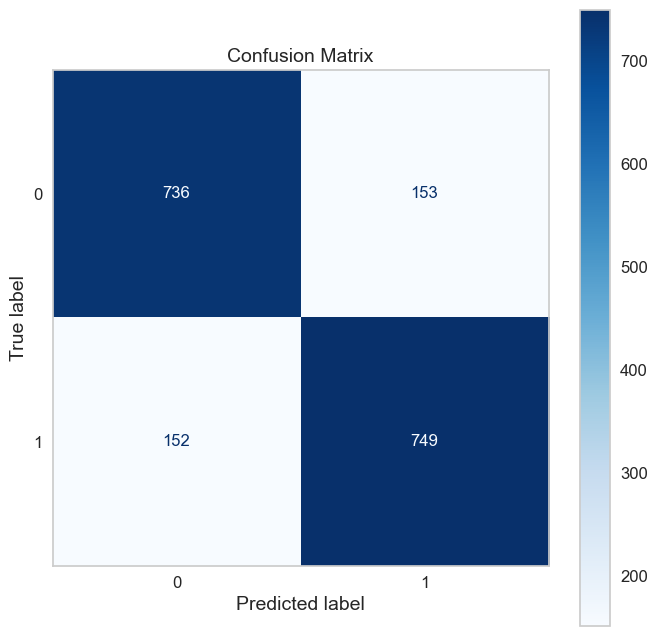

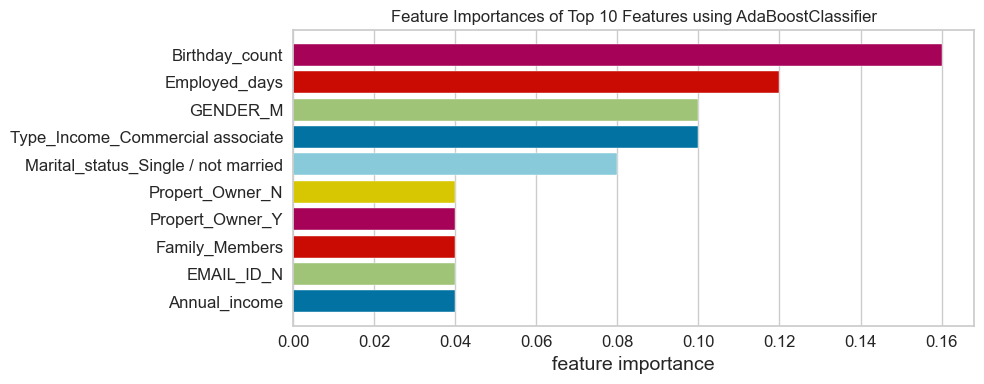

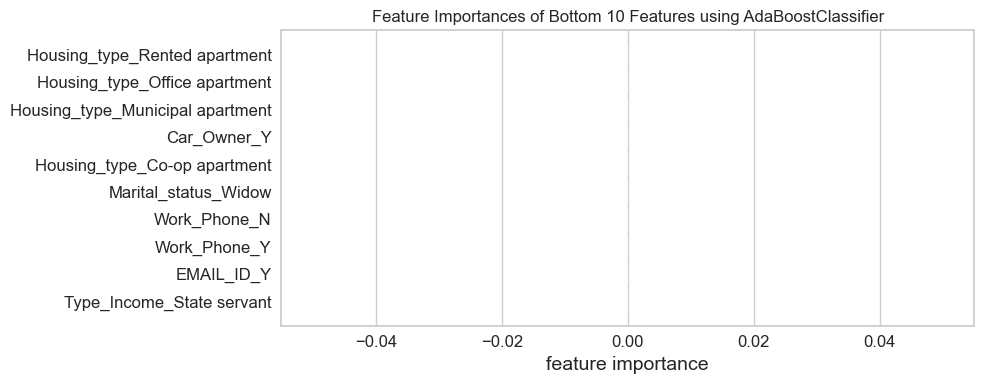







----------------------  extra_trees  ----------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00       901

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



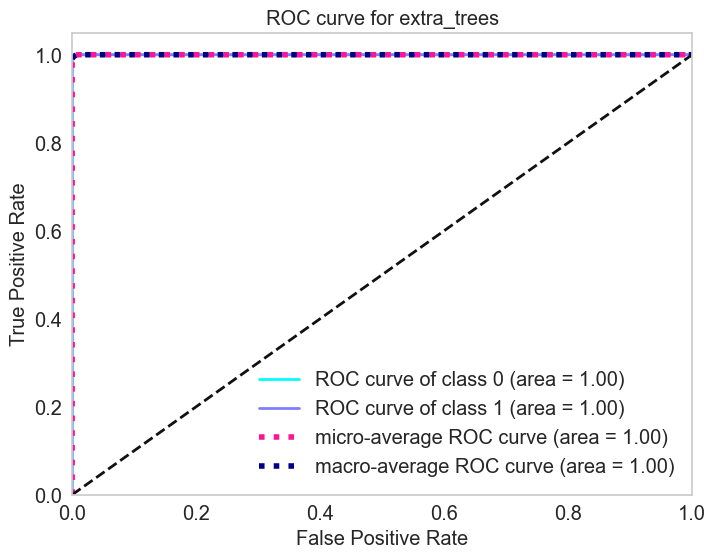

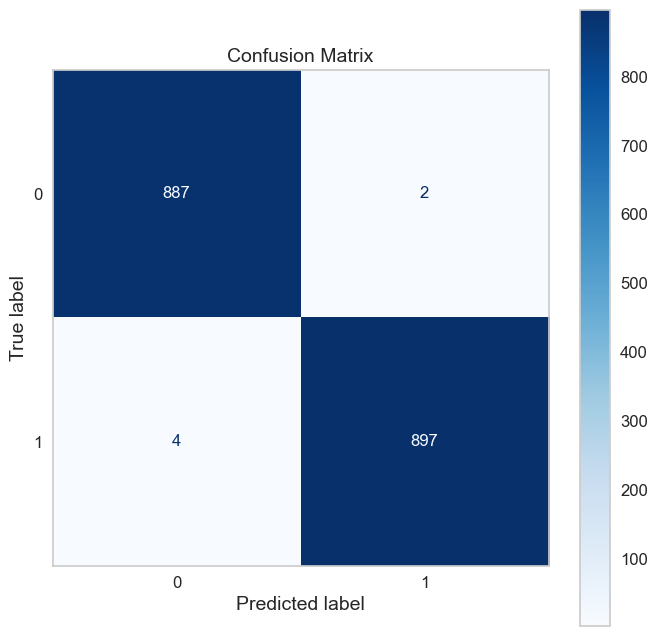

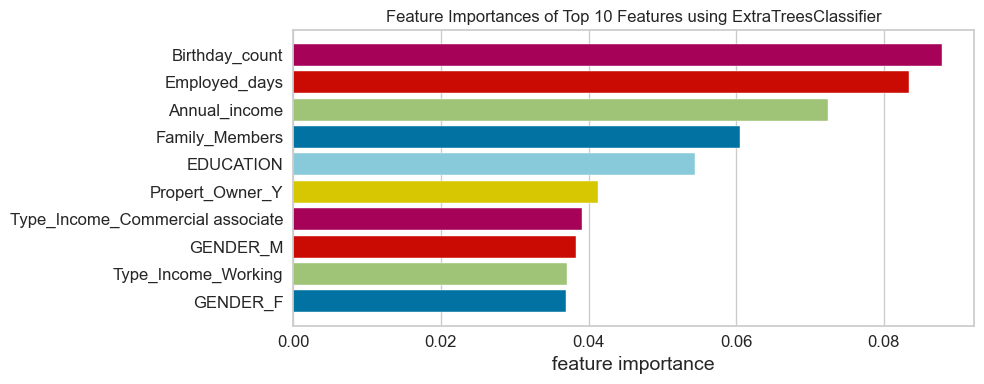

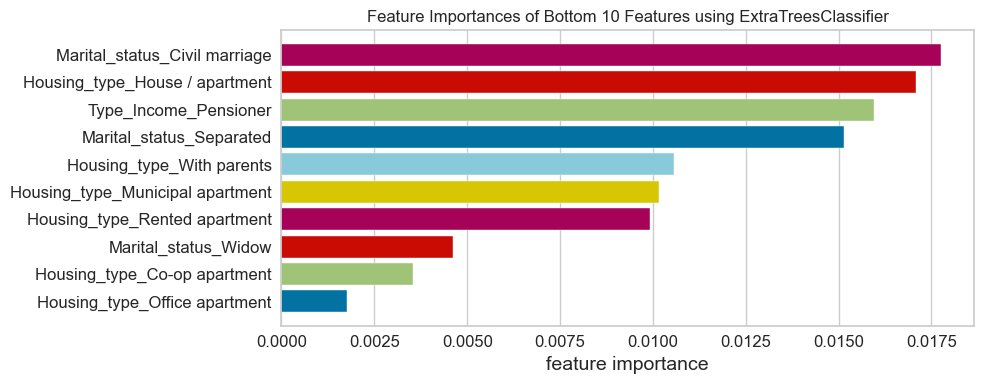

In [167]:
# loop over all the models
for model_name,model in classifiers.items():
    # title formatting
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    # check if the folder for saving the model exists, if not create it
    folder_check_model()
    # train the model
    model_trn = train_model(model,model_name)
    # print the scores from the classification report
    score_func(model_trn, model_name)
    # plot the ROC curve
    roc_curve_func(model_trn,model_name)
    # plot the confusion matrix
    confusion_matrix_func(model_trn,model_name)
    # plot feature importance
    feat_importance_plot(model_trn, model_name)
    warnings.filterwarnings("ignore")

In [168]:
cc_test_copy

GENDER_F  GENDER_M  Marital_status_Civil marriage  \
0        0.15      0.85                           0.00   
1        0.00      1.00                           0.00   
2        1.00      0.00                           0.00   
3        0.00      1.00                           1.00   
4        0.00      1.00                           0.00   
..        ...       ...                            ...   
443      0.09      0.91                           0.00   
444      1.00      0.00                           0.00   
445      1.00      0.00                           0.00   
446      0.00      1.00                           0.00   
447      1.00      0.00                           0.00   

     Marital_status_Married  Marital_status_Separated  \
0                      1.00                      0.00   
1                      1.00                      0.00   
2                      1.00                      0.00   
3                      0.00                      0.00   
4                      1.00                      0.00   
..                      ...                       ...   
443                    1.00                      0.00   
444                    1.00                      0.00   
445                    1.00                      0.00   
446                    1.00                      0.00   
447                    1.00                      0.00   

     Marital_status_Single / not married  Marital_status_Widow  \
0                                   0.00                  0.00   
1                                   0.00                  0.00   
2                                   0.00                  0.00   
3                                   0.00                  0.00   
4                                   0.00                  0.00   
..                                   ...                   ...   
443                                 0.00                  0.00   
444                                 0.00                  0.00   
445                                 0.00                  0.00   
446                                 0.00                  0.00   
447                                 0.00                  0.00   

     Housing_type_Co-op apartment  Housing_type_House / apartment  \
0                            0.00                            1.00   
1                            0.00                            1.00   
2                            0.00                            1.00   
3                            0.00                            1.00   
4                            0.00                            1.00   
..                            ...                             ...   
443                          0.00                            1.00   
444                          0.00                            1.00   
445                          0.00                            1.00   
446                          0.00                            1.00   
447                          0.00                            1.00   

     Housing_type_Municipal apartment  Housing_type_Office apartment  \
0                                0.00                           0.00   
1                                0.00                           0.00   
2                                0.00                           0.00   
3                                0.00                           0.00   
4                                0.00                           0.00   
..                                ...                            ...   
443                              0.00                           0.00   
444                              0.00                           0.00   
445                              0.00                           0.00   
446                              0.00                           0.00   
447                              0.00                           0.00   

     Housing_type_Rented apartment  Housing_type_With parents  \
0                             0.00                       0.00   
1     

In [169]:
pd.options.mode.chained_assignment = None  # Hide the copy warning
cc_test_prep = full_pipeline(cc_test_copy)

One or more features are not in the dataframe
One or more features are not in the dataframe
One or more features are not in the dataframe


In [170]:
cc_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GENDER_F                             448 non-null    float64
 1   GENDER_M                             448 non-null    float64
 2   Marital_status_Civil marriage        448 non-null    float64
 3   Marital_status_Married               448 non-null    float64
 4   Marital_status_Separated             448 non-null    float64
 5   Marital_status_Single / not married  448 non-null    float64
 6   Marital_status_Widow                 448 non-null    float64
 7   Housing_type_Co-op apartment         448 non-null    float64
 8   Housing_type_House / apartment       448 non-null    float64
 9   Housing_type_Municipal apartment     448 non-null    float64
 10  Housing_type_Office apartment        448 non-null    float64
 11  Housing_type_Rented apartment   

In [171]:
cc_test_copy.shape

(448, 33)

In [172]:
X_cc_test_prep, y_cc_test_prep = cc_test_prep.loc[:, cc_test_prep.columns != 'label'], cc_test_prep['label'].astype('int64')

In [173]:
classifiers = {
    'sgd':SGDClassifier(random_state=42,loss='perceptron'),
    'logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    'support_vector_machine':SVC(random_state=42,probability=True),
    'decision_tree':DecisionTreeClassifier(random_state=42),
    'random_forest':RandomForestClassifier(random_state=42),
    'gaussian_naive_bayes':GaussianNB(),
    'k_nearest_neighbors':KNeighborsClassifier(),
    'gradient_boosting':GradientBoostingClassifier(random_state=42),
    'linear_discriminant_analysis':LinearDiscriminantAnalysis(),
    'bagging':BaggingClassifier(random_state=42),
    'neural_network':MLPClassifier(random_state=42,max_iter=1000),
    'adaboost':AdaBoostClassifier(random_state=42),
    'extra_trees':ExtraTreesClassifier(random_state=42),
    }

In [174]:
# train the model
model_trn = train_model(classifiers['gradient_boosting'],'gradient_boosting')

In [175]:
final_predictions = model_trn.predict(X_cc_test_prep)

In [176]:
final_predictions.shape

(248,)

In [177]:
n_correct = sum(final_predictions == y_cc_test_prep)

In [178]:
print(n_correct/len(final_predictions))

0.6209677419354839
